# Data cleaning and preparation

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#Importing data
df = pd.read_csv("Combined_Emot_Data.csv")

#Create a column that adds the total values for all basic emotions
df['total'] = df['anger'] + df['anticipation'] + df['disgust'] + df['fear'] + df['joy'] + df['sadness'] + df['surprise'] + df['trust']

#Create a list of basic emotions
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

In [3]:
df.head()

unicode emoji  anger  anticipation  disgust  fear   joy  sadness  surprise  \
0   1F308     🌈   0.00          0.28     0.00  0.00  0.69     0.06      0.22   
1   1F319     🌙   0.00          0.31     0.00  0.00  0.25     0.00      0.06   
2   1F31A     🌚   0.06          0.08     0.17  0.06  0.42     0.19      0.06   
3   1F31E     🌞   0.00          0.22     0.00  0.00  0.78     0.00      0.11   
4   1F31F     🌟   0.00          0.28     0.00  0.00  0.53     0.00      0.25   

   trust  ...      le_+      le_-      le_0  sent_score  sent_score_class  \
0   0.33  ...  0.582418  0.065934  0.351648    0.516484          Positive   
1   0.25  ...  0.655738  0.065574  0.278689    0.590164          Positive   
2   0.11  ...  0.622517  0.158940  0.218543    0.463576          Positive   
3   0.22  ...  0.581818  0.024242  0.393939    0.557576          Positive   
4   0.31  ...  0.386139  0.059406  0.554455    0.326733          Positive   

   upper_error_class lower_error_class sent_polar primary_basic_emot total  
0           Positive          Positive   Positive                joy  1.58  
1           Positive          Positive   Positive       anticipation  0.87  
2           Positive          Positive   Positive                joy  1.15  
3           Positive          Positive   Positive                joy  1.33  
4           Positive          Positive   Positive                joy  1.37  

[5 rows x 22 columns]

In [4]:
#Creation of datasets using selected best smoothing method- Laplace Estimator
for emotion in emotions:
    df[emotion] = (df[emotion] + 1) / (df["total"] + 8)

In [5]:
#Check for null values
df.isnull().sum()

unicode               0
emoji                 0
anger                 0
anticipation          0
disgust               0
fear                  0
joy                   0
sadness               0
surprise              0
trust                 0
Position              0
Unicode block         0
le_+                  0
le_-                  0
le_0                  0
sent_score            0
sent_score_class      0
upper_error_class     0
lower_error_class     0
sent_polar            0
primary_basic_emot    0
total                 0
dtype: int64

In [6]:
df.shape

(149, 22)

# Feature Extraction-Distributed word vectors based on emotion words

Challenges cited in other work on the topic often relate to the lack of features associated with the emoji itself, making any prediction task challenging. The following section evaluates a range of options for feature extraction which may improve outcomes compared to options where limited features were cited as a challenge.

The following work aims to adapt a method previously proposed by *****. Given any emoji and basic emotion, the method compared the emoji and the basic emotion using their respective vectors. A similarity score based upon the cosine similarity metric will be generated, indicating the strength of association between the pair. The initial selection of cosine similarity score is based upon its frequency in use for similar NLP comparative work, most notably that which this method is adapting. The original work utilized a word embedding for emojis where vectors were generated based upon surrounding vocabulary within text. This approach is largely acceptable for the purposes of this work, with the exception of the word vector to incorporate emojis selected. This vector fails to account for incongruency in emoji sentiment and surrounding text being an indicator of figuratve language, but rather implies all emojis are used in such a manner that their sentiment is consistent with surrounding text. The converse is postulated to be case in this work therefore an alternative word embedding must be selected. Alternative methods for vector comparison will also be explored which may consider other characteristics of the data vectors to determine similarity.

The purpose of generating these values is to expand upon the data that can be gleaned from an emoji in order to make predictions regarding basic emotion affinities for emojis which are unseen in the EmoTag1200 dataset. The most common limitation cited when working with emojis for any form of machine learning is a lack of information contained in it compared to text. This is one such avenue which this work aims to explore to improve upon present state of the art in this regard.

In [7]:
#Importing libraries
from gensim.models import KeyedVectors
import gensim.downloader as api
from nltk import ngrams
from scipy.stats import weightedtau

In [8]:
#Commented out as this took a long time previously

#Download the pre-trained Word2Vec model from Gensim data server (300d to match emoji vector)
#word2vec_model = api.load('word2vec-google-news-300')

#Define list of basic emotions to extract word vectors
#emotion_words = ['joy', 'anger', 'sadness', 'fear', 'surprise', 'disgust', 'anticipation', 'trust']

#Extract the word vectors for the basic emotions
#emotion_word_vectors = {word: word2vec_model[word] for word in emotion_words if word in word2vec_model}

#Save to a new file for later use
#output_file = 'basic_emot_vectors.txt'

#Get the vector size from the first word vector in the dictionary
#vector_size = len(emotion_word_vectors[list(emotion_word_vectors.keys())[0]])

#with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    #file.write(f"{len(emotion_word_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    #for word, vector in emotion_word_vectors.items():
        #vector_str = ' '.join(str(val) for val in vector)
        #file.write(f'{word} {vector_str}\n')

In [9]:
#Look at my emoji embedding
emoji2vec = KeyedVectors.load_word2vec_format('emoji2vec.txt', binary=False)

#Get the vocabulary size (number of emojis)
vocab_size = len(emoji2vec.key_to_index)
print("Vocabulary Size:", vocab_size)

#Get the dimensionality of the word embeddings
embedding_dim = emoji2vec.vector_size
print("Embedding Dimension:", embedding_dim)

Vocabulary Size: 1661
Embedding Dimension: 300


In [10]:
#Look at my basic emotion embedding
basic2vec = KeyedVectors.load_word2vec_format('basic_emot_vectors.txt', binary=False)

#Get the vocabulary size (number of words-basic emotions)
vocab_size = len(basic2vec.key_to_index)
print("Vocabulary Size:", vocab_size)

#Get the dimensionality of the word embeddings
embedding_dim = basic2vec.vector_size
print("Embedding Dimension:", embedding_dim)

Vocabulary Size: 8
Embedding Dimension: 300


In [11]:
#Use cosine similarity to compare

#Copy the dataset to store information for this test
df_basiccomp = df.copy()

#Generate list of basic emotions
emotions = ['anger', 'joy', 'sadness', 'fear', 'surprise', 'disgust', 'anticipation', 'trust']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each emotion and calculate similarity scores for each emoji
for emotion in emotions:
    #Create a new column for the similarity score of each emoji with respect to the current emotion
    df_basiccomp[f'co_sim_{emotion}'] = df_basiccomp['emoji'].apply(lambda x: cosine_similarity(emoji2vec[x], basic2vec[emotion]) if x in emoji2vec else None)

#Display altered dataset
df_basiccomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.104384      0.133612  0.104384  0.104384  0.176409   
1   1F319     🌙  0.112740      0.147689  0.112740  0.112740  0.140924   
2   1F31A     🌚  0.115847      0.118033  0.127869  0.115847  0.155191   
3   1F31E     🌞  0.107181      0.130761  0.107181  0.107181  0.190782   
4   1F31F     🌟  0.106724      0.136606  0.106724  0.106724  0.163287   

    sadness  surprise     trust  ...  primary_basic_emot total  co_sim_anger  \
0  0.110647  0.127349  0.138831  ...                 joy  1.58      0.212815   
1  0.112740  0.119504  0.140924  ...        anticipation  0.87      0.031860   
2  0.130055  0.115847  0.121311  ...                 joy  1.15      0.112067   
3  0.107181  0.118971  0.130761  ...                 joy  1.33      0.115099   
4  0.106724  0.133404  0.139808  ...                 joy  1.37      0.100389   

   co_sim_joy  co_sim_sadness  co_sim_fear co_sim_surprise co_sim_disgust  \
0    0.398045        0.307879     0.170043        0.168778       0.276684   
1    0.097309        0.137938     0.102546        0.056646       0.071432   
2    0.165191        0.168149     0.186228        0.173427       0.126981   
3    0.183506        0.124933     0.159108        0.077226       0.162806   
4    0.269118        0.175544     0.122721        0.223669       0.129766   

  co_sim_anticipation co_sim_trust  
0            0.141978     0.103585  
1            0.176522     0.040214  
2            0.219476     0.101377  
3            0.089916     0.037725  
4            0.143079     0.081530  

[5 rows x 30 columns]

In [12]:
#Create lists to compare basic emotion values here to the similarity scores from word vectors
basic_emotions = ['anger', 'joy', 'sadness', 'fear', 'surprise', 'disgust', 'anticipation', 'trust']
cosine_sim_emotions = ['co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear', 'co_sim_surprise',
                      'co_sim_disgust', 'co_sim_anticipation', 'co_sim_trust']

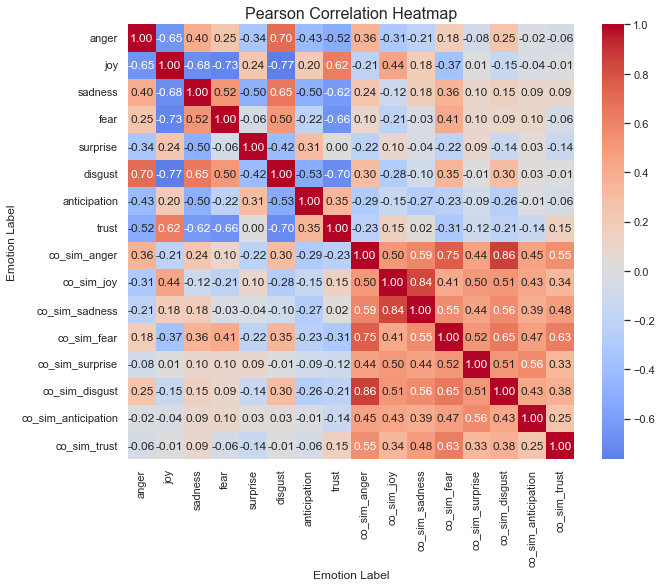

In [13]:
#Define columns to be included in the matric
cosin_eval = basic_emotions + cosine_sim_emotions

#Calculate Pearson correlation coefficients
correlation_matrix = df_basiccomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

# Binary Word Emotion Lexicons based on Emoji corpus similarity

In [14]:
#Load in EmoLex text file
emolex = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['Word', 'Emotion', 'Value'])
emolex.head()

Word       Emotion  Value
0  aback         anger      0
1  aback  anticipation      0
2  aback       disgust      0
3  aback          fear      0
4  aback           joy      0

In [15]:
#Check for null values
emolex.isnull().sum()

Word       10
Emotion     0
Value       0
dtype: int64

In [16]:
#Drop columns with null values for words
emolex.dropna(inplace=True)
emolex.isnull().sum()

Word       0
Emotion    0
Value      0
dtype: int64

In [17]:
#Create lists of words with associations to each basic emotion from the emolex lexicon
emotions = ['anger', 'joy', 'sadness', 'fear', 'surprise', 'disgust', 'anticipation', 'trust']
emotion_words_dict = {}

for emotion in emotions:
    filtered_df = emolex[(emolex['Value'] == 1) & (emolex['Emotion'] == emotion)]
    emotion_words = filtered_df['Word'].tolist()
    emotion_words_dict[emotion] = emotion_words

In [18]:
#Store lists in new variables
anger_words = emotion_words_dict['anger']
joy_words = emotion_words_dict['joy']
sadness_words = emotion_words_dict['sadness']
fear_words = emotion_words_dict['fear']
surprise_words = emotion_words_dict['surprise']
disgust_words = emotion_words_dict['disgust']
anticipation_words = emotion_words_dict['anticipation']
trust_words = emotion_words_dict['trust']

In [19]:
#Check length of the lists
len(sadness_words)

1187

In [20]:
#Make file containing word vectors for words which are associated with anger

#Download the pre-trained Word2Vec model from Gensim data server (300d to match emoji vector)
word2vec_model = api.load('word2vec-google-news-300')

#Extract the word vectors for the angry words
anger_vectors = {word: word2vec_model[word] for word in anger_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'anger_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(anger_vectors[list(anger_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(anger_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in anger_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [21]:
#Same process for joy

#Extract the word vectors
joy_vectors = {word: word2vec_model[word] for word in joy_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'joy_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(joy_vectors[list(joy_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(joy_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in joy_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [22]:
#Same process for sadness

#Extract the word vectors
sadness_vectors = {word: word2vec_model[word] for word in sadness_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'sadness_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(sadness_vectors[list(sadness_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(sadness_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in sadness_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [23]:
#Same process for fear

#Extract the word vectors
fear_vectors = {word: word2vec_model[word] for word in fear_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'fear_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(fear_vectors[list(fear_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(fear_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in fear_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [24]:
#Same process for surprise

#Extract the word vectors
surprise_vectors = {word: word2vec_model[word] for word in surprise_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'surprise_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(surprise_vectors[list(surprise_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(surprise_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in surprise_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [25]:
#Same process for disgust

#Extract the word vectors
disgust_vectors = {word: word2vec_model[word] for word in disgust_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'disgust_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(disgust_vectors[list(disgust_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(disgust_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in disgust_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [26]:
#Same process for anticipation

#Extract the word vectors
anticipation_vectors = {word: word2vec_model[word] for word in anticipation_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'anticipation_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(anticipation_vectors[list(anticipation_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(anticipation_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in anticipation_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [27]:
#Same process for trust

#Extract the word vectors
trust_vectors = {word: word2vec_model[word] for word in trust_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'trust_vectors.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(trust_vectors[list(trust_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(trust_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in trust_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [28]:
#Create new dataframe to contain the information for this test
df_binarycomp = df.copy()

In [29]:
#Load basic emotion vector file
basic2vec = KeyedVectors.load_word2vec_format('basic_emot_vectors.txt', binary=False)

In [30]:
#Use cosine similarity to compare

#Load associated words vector file
anger_vector = KeyedVectors.load_word2vec_format('anger_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector for anger
basic_emotion_vector = basic2vec['anger']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in anger_words:
    if word in anger_vectors:
        word_vector = np.array(anger_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
anger_top_10_similar_words = similarity_scores[:101]

In [31]:
#Repeat for other emotions- joy

#Load associated words vector file
joy_vector = KeyedVectors.load_word2vec_format('joy_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['joy']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in joy_words:
    if word in joy_vectors:
        word_vector = np.array(joy_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
joy_top_10_similar_words = similarity_scores[:101]

In [32]:
#Repeat for other emotions- sadness

#Load associated words vector file
sadness_vector = KeyedVectors.load_word2vec_format('sadness_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['sadness']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in sadness_words:
    if word in sadness_vectors:
        word_vector = np.array(sadness_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
sadness_top_10_similar_words = similarity_scores[:101]

In [33]:
#Repeat for other emotions- fear

#Load associated words vector file
fear_vector = KeyedVectors.load_word2vec_format('fear_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['fear']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in fear_words:
    if word in fear_vectors:
        word_vector = np.array(fear_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
fear_top_10_similar_words = similarity_scores[:101]

In [34]:
#Repeat for other emotions- surprise

#Load associated words vector file
surprise_vector = KeyedVectors.load_word2vec_format('surprise_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['surprise']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in surprise_words:
    if word in surprise_vectors:
        word_vector = np.array(surprise_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
surprise_top_10_similar_words = similarity_scores[:101]

In [35]:
#Repeat for other emotions- disgust

#Load associated words vector file
disgust_vector = KeyedVectors.load_word2vec_format('disgust_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector 
basic_emotion_vector = basic2vec['disgust']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in disgust_words:
    if word in disgust_vectors:
        word_vector = np.array(disgust_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
disgust_top_10_similar_words = similarity_scores[:101]

In [36]:
#Repeat for other emotions- anticipation

#Load associated words vector file
anticipation_vector = KeyedVectors.load_word2vec_format('anticipation_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['anticipation']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in anticipation_words:
    if word in anticipation_vectors:
        word_vector = np.array(anticipation_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
anticipation_top_10_similar_words = similarity_scores[:101]

In [37]:
#Repeat for other emotions- trust

#Load associated words vector file
trust_vector = KeyedVectors.load_word2vec_format('trust_vectors.txt', binary=False)

#Create a list to store the similarity scores for each word
similarity_scores = []

#Define emotion vector
basic_emotion_vector = basic2vec['trust']

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each words in anger_list and calculate similarity scores for each to the anger vector
for word in trust_words:
    if word in trust_vectors:
        word_vector = np.array(trust_vectors[word])
        similarity_score = cosine_similarity(basic_emotion_vector, word_vector)
        similarity_scores.append((word, similarity_score))

#Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

#Get the top 10 most similar words
trust_top_10_similar_words = similarity_scores[:101]

In [38]:
#Calculate the similarity score between the top 5 words and each emoji within the lexicon

#Make lists of the top 5 words for each from previous results- exclude the word itself (first in each list)
top_5_anger = [word_score[0] for word_score in anger_top_10_similar_words[1:6]]
top_5_joy = [word_score[0] for word_score in joy_top_10_similar_words[1:6]]
top_5_sadness = [word_score[0] for word_score in sadness_top_10_similar_words[1:6]]
top_5_fear = [word_score[0] for word_score in fear_top_10_similar_words[1:6]]
top_5_surprise = [word_score[0] for word_score in surprise_top_10_similar_words[1:6]]
top_5_disgust = [word_score[0] for word_score in disgust_top_10_similar_words[1:6]]
top_5_anticipation = [word_score[0] for word_score in anticipation_top_10_similar_words[1:6]]
top_5_trust = [word_score[0] for word_score in trust_top_10_similar_words[1:6]]

In [46]:
#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_anger'] = None

#Define function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_anger:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anger_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_anger'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_anger'] = df_binarycomp['top5_cosim_anger'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [47]:
#Repeat for anticipation

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_anticipation'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_anticipation:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anticipation_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_anticipation'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_anticipation'] = df_binarycomp['top5_cosim_anticipation'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [48]:
#Repeat for disgust

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_disgust'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_disgust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], disgust_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_disgust'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_disgust'] = df_binarycomp['top5_cosim_disgust'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [49]:
#Repeat for fear

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_fear'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_fear:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], fear_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_fear'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_fear'] = df_binarycomp['top5_cosim_fear'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [50]:
#Repeat for joy

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_joy'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_joy:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], joy_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_joy'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_joy'] = df_binarycomp['top5_cosim_joy'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [51]:
#Repeat for sadness

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_sadness'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_sadness:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], sadness_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_sadness'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_sadness'] = df_binarycomp['top5_cosim_sadness'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [52]:
#Repeat for surprise

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_surprise'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_surprise:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], surprise_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_surprise'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_surprise'] = df_binarycomp['top5_cosim_surprise'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [53]:
#Repeat for trust

#Create a column to store the list of similarity scores for each word
df_binarycomp['top5_cosim_trust'] = None

#Loop through each emoji and calculate similarity scores for each word
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_5_trust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], trust_vector[word]))
        else:
            similarity_scores.append(None)
    #Create a new column in the df which contains the top 5 cosine similarity scores lists
    df_binarycomp.at[index, 'top5_cosim_trust'] = similarity_scores
    
#Calculate the mean cosine similarity score for each
df_binarycomp['top5_cosim_trust'] = df_binarycomp['top5_cosim_trust'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [54]:
#Confirm transformation looks ok for new columns
df_binarycomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.104384      0.133612  0.104384  0.104384  0.176409   
1   1F319     🌙  0.112740      0.147689  0.112740  0.112740  0.140924   
2   1F31A     🌚  0.115847      0.118033  0.127869  0.115847  0.155191   
3   1F31E     🌞  0.107181      0.130761  0.107181  0.107181  0.190782   
4   1F31F     🌟  0.106724      0.136606  0.106724  0.106724  0.163287   

    sadness  surprise     trust  ...  primary_basic_emot total  \
0  0.110647  0.127349  0.138831  ...                 joy  1.58   
1  0.112740  0.119504  0.140924  ...        anticipation  0.87   
2  0.130055  0.115847  0.121311  ...                 joy  1.15   
3  0.107181  0.118971  0.130761  ...                 joy  1.33   
4  0.106724  0.133404  0.139808  ...                 joy  1.37   

   top5_cosim_anger  top5_cosim_anticipation  top5_cosim_disgust  \
0          0.206920                 0.179018            0.238860   
1          0.020288                 0.157387            0.057869   
2          0.078066                 0.217421            0.110598   
3          0.100505                 0.166704            0.148015   
4          0.113608                 0.169053            0.108651   

   top5_cosim_fear top5_cosim_joy top5_cosim_sadness top5_cosim_surprise  \
0         0.165242       0.300116           0.256210            0.166351   
1         0.137267       0.132555           0.113825            0.110658   
2         0.189244       0.199278           0.132979            0.180321   
3         0.156528       0.188393           0.128153            0.125390   
4         0.144306       0.255602           0.138513            0.184258   

  top5_cosim_trust  
0         0.220641  
1         0.024497  
2         0.078135  
3         0.033600  
4         0.135268  

[5 rows x 30 columns]

In [55]:
#List rows with results
cosine_sim_emotions_5 = ['top5_cosim_anger', 'top5_cosim_joy', 'top5_cosim_sadness', 'top5_cosim_fear', 'top5_cosim_surprise',
                      'top5_cosim_disgust', 'top5_cosim_anticipation', 'top5_cosim_trust']

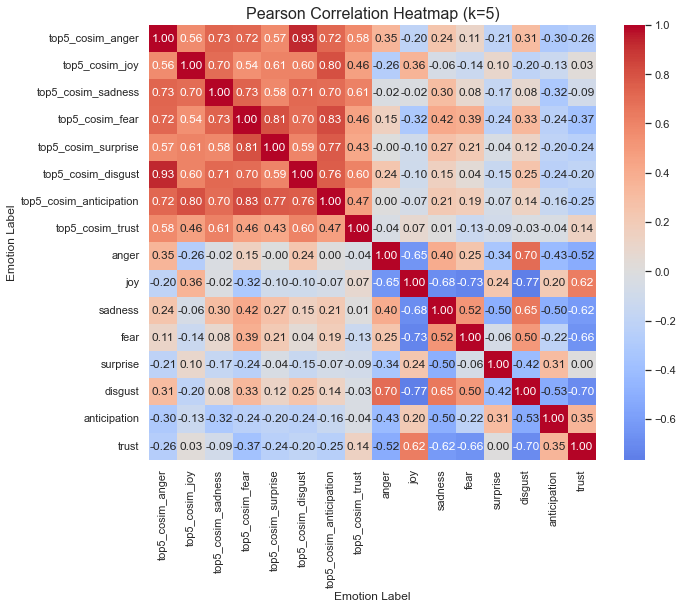

In [56]:
#Define columns for inclusion
cosin_eval = cosine_sim_emotions_5 + basic_emotions

#Calculate Pearson correlation coefficients
correlation_matrix = df_binarycomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=5)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

In [57]:
#Make lists for other k values

#k=10
top_10_anger = [word_score[0] for word_score in anger_top_10_similar_words[1:11]]
top_10_joy = [word_score[0] for word_score in joy_top_10_similar_words[1:11]]
top_10_sadness = [word_score[0] for word_score in sadness_top_10_similar_words[1:11]]
top_10_fear = [word_score[0] for word_score in fear_top_10_similar_words[1:11]]
top_10_surprise = [word_score[0] for word_score in surprise_top_10_similar_words[1:11]]
top_10_disgust = [word_score[0] for word_score in disgust_top_10_similar_words[1:11]]
top_10_anticipation = [word_score[0] for word_score in anticipation_top_10_similar_words[1:11]]
top_10_trust = [word_score[0] for word_score in trust_top_10_similar_words[1:11]]

#k=50
top_50_anger = [word_score[0] for word_score in anger_top_10_similar_words[1:51]]
top_50_joy = [word_score[0] for word_score in joy_top_10_similar_words[1:51]]
top_50_sadness = [word_score[0] for word_score in sadness_top_10_similar_words[1:51]]
top_50_fear = [word_score[0] for word_score in fear_top_10_similar_words[1:51]]
top_50_surprise = [word_score[0] for word_score in surprise_top_10_similar_words[1:51]]
top_50_disgust = [word_score[0] for word_score in disgust_top_10_similar_words[1:51]]
top_50_anticipation = [word_score[0] for word_score in anticipation_top_10_similar_words[1:51]]
top_50_trust = [word_score[0] for word_score in trust_top_10_similar_words[1:51]]

#k=100
top_100_anger = [word_score[0] for word_score in anger_top_10_similar_words[1:101]]
top_100_joy = [word_score[0] for word_score in joy_top_10_similar_words[1:101]]
top_100_sadness = [word_score[0] for word_score in sadness_top_10_similar_words[1:101]]
top_100_fear = [word_score[0] for word_score in fear_top_10_similar_words[1:101]]
top_100_surprise = [word_score[0] for word_score in surprise_top_10_similar_words[1:101]]
top_100_disgust = [word_score[0] for word_score in disgust_top_10_similar_words[1:101]]
top_100_anticipation = [word_score[0] for word_score in anticipation_top_10_similar_words[1:101]]
top_100_trust = [word_score[0] for word_score in trust_top_10_similar_words[1:101]]

In [58]:
#For each k value determine the cosine similarity score for anger

#k=10
df_binarycomp['top10_cosim_anger'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_anger:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anger_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_anger'] = similarity_scores
df_binarycomp['top10_cosim_anger'] = df_binarycomp['top10_cosim_anger'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_anger'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_anger:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anger_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_anger'] = similarity_scores
df_binarycomp['top50_cosim_anger'] = df_binarycomp['top50_cosim_anger'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_anger'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_anger:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anger_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_anger'] = similarity_scores
df_binarycomp['top100_cosim_anger'] = df_binarycomp['top100_cosim_anger'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [59]:
#For each k value determine the cosine similarity score for joy

#k=10
df_binarycomp['top10_cosim_joy'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_joy:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], joy_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_joy'] = similarity_scores
df_binarycomp['top10_cosim_joy'] = df_binarycomp['top10_cosim_joy'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_joy'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_joy:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], joy_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_joy'] = similarity_scores
df_binarycomp['top50_cosim_joy'] = df_binarycomp['top50_cosim_joy'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_joy'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_joy:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], joy_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_joy'] = similarity_scores
df_binarycomp['top100_cosim_joy'] = df_binarycomp['top100_cosim_joy'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [60]:
#For each k value determine the cosine similarity score for sadness

#k=10
df_binarycomp['top10_cosim_sadness'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_sadness:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], sadness_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_sadness'] = similarity_scores
df_binarycomp['top10_cosim_sadness'] = df_binarycomp['top10_cosim_sadness'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_sadness'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_sadness:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], sadness_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_sadness'] = similarity_scores
df_binarycomp['top50_cosim_sadness'] = df_binarycomp['top50_cosim_sadness'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_sadness'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_sadness:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], sadness_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_sadness'] = similarity_scores
df_binarycomp['top100_cosim_sadness'] = df_binarycomp['top100_cosim_sadness'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [61]:
#For each k value determine the cosine similarity score for fear

#k=10
df_binarycomp['top10_cosim_fear'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_fear:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], fear_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_fear'] = similarity_scores
df_binarycomp['top10_cosim_fear'] = df_binarycomp['top10_cosim_fear'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_fear'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_fear:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], fear_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_fear'] = similarity_scores
df_binarycomp['top50_cosim_fear'] = df_binarycomp['top50_cosim_fear'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_fear'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_fear:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], fear_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_fear'] = similarity_scores
df_binarycomp['top100_cosim_fear'] = df_binarycomp['top100_cosim_fear'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [62]:
#For each k value determine the cosine similarity score for surprise

#k=10
df_binarycomp['top10_cosim_surprise'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_surprise:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], surprise_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_surprise'] = similarity_scores
df_binarycomp['top10_cosim_surprise'] = df_binarycomp['top10_cosim_surprise'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_surprise'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_surprise:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], surprise_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_surprise'] = similarity_scores
df_binarycomp['top50_cosim_surprise'] = df_binarycomp['top50_cosim_surprise'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_surprise'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_surprise:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], surprise_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_surprise'] = similarity_scores
df_binarycomp['top100_cosim_surprise'] = df_binarycomp['top100_cosim_surprise'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [63]:
#For each k value determine the cosine similarity score for disgust

#k=10
df_binarycomp['top10_cosim_disgust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_disgust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], disgust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_disgust'] = similarity_scores
df_binarycomp['top10_cosim_disgust'] = df_binarycomp['top10_cosim_disgust'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_disgust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_disgust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], disgust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_disgust'] = similarity_scores
df_binarycomp['top50_cosim_disgust'] = df_binarycomp['top50_cosim_disgust'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_disgust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_disgust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], disgust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_disgust'] = similarity_scores
df_binarycomp['top100_cosim_disgust'] = df_binarycomp['top100_cosim_disgust'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [64]:
#For each k value determine the cosine similarity score for anticipation

#k=10
df_binarycomp['top10_cosim_anticipation'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_anticipation:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anticipation_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_anticipation'] = similarity_scores
df_binarycomp['top10_cosim_anticipation'] = df_binarycomp['top10_cosim_anticipation'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_anticipation'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_anticipation:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anticipation_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_anticipation'] = similarity_scores
df_binarycomp['top50_cosim_anticipation'] = df_binarycomp['top50_cosim_anticipation'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_anticipation'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_anticipation:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], anticipation_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_anticipation'] = similarity_scores
df_binarycomp['top100_cosim_anticipation'] = df_binarycomp['top100_cosim_anticipation'].apply(lambda row: np.mean([score for score in row if score is not None]))


C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [65]:
#For each k value determine the cosine similarity score for trust

#k=10
df_binarycomp['top10_cosim_trust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_10_trust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], trust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top10_cosim_trust'] = similarity_scores
df_binarycomp['top10_cosim_trust'] = df_binarycomp['top10_cosim_trust'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=50
df_binarycomp['top50_cosim_trust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_50_trust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], trust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top50_cosim_trust'] = similarity_scores
df_binarycomp['top50_cosim_trust'] = df_binarycomp['top50_cosim_trust'].apply(lambda row: np.mean([score for score in row if score is not None]))

#k=100
df_binarycomp['top100_cosim_trust'] = None
for index, row in df_binarycomp.iterrows():
    similarity_scores = []
    for word in top_100_trust:
        if row['emoji'] in emoji2vec:
            similarity_scores.append(cosine_similarity(emoji2vec[row['emoji']], trust_vector[word]))
        else:
            similarity_scores.append(None)
    df_binarycomp.at[index, 'top100_cosim_trust'] = similarity_scores
df_binarycomp['top100_cosim_trust'] = df_binarycomp['top100_cosim_trust'].apply(lambda row: np.mean([score for score in row if score is not None]))

C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\niamh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [66]:
#Check the transformation
df_binarycomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.104384      0.133612  0.104384  0.104384  0.176409   
1   1F319     🌙  0.112740      0.147689  0.112740  0.112740  0.140924   
2   1F31A     🌚  0.115847      0.118033  0.127869  0.115847  0.155191   
3   1F31E     🌞  0.107181      0.130761  0.107181  0.107181  0.190782   
4   1F31F     🌟  0.106724      0.136606  0.106724  0.106724  0.163287   

    sadness  surprise     trust  ...  top100_cosim_surprise  \
0  0.110647  0.127349  0.138831  ...               0.175712   
1  0.112740  0.119504  0.140924  ...               0.118254   
2  0.130055  0.115847  0.121311  ...               0.177102   
3  0.107181  0.118971  0.130761  ...               0.144044   
4  0.106724  0.133404  0.139808  ...               0.194975   

  top10_cosim_disgust  top50_cosim_disgust  top100_cosim_disgust  \
0            0.239230             0.223353              0.215318   
1            0.045726             0.071756              0.085777   
2            0.103649             0.126035              0.139794   
3            0.117464             0.143329              0.153751   
4            0.120978             0.138894              0.138994   

   top10_cosim_anticipation  top50_cosim_anticipation  \
0                  0.154938                  0.151419   
1                  0.145046                  0.132407   
2                  0.193476                  0.182303   
3                  0.130062                  0.126531   
4                  0.161124                  0.155351   

  top100_cosim_anticipation top10_cosim_trust top50_cosim_trust  \
0                  0.145318          0.210466          0.180293   
1                  0.144047          0.030840          0.067619   
2                  0.183546          0.077552          0.093381   
3                  0.125553          0.040672          0.073018   
4                  0.150109          0.102974          0.100199   

  top100_cosim_trust  
0           0.172406  
1           0.065427  
2           0.095905  
3           0.077570  
4           0.101586  

[5 rows x 54 columns]

In [67]:
#List rows with results

#k=10
cosine_sim_emotions_10 = ['top10_cosim_anger', 'top10_cosim_joy', 'top10_cosim_sadness', 'top10_cosim_fear', 'top10_cosim_surprise',
                      'top10_cosim_disgust', 'top10_cosim_anticipation', 'top10_cosim_trust']

#k=50
cosine_sim_emotions_50 = ['top50_cosim_anger', 'top50_cosim_joy', 'top50_cosim_sadness', 'top50_cosim_fear', 'top50_cosim_surprise',
                      'top50_cosim_disgust', 'top50_cosim_anticipation', 'top50_cosim_trust']

#k=100
cosine_sim_emotions_100 = ['top100_cosim_anger', 'top100_cosim_joy', 'top100_cosim_sadness', 'top100_cosim_fear', 'top100_cosim_surprise',
                      'top100_cosim_disgust', 'top100_cosim_anticipation', 'top100_cosim_trust']

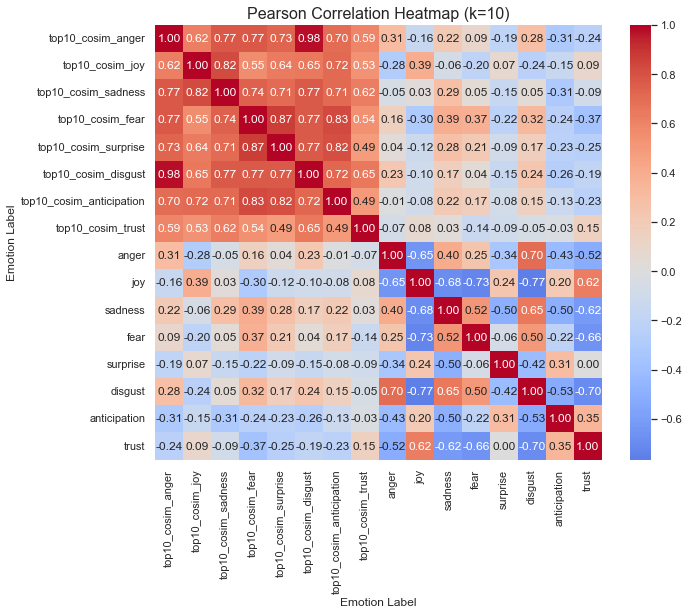

In [68]:
#Determine Pearsons correlations

#Define columns for inclusion
cosin_eval = cosine_sim_emotions_10 + basic_emotions

#Calculate Pearson correlation coefficients
correlation_matrix = df_binarycomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=10)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

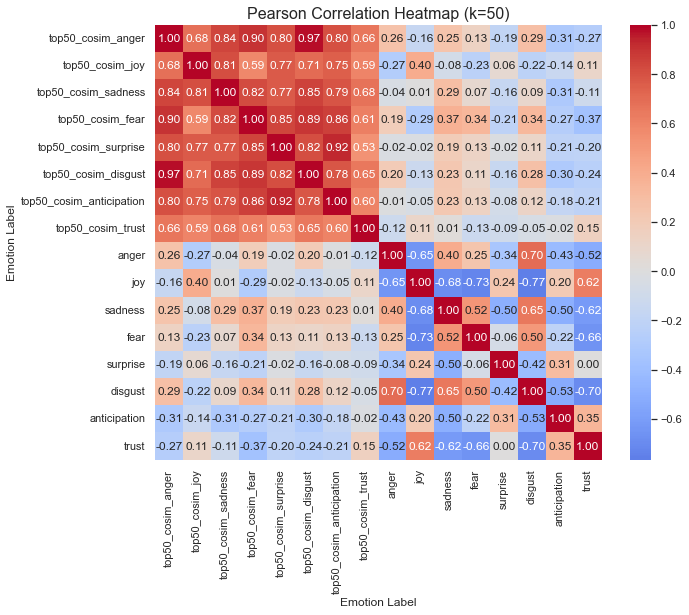

In [69]:
#Determine Pearsons correlations

#Define columns for inclusion
cosin_eval = cosine_sim_emotions_50 + basic_emotions

#Calculate Pearson correlation coefficients
correlation_matrix = df_binarycomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=50)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

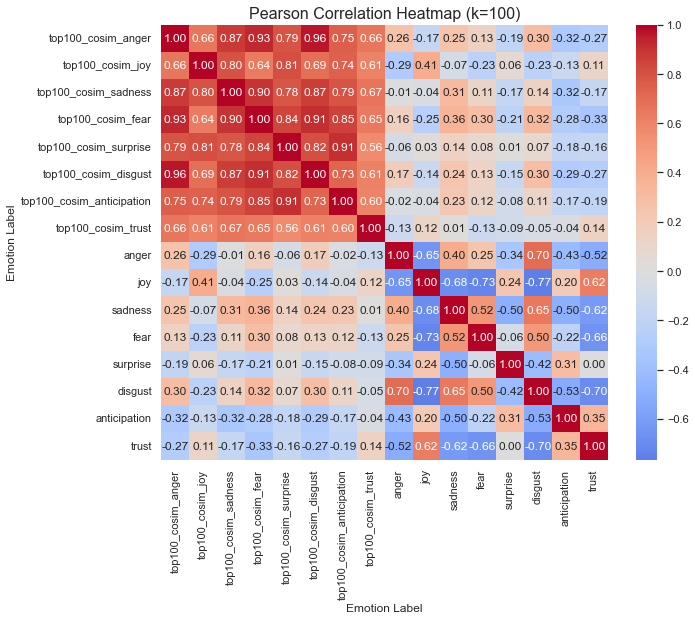

In [70]:
#Determine Pearsons correlations

#Define columns for inclusion
cosin_eval = cosine_sim_emotions_100 + basic_emotions

#Calculate Pearson correlation coefficients
correlation_matrix = df_binarycomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=100)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

# Word Intensity Lexicon

In [71]:
#Load in EmoLex text file
intlex = pd.read_csv('NRC-Emotion-Intensity-Lexicon-v1.txt', sep='\t', header=None, names=['Word', 'Emotion', 'Value'])
intlex.head()

Word Emotion  Value
0   outraged   anger  0.964
1  brutality   anger  0.959
2     hatred   anger  0.953
3    hateful   anger  0.940
4  terrorize   anger  0.939

In [72]:
#Check for null values
intlex.isnull().sum()

Word       0
Emotion    0
Value      0
dtype: int64

In [101]:
#Create lists of words with associations to each basic emotion from the intlex lexicon
emotions = ['anger', 'joy', 'sadness', 'fear', 'surprise', 'disgust', 'anticipation', 'trust']

#Create dictionaries to store words and their values for each emotion
word_dict = {emotion: [] for emotion in emotions}
value_dict = {emotion: [] for emotion in emotions}

#Iterate over the DataFrame and populate the dictionaries
for _, row in intlex.iterrows():
    word, emotion, value = row['Word'], row['Emotion'], row['Value']
    if emotion in emotions:
        word_dict[emotion].append(word)
        value_dict[emotion].append(value)
        
#Sort the words and values for each emotion in descending order
for emotion in emotions:
    sorted_indices = sorted(range(len(value_dict[emotion])), key=lambda k: value_dict[emotion][k], reverse=True)
    word_dict[emotion] = [word_dict[emotion][i] for i in sorted_indices]
    value_dict[emotion] = [value_dict[emotion][i] for i in sorted_indices]
    
#Create separate lists for each emotion and each word length (top 10, 100, and 300)
top_10_words = {emotion: word_dict[emotion][:10] for emotion in emotions}
top_100_words = {emotion: word_dict[emotion][:100] for emotion in emotions}
top_300_words = {emotion: word_dict[emotion][:300] for emotion in emotions}

In [102]:
#Check my lists work
top_10_words['anger'], top_100_words['joy']

(['outraged',
  'brutality',
  'hatred',
  'hateful',
  'terrorize',
  'violently',
  'infuriated',
  'furious',
  'furiously',
  'enraged'],
 ['happiest',
  'happiness',
  'bliss',
  'celebrating',
  'jubilant',
  'ecstatic',
  'elation',
  'beaming',
  'bestdayever',
  'loveee',
  'celebration',
  'awesomeness',
  'joy',
  'joyous',
  'fabulous',
  'happily',
  'excitement',
  'exuberance',
  'makesmehappy',
  'euphoria',
  'lovee',
  'gratitude',
  'happydance',
  'merriment',
  'spectacular',
  'overjoyed',
  'purebliss',
  'triumphant',
  'ecstasy',
  'lovelovelove',
  'cheerful',
  'cheer',
  'elated',
  'peaceofmind',
  'jolly',
  'delighted',
  'lovethis',
  'excitation',
  'exhilaration',
  'pleasures',
  'laugh',
  'marvelously',
  'loving',
  'joyful',
  'blissful',
  'outstanding',
  'pleasurable',
  'lovinglife',
  'enthusiastic',
  'glee',
  'iloveher',
  'yaaaay',
  'overthemoon',
  'happyplace',
  'sohappy',
  'superb',
  'woohoo',
  'laughing',
  'wonderful',
  'hooray

In [92]:
#Copy the dataset to store information for this test
df_intcomp = df.copy()

In [74]:
#Store lists in new variables
anger_words = emotion_words_dict['anger']
joy_words = emotion_words_dict['joy']
sadness_words = emotion_words_dict['sadness']
fear_words = emotion_words_dict['fear']
surprise_words = emotion_words_dict['surprise']
disgust_words = emotion_words_dict['disgust']
anticipation_words = emotion_words_dict['anticipation']
trust_words = emotion_words_dict['trust']

In [75]:
#Make file containing word vectors for words which are associated with anger

#Download the pre-trained Word2Vec model from Gensim data server (300d to match emoji vector)
word2vec_model = api.load('word2vec-google-news-300')

#Extract the word vectors for the angry words
anger_vectors = {word: word2vec_model[word] for word in anger_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'anger_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(anger_vectors[list(anger_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(anger_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in anger_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [76]:
#Same process for joy

#Extract the word vectors
joy_vectors = {word: word2vec_model[word] for word in joy_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'joy_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(joy_vectors[list(joy_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(joy_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in joy_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [77]:
#Same process for sadness

#Extract the word vectors
sadness_vectors = {word: word2vec_model[word] for word in sadness_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'sadness_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(sadness_vectors[list(sadness_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(sadness_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in sadness_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [78]:
#Same process for fear

#Extract the word vectors
fear_vectors = {word: word2vec_model[word] for word in fear_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'fear_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(fear_vectors[list(fear_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(fear_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in fear_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [79]:
#Same process for surprise

#Extract the word vectors
surprise_vectors = {word: word2vec_model[word] for word in surprise_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'surprise_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(surprise_vectors[list(surprise_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(surprise_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in surprise_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [80]:
#Same process for disgust

#Extract the word vectors
disgust_vectors = {word: word2vec_model[word] for word in disgust_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'disgust_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(disgust_vectors[list(disgust_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(disgust_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in disgust_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [81]:
#Same process for anticipation

#Extract the word vectors
anticipation_vectors = {word: word2vec_model[word] for word in anticipation_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'anticipation_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(anticipation_vectors[list(anticipation_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(anticipation_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in anticipation_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [82]:
#Same process for trust

#Extract the word vectors
trust_vectors = {word: word2vec_model[word] for word in trust_words if word in word2vec_model}

#Save to a new file for later use
output_file = 'trust_vectors_int.txt'

#Get the vector size from the first word vector in the dictionary
vector_size = len(trust_vectors[list(trust_vectors.keys())[0]])

with open(output_file, 'w', encoding='utf-8') as file:
    #Write the first line with vocabulary size and vector size
    file.write(f"{len(trust_vectors)} {vector_size}\n")

    #Write each emotion word and its corresponding vector to the file
    for word, vector in trust_vectors.items():
        vector_str = ' '.join(str(val) for val in vector)
        file.write(f'{word} {vector_str}\n')

In [83]:
#Copy the dataset to store information for this test
df_intcomp = df.copy()

In [ ]:
#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anger_vector.index_to_key:
            word_vector = np.array(anger_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anger_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anger_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anger_intensity_dict[word]
        
        if len(anger_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anger_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 5_anger' column to the DataFrame
df_intcomp['top_5_anger'] = average_intensities

df_intcomp.head()

In [648]:
#Determine the emotion words associated with each basic emotion with the most similar vectors for each emoji- anger

#Load associated words vector file
anger_vector = KeyedVectors.load_word2vec_format('anger_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anger_intensity_dict = {word: anger_vector.get_vector(word)[0] for word in anger_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anger_vector.index_to_key:
            word_vector = np.array(anger_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anger_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anger_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anger_intensity_dict[word]
        
        if len(anger_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anger_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 5_anger' column to the DataFrame
df_intcomp['top_5_anger'] = average_intensities

df_intcomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.063291      0.240506  0.063291  0.063291  0.500000   
1   1F319     🌙  0.114943      0.471264  0.114943  0.114943  0.402299   
2   1F31A     🌚  0.139130      0.156522  0.234783  0.139130  0.452174   
3   1F31E     🌞  0.075188      0.240602  0.075188  0.075188  0.661654   
4   1F31F     🌟  0.072993      0.277372  0.072993  0.072993  0.459854   

    sadness  surprise     trust  ...      le_-      le_0  sent_score  \
0  0.101266  0.202532  0.272152  ...  0.065934  0.351648    0.516484   
1  0.114943  0.183908  0.402299  ...  0.065574  0.278689    0.590164   
2  0.252174  0.139130  0.182609  ...  0.158940  0.218543    0.463576   
3  0.075188  0.157895  0.240602  ...  0.024242  0.393939    0.557576   
4  0.072993  0.255474  0.299270  ...  0.059406  0.554455    0.326733   

   sent_score_class  upper_error_class  lower_error_class sent_polar  \
0          Positive           Positive           Positive   Positive   
1          Positive           Positive           Positive   Positive   
2          Positive           Positive           Positive   Positive   
3          Positive           Positive           Positive   Positive   
4          Positive           Positive           Positive   Positive   

  primary_basic_emot total top_5_anger  
0                joy  1.58    0.219238  
1       anticipation  0.87    0.228678  
2                joy  1.15    0.166707  
3                joy  1.33    0.142741  
4                joy  1.37    0.224772  

[5 rows x 23 columns]

In [649]:
#Repeat for k=10- anger

#Load associated words vector file
anger_vector = KeyedVectors.load_word2vec_format('anger_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anger_intensity_dict = {word: anger_vector.get_vector(word)[0] for word in anger_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anger_vector.index_to_key:
            word_vector = np.array(anger_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anger_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anger_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anger_intensity_dict[word]
        
        if len(anger_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anger_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 5_anger' column to the DataFrame
df_intcomp['top_10_anger'] = average_intensities

In [650]:
#Repeat for k=50- anger

#Load associated words vector file
anger_vector = KeyedVectors.load_word2vec_format('anger_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anger_intensity_dict = {word: anger_vector.get_vector(word)[0] for word in anger_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anger_vector.index_to_key:
            word_vector = np.array(anger_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anger_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anger_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anger_intensity_dict[word]
        
        if len(anger_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anger_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 5_anger' column to the DataFrame
df_intcomp['top_50_anger'] = average_intensities

In [651]:
#Repeat for k=50- anger

#Load associated words vector file
anger_vector = KeyedVectors.load_word2vec_format('anger_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anger_intensity_dict = {word: anger_vector.get_vector(word)[0] for word in anger_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anger_vector.index_to_key:
            word_vector = np.array(anger_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anger_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anger_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anger_intensity_dict[word]
        
        if len(anger_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anger_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 5_anger' column to the DataFrame
df_intcomp['top_100_anger'] = average_intensities

In [652]:
#Repeat for k=5- joy

#Load associated words vector file
joy_vector = KeyedVectors.load_word2vec_format('joy_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
joy_intensity_dict = {word: joy_vector.get_vector(word)[0] for word in joy_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in joy_vector.index_to_key:
            word_vector = np.array(joy_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    joy_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in joy_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += joy_intensity_dict[word]
        
        if len(joy_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(joy_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 100_joy' column to the DataFrame
df_intcomp['top_5_joy'] = average_intensities

In [653]:
#Repeat for k=10- joy

#Load associated words vector file
joy_vector = KeyedVectors.load_word2vec_format('joy_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
joy_intensity_dict = {word: joy_vector.get_vector(word)[0] for word in joy_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in joy_vector.index_to_key:
            word_vector = np.array(joy_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    joy_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in joy_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += joy_intensity_dict[word]
        
        if len(joy_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(joy_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 100_joy' column to the DataFrame
df_intcomp['top_10_joy'] = average_intensities

In [654]:
#Repeat for k=50- joy

#Load associated words vector file
joy_vector = KeyedVectors.load_word2vec_format('joy_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
joy_intensity_dict = {word: joy_vector.get_vector(word)[0] for word in joy_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in joy_vector.index_to_key:
            word_vector = np.array(joy_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    joy_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in joy_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += joy_intensity_dict[word]
        
        if len(joy_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(joy_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 100_joy' column to the DataFrame
df_intcomp['top_50_joy'] = average_intensities

In [655]:
#Repeat for k=100- joy

#Load associated words vector file
joy_vector = KeyedVectors.load_word2vec_format('joy_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
joy_intensity_dict = {word: joy_vector.get_vector(word)[0] for word in joy_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in joy_vector.index_to_key:
            word_vector = np.array(joy_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    joy_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in joy_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += joy_intensity_dict[word]
        
        if len(joy_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(joy_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 100_joy' column to the DataFrame
df_intcomp['top_100_joy'] = average_intensities

df_intcomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.063291      0.240506  0.063291  0.063291  0.500000   
1   1F319     🌙  0.114943      0.471264  0.114943  0.114943  0.402299   
2   1F31A     🌚  0.139130      0.156522  0.234783  0.139130  0.452174   
3   1F31E     🌞  0.075188      0.240602  0.075188  0.075188  0.661654   
4   1F31F     🌟  0.072993      0.277372  0.072993  0.072993  0.459854   

    sadness  surprise     trust  ...  primary_basic_emot total  top_5_anger  \
0  0.101266  0.202532  0.272152  ...                 joy  1.58     0.219238   
1  0.114943  0.183908  0.402299  ...        anticipation  0.87     0.228678   
2  0.252174  0.139130  0.182609  ...                 joy  1.15     0.166707   
3  0.075188  0.157895  0.240602  ...                 joy  1.33     0.142741   
4  0.072993  0.255474  0.299270  ...                 joy  1.37     0.224772   

   top_10_anger  top_50_anger  top_100_anger top_5_joy top_10_joy top_50_joy  \
0      0.151290      0.153912       0.137715  0.140137   0.166548   0.209654   
1      0.146806      0.108626       0.105124  0.003072   0.021873   0.104860   
2      0.181430      0.126384       0.126813  0.012085   0.014726   0.055507   
3      0.131237      0.170439       0.166618  0.123311   0.087652   0.129739   
4      0.202886      0.162553       0.144881  0.111247   0.124523   0.149812   

  top_100_joy  
0    0.190607  
1    0.090805  
2    0.078774  
3    0.123506  
4    0.147558  

[5 rows x 30 columns]

In [656]:
#Repeat for k=5- sadness

#Load associated words vector file
sadness_vector = KeyedVectors.load_word2vec_format('sadness_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
sadness_intensity_dict = {word: sadness_vector.get_vector(word)[0] for word in sadness_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in sadness_vector.index_to_key:
            word_vector = np.array(sadness_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    sadness_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in sadness_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += sadness_intensity_dict[word]
        
        if len(sadness_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(sadness_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_sadness' column to the DataFrame
df_intcomp['top_5_sadness'] = average_intensities

In [657]:
#Repeat for k=5- sadness

#Load associated words vector file
sadness_vector = KeyedVectors.load_word2vec_format('sadness_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
sadness_intensity_dict = {word: sadness_vector.get_vector(word)[0] for word in sadness_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in sadness_vector.index_to_key:
            word_vector = np.array(sadness_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    sadness_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in sadness_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += sadness_intensity_dict[word]
        
        if len(sadness_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(sadness_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_sadness' column to the DataFrame
df_intcomp['top_10_sadness'] = average_intensities

In [658]:
#Repeat for k=50- sadness

#Load associated words vector file
sadness_vector = KeyedVectors.load_word2vec_format('sadness_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
sadness_intensity_dict = {word: sadness_vector.get_vector(word)[0] for word in sadness_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in sadness_vector.index_to_key:
            word_vector = np.array(sadness_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    sadness_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in sadness_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += sadness_intensity_dict[word]
        
        if len(sadness_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(sadness_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_sadness' column to the DataFrame
df_intcomp['top_50_sadness'] = average_intensities

In [659]:
#Repeat for k=100- sadness

#Load associated words vector file
sadness_vector = KeyedVectors.load_word2vec_format('sadness_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
sadness_intensity_dict = {word: sadness_vector.get_vector(word)[0] for word in sadness_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in sadness_vector.index_to_key:
            word_vector = np.array(sadness_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    sadness_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in sadness_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += sadness_intensity_dict[word]
        
        if len(sadness_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(sadness_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_sadness' column to the DataFrame
df_intcomp['top_100_sadness'] = average_intensities

In [660]:
#Repeat for k=5- fear

#Load associated words vector file
fear_vector = KeyedVectors.load_word2vec_format('fear_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
fear_intensity_dict = {word: fear_vector.get_vector(word)[0] for word in fear_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in fear_vector.index_to_key:
            word_vector = np.array(fear_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    fear_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in fear_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += fear_intensity_dict[word]
        
        if len(fear_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(fear_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_fear' column to the DataFrame
df_intcomp['top_5_fear'] = average_intensities

In [661]:
#Repeat for k=10- fear

#Load associated words vector file
fear_vector = KeyedVectors.load_word2vec_format('fear_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
fear_intensity_dict = {word: fear_vector.get_vector(word)[0] for word in fear_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in fear_vector.index_to_key:
            word_vector = np.array(fear_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    fear_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in fear_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += fear_intensity_dict[word]
        
        if len(fear_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(fear_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_fear' column to the DataFrame
df_intcomp['top_10_fear'] = average_intensities

In [662]:
#Repeat for k=50- fear

#Load associated words vector file
fear_vector = KeyedVectors.load_word2vec_format('fear_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
fear_intensity_dict = {word: fear_vector.get_vector(word)[0] for word in fear_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in fear_vector.index_to_key:
            word_vector = np.array(fear_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    fear_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in fear_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += fear_intensity_dict[word]
        
        if len(fear_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(fear_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_fear' column to the DataFrame
df_intcomp['top_50_fear'] = average_intensities

In [663]:
#Repeat for k=100- fear

#Load associated words vector file
fear_vector = KeyedVectors.load_word2vec_format('fear_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
fear_intensity_dict = {word: fear_vector.get_vector(word)[0] for word in fear_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in fear_vector.index_to_key:
            word_vector = np.array(fear_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    fear_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in fear_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += fear_intensity_dict[word]
        
        if len(fear_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(fear_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_fear' column to the DataFrame
df_intcomp['top_100_fear'] = average_intensities

In [664]:
#Repeat for k=5- surprise

#Load associated words vector file
surprise_vector = KeyedVectors.load_word2vec_format('surprise_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
surprise_intensity_dict = {word: surprise_vector.get_vector(word)[0] for word in surprise_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in surprise_vector.index_to_key:
            word_vector = np.array(surprise_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    surprise_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in surprise_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += surprise_intensity_dict[word]
        
        if len(surprise_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(surprise_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_surprise' column to the DataFrame
df_intcomp['top_5_surprise'] = average_intensities

In [665]:
#Repeat for k=10- surprise

#Load associated words vector file
surprise_vector = KeyedVectors.load_word2vec_format('surprise_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
surprise_intensity_dict = {word: surprise_vector.get_vector(word)[0] for word in surprise_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in surprise_vector.index_to_key:
            word_vector = np.array(surprise_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    surprise_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in surprise_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += surprise_intensity_dict[word]
        
        if len(surprise_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(surprise_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_surprise' column to the DataFrame
df_intcomp['top_10_surprise'] = average_intensities

In [666]:
#Repeat for k=50- surprise

#Load associated words vector file
surprise_vector = KeyedVectors.load_word2vec_format('surprise_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
surprise_intensity_dict = {word: surprise_vector.get_vector(word)[0] for word in surprise_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in surprise_vector.index_to_key:
            word_vector = np.array(surprise_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    surprise_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in surprise_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += surprise_intensity_dict[word]
        
        if len(surprise_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(surprise_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_surprise' column to the DataFrame
df_intcomp['top_50_surprise'] = average_intensities

In [667]:
#Repeat for k=100- surprise

#Load associated words vector file
surprise_vector = KeyedVectors.load_word2vec_format('surprise_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
surprise_intensity_dict = {word: surprise_vector.get_vector(word)[0] for word in surprise_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in surprise_vector.index_to_key:
            word_vector = np.array(surprise_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    surprise_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in surprise_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += surprise_intensity_dict[word]
        
        if len(surprise_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(surprise_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_surprise' column to the DataFrame
df_intcomp['top_100_surprise'] = average_intensities

In [668]:
#Repeat for k=5- disgust

#Load associated words vector file
disgust_vector = KeyedVectors.load_word2vec_format('disgust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
disgust_intensity_dict = {word: disgust_vector.get_vector(word)[0] for word in disgust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in disgust_vector.index_to_key:
            word_vector = np.array(disgust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    disgust_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in disgust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += disgust_intensity_dict[word]
        
        if len(disgust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(disgust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_disgust' column to the DataFrame
df_intcomp['top_5_disgust'] = average_intensities

In [669]:
#Repeat for k=10- disgust

#Load associated words vector file
disgust_vector = KeyedVectors.load_word2vec_format('disgust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
disgust_intensity_dict = {word: disgust_vector.get_vector(word)[0] for word in disgust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in disgust_vector.index_to_key:
            word_vector = np.array(disgust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    disgust_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in disgust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += disgust_intensity_dict[word]
        
        if len(disgust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(disgust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_disgust' column to the DataFrame
df_intcomp['top_10_disgust'] = average_intensities

In [670]:
#Repeat for k=50- disgust

#Load associated words vector file
disgust_vector = KeyedVectors.load_word2vec_format('disgust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
disgust_intensity_dict = {word: disgust_vector.get_vector(word)[0] for word in disgust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in disgust_vector.index_to_key:
            word_vector = np.array(disgust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    disgust_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in disgust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += disgust_intensity_dict[word]
        
        if len(disgust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(disgust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_disgust' column to the DataFrame
df_intcomp['top_50_disgust'] = average_intensities

In [671]:
#Repeat for k=100- disgust

#Load associated words vector file
disgust_vector = KeyedVectors.load_word2vec_format('disgust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
disgust_intensity_dict = {word: disgust_vector.get_vector(word)[0] for word in disgust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in disgust_vector.index_to_key:
            word_vector = np.array(disgust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    disgust_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in disgust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += disgust_intensity_dict[word]
        
        if len(disgust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(disgust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_disgust' column to the DataFrame
df_intcomp['top_100_disgust'] = average_intensities

In [672]:
#Repeat for k=5- anticipation

#Load associated words vector file
anticipation_vector = KeyedVectors.load_word2vec_format('anticipation_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anticipation_intensity_dict = {word: anticipation_vector.get_vector(word)[0] for word in anticipation_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anticipation_vector.index_to_key:
            word_vector = np.array(anticipation_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anticipation_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anticipation_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anticipation_intensity_dict[word]
        
        if len(anticipation_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anticipation_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_anticipation' column to the DataFrame
df_intcomp['top_5_anticipation'] = average_intensities

In [673]:
#Repeat for k=10- anticipation

#Load associated words vector file
anticipation_vector = KeyedVectors.load_word2vec_format('anticipation_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anticipation_intensity_dict = {word: anticipation_vector.get_vector(word)[0] for word in anticipation_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anticipation_vector.index_to_key:
            word_vector = np.array(anticipation_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anticipation_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anticipation_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anticipation_intensity_dict[word]
        
        if len(anticipation_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anticipation_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_anticipation' column to the DataFrame
df_intcomp['top_10_anticipation'] = average_intensities

In [674]:
#Repeat for k=50- anticipation

#Load associated words vector file
anticipation_vector = KeyedVectors.load_word2vec_format('anticipation_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anticipation_intensity_dict = {word: anticipation_vector.get_vector(word)[0] for word in anticipation_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anticipation_vector.index_to_key:
            word_vector = np.array(anticipation_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anticipation_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anticipation_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anticipation_intensity_dict[word]
        
        if len(anticipation_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anticipation_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_anticipation' column to the DataFrame
df_intcomp['top_50_anticipation'] = average_intensities

In [675]:
#Repeat for k=100- anticipation

#Load associated words vector file
anticipation_vector = KeyedVectors.load_word2vec_format('anticipation_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
anticipation_intensity_dict = {word: anticipation_vector.get_vector(word)[0] for word in anticipation_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in anticipation_vector.index_to_key:
            word_vector = np.array(anticipation_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    anticipation_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in anticipation_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += anticipation_intensity_dict[word]
        
        if len(anticipation_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(anticipation_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_anticipation' column to the DataFrame
df_intcomp['top_100_anticipation'] = average_intensities

In [676]:
#Repeat for k=5- trust

#Load associated words vector file
trust_vector = KeyedVectors.load_word2vec_format('trust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
trust_intensity_dict = {word: trust_vector.get_vector(word)[0] for word in trust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in trust_vector.index_to_key:
            word_vector = np.array(trust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    trust_top_similar_words = similarity_scores[:6]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in trust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += trust_intensity_dict[word]
        
        if len(trust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(trust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_trust' column to the DataFrame
df_intcomp['top_5_trust'] = average_intensities

In [677]:
#Repeat for k=5- trust

#Load associated words vector file
trust_vector = KeyedVectors.load_word2vec_format('trust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
trust_intensity_dict = {word: trust_vector.get_vector(word)[0] for word in trust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in trust_vector.index_to_key:
            word_vector = np.array(trust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    trust_top_similar_words = similarity_scores[:11]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in trust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += trust_intensity_dict[word]
        
        if len(trust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(trust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_trust' column to the DataFrame
df_intcomp['top_10_trust'] = average_intensities

In [678]:
#Repeat for k=50- trust

#Load associated words vector file
trust_vector = KeyedVectors.load_word2vec_format('trust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
trust_intensity_dict = {word: trust_vector.get_vector(word)[0] for word in trust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in trust_vector.index_to_key:
            word_vector = np.array(trust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    trust_top_similar_words = similarity_scores[:51]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in trust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += trust_intensity_dict[word]
        
        if len(trust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(trust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_trust' column to the DataFrame
df_intcomp['top_50_trust'] = average_intensities

In [679]:
#Repeat for k=100- trust

#Load associated words vector file
trust_vector = KeyedVectors.load_word2vec_format('trust_vectors_int.txt', binary=False)

#Create a dictionary to store the similarity scores for each emoji
emoji_similarity_scores = {}

#Create a dictionary to map words to their intensity values
trust_intensity_dict = {word: trust_vector.get_vector(word)[0] for word in trust_vector.index_to_key}

#Initialize an empty list to store the average intensity for each emoji
average_intensities = []

#Loop through each emoji
for emoji in df_intcomp['emoji']:
    similarity_scores = []
    if emoji in emoji2vec:
        emoji_vector = np.array(emoji2vec[emoji])
        for word in trust_vector.index_to_key:
            word_vector = np.array(trust_vector.get_vector(word))
            similarity_score = cosine_similarity(emoji_vector, word_vector)
            similarity_scores.append((word, similarity_score))
        similarity_scores.sort(key=lambda x: x[1], reverse=True)
        emoji_similarity_scores[emoji] = similarity_scores[1:101]
    else:
        emoji_similarity_scores[emoji] = []
        
    #Get the most similar words k=5
    trust_top_similar_words = similarity_scores[:101]
    
    #Calculate the average intensity for the top 5 similar words
    total_intensity = 0
    for word, similarity_score in trust_top_similar_words:
        #Lookup the intensity value from the dictionary and add it to the total
        total_intensity += trust_intensity_dict[word]
        
        if len(trust_top_similar_words) > 0:
            #Calculate the average intensity
            average_intensity = total_intensity / len(trust_top_similar_words)
        else:
            #If the list is empty, set the average intensity to zero
            average_intensity = 0
    
    #Append the average intensity to the list
    average_intensities.append(average_intensity)
    
#Add the 'top 50_trust' column to the DataFrame
df_intcomp['top_100_trust'] = average_intensities

In [680]:
#Check the transformations
df_intcomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.063291      0.240506  0.063291  0.063291  0.500000   
1   1F319     🌙  0.114943      0.471264  0.114943  0.114943  0.402299   
2   1F31A     🌚  0.139130      0.156522  0.234783  0.139130  0.452174   
3   1F31E     🌞  0.075188      0.240602  0.075188  0.075188  0.661654   
4   1F31F     🌟  0.072993      0.277372  0.072993  0.072993  0.459854   

    sadness  surprise     trust  ...  top_50_disgust top_100_disgust  \
0  0.101266  0.202532  0.272152  ...        0.134864        0.123112   
1  0.114943  0.183908  0.402299  ...        0.089707        0.066792   
2  0.252174  0.139130  0.182609  ...        0.089204        0.099224   
3  0.075188  0.157895  0.240602  ...        0.139003        0.136738   
4  0.072993  0.255474  0.299270  ...        0.099490        0.110935   

   top_5_anticipation  top_10_anticipation  top_50_anticipation  \
0            0.218221             0.278298             0.194672   
1            0.037140             0.023166             0.101690   
2            0.007385             0.010509             0.103397   
3            0.104757             0.152066             0.174789   
4            0.127218             0.127785             0.162180   

   top_100_anticipation top_5_trust top_10_trust top_50_trust top_100_trust  
0              0.134618    0.115560     0.179843     0.190442      0.172236  
1              0.112549    0.141663     0.085127     0.125334      0.103211  
2              0.106119    0.011332     0.015303     0.095744      0.106915  
3              0.171428    0.089417     0.115623     0.140495      0.162156  
4              0.143901    0.096802     0.105646     0.151672      0.131596  

[5 rows x 54 columns]

In [681]:
#List rows with results

#k=5
cosine_sim_emotions_5 = ['top_5_anger', 'top_5_joy', 'top_5_sadness', 'top_5_fear', 'top_5_surprise',
                      'top_5_disgust', 'top_5_anticipation', 'top_5_trust']

#k=10
cosine_sim_emotions_10 = ['top_10_anger', 'top_10_joy', 'top_10_sadness', 'top_10_fear', 'top_10_surprise',
                      'top_10_disgust', 'top_10_anticipation', 'top_10_trust']

#k=50
cosine_sim_emotions_50 = ['top_50_anger', 'top_50_joy', 'top_50_sadness', 'top_50_fear', 'top_50_surprise',
                      'top_50_disgust', 'top_50_anticipation', 'top_50_trust']

#k=100
cosine_sim_emotions_100 = ['top_100_anger', 'top_100_joy', 'top_100_sadness', 'top_100_fear', 'top_100_surprise',
                      'top_100_disgust', 'top_100_anticipation', 'top_100_trust']

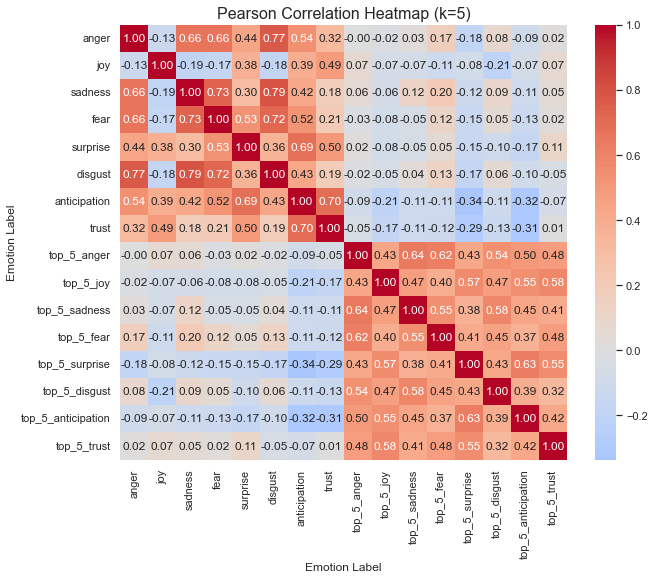

In [682]:
#Determine pearsons correlation k=5

#Define columns to be included in the matric
cosin_eval = basic_emotions + cosine_sim_emotions_5

#Calculate Pearson correlation coefficients
correlation_matrix = df_intcomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=5)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

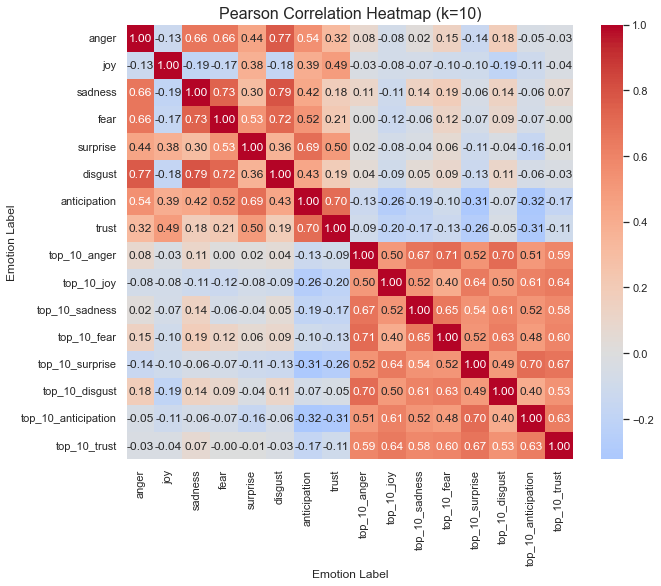

In [683]:
#Determine pearsons correlation k=5

#Define columns to be included in the matric
cosin_eval = basic_emotions + cosine_sim_emotions_10

#Calculate Pearson correlation coefficients
correlation_matrix = df_intcomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=10)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

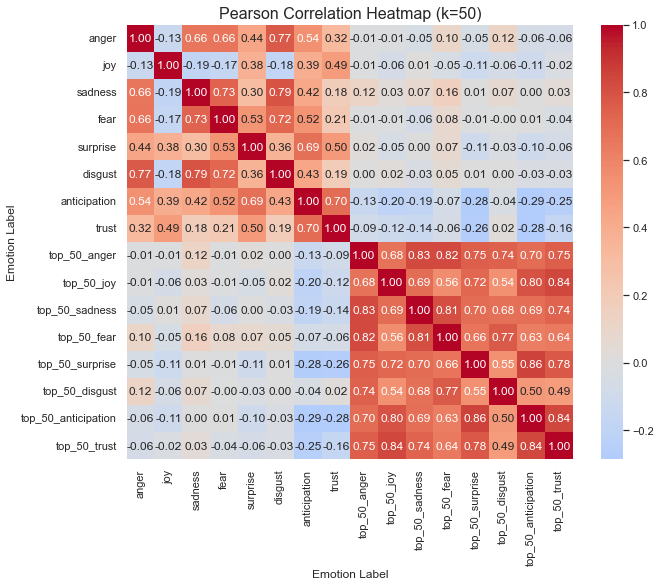

In [684]:
#Determine pearsons correlation k=5

#Define columns to be included in the matric
cosin_eval = basic_emotions + cosine_sim_emotions_50

#Calculate Pearson correlation coefficients
correlation_matrix = df_intcomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=50)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

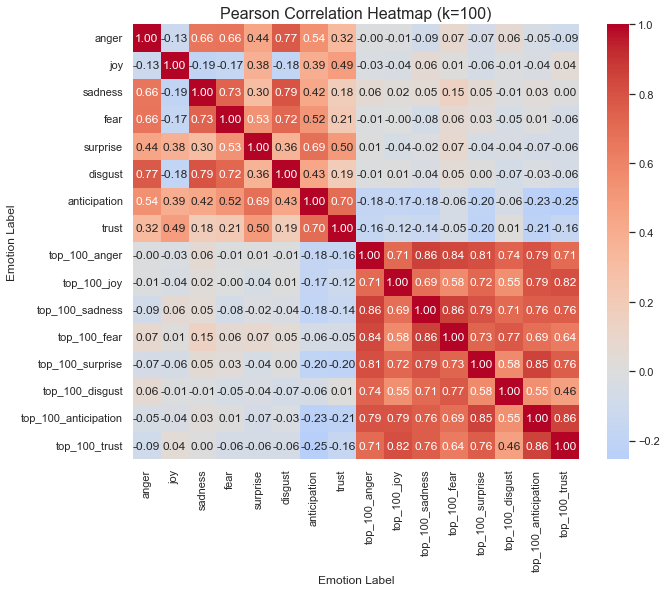

In [685]:
#Determine pearsons correlation k=5

#Define columns to be included in the matric
cosin_eval = basic_emotions + cosine_sim_emotions_100

#Calculate Pearson correlation coefficients
correlation_matrix = df_intcomp[cosin_eval].corr(method='pearson')

#Define heatmap design
sns.set(style='white')
plt.figure(figsize=(10, 8))

#Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

#Add title and labels
plt.title("Pearson Correlation Heatmap (k=100)", fontsize=16)
plt.xlabel('Emotion Label', fontsize=12)
plt.ylabel('Emotion Label', fontsize=12)

#Show the plot
plt.show()

# Preparation for machine learning- Feature Scaling

Scaling is a challenge in the context of this problem set. Due to the nature of emotions, it may not be desirable to scale data within the subclasses of basic and dimensional theory in line with the overall dataset as the greater and lesser relavtive values of each emotion are reflective of the strength of the emotion which is associated with the emoji itself. This is additional relevant and important information which should be retained. However this is not to say that the two models data is appropriately scaled for optimal compatability at present. The following section aims to evaluate if feature scaling for numeric values is necessary, and if so, the optimal method to do so.

In [687]:
#Start with the basiccomp df

#Check for columns containing numerical data
df_basiccomp.dtypes

unicode                 object
emoji                   object
anger                  float64
anticipation           float64
disgust                float64
fear                   float64
joy                    float64
sadness                float64
surprise               float64
trust                  float64
Position               float64
Unicode block           object
le_+                   float64
le_-                   float64
le_0                   float64
sent_score             float64
sent_score_class        object
upper_error_class       object
lower_error_class       object
sent_polar              object
primary_basic_emot      object
total                  float64
co_sim_anger           float64
co_sim_joy             float64
co_sim_sadness         float64
co_sim_fear            float64
co_sim_surprise        float64
co_sim_disgust         float64
co_sim_anticipation    float64
co_sim_trust           float64
dtype: object

In [689]:
#Add columns to aid in scaling data later on

#Basic theory human annotated
df_basiccomp['total_prescale'] = df_basiccomp['anger'] + df_basiccomp['joy'] + df_basiccomp['sadness'] + df_basiccomp['fear'] + df_basiccomp['surprise'] + df_basiccomp['disgust'] + df_basiccomp['anticipation'] + df_basiccomp['trust']

#Basic theory cosine similarity
df_basiccomp['total_cosin_sim'] = df_basiccomp['co_sim_anger'] + df_basiccomp['co_sim_joy'] + df_basiccomp['co_sim_sadness'] + df_basiccomp['co_sim_fear'] + df_basiccomp['co_sim_surprise'] + df_basiccomp['co_sim_disgust'] + df_basiccomp['co_sim_anticipation'] + df_basiccomp['co_sim_trust']
df_basiccomp['total_cosin_sim_prescale'] = df_basiccomp['co_sim_anger'] + df_basiccomp['co_sim_joy'] + df_basiccomp['co_sim_sadness'] + df_basiccomp['co_sim_fear'] + df_basiccomp['co_sim_surprise'] + df_basiccomp['co_sim_disgust'] + df_basiccomp['co_sim_anticipation'] + df_basiccomp['co_sim_trust']

#Dimensional theory
df_basiccomp['dt_total'] = df_basiccomp['le_+'] + df_basiccomp['le_-']
df_basiccomp['dt_total_prescale'] = df_basiccomp['le_+'] + df_basiccomp['le_-']

df_basiccomp.columns

Index(['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'Position', 'Unicode block', 'le_+',
       'le_-', 'le_0', 'sent_score', 'sent_score_class', 'upper_error_class',
       'lower_error_class', 'sent_polar', 'primary_basic_emot', 'total',
       'co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear',
       'co_sim_surprise', 'co_sim_disgust', 'co_sim_anticipation',
       'co_sim_trust', 'total_prescale', 'total_cosin_sim',
       'total_cosin_sim_prescale', 'dt_total', 'dt_total_prescale'],
      dtype='object')

In [691]:
#Check means
print(df_basiccomp['total'].mean(), df_basiccomp['sent_score'].mean(), df_basiccomp['le_0'].mean(), 
df_basiccomp['total_cosin_sim'].mean(), df_basiccomp['dt_total'].mean())

1.5528859060402682 0.32754414318448444 0.3179537187036618 1.3845979102224 0.682046281296337


In [692]:
#Check medians
print(df_basiccomp['total'].median(), df_basiccomp['sent_score'].median(), df_basiccomp['le_0'].median(), 
df_basiccomp['total_cosin_sim'].median(), df_basiccomp['dt_total'].median())

1.6100000000000003 0.4169909208819715 0.2786885245901639 1.3543308936059475 0.721311475409836


In [693]:
#Check ranges
df_basiccomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.154453      0.296006    0.164143    0.159612    0.326227   
std      0.134433      0.187403    0.138884    0.125805    0.211109   
min      0.043290      0.075630    0.043290    0.043290    0.033898   
25%      0.066667      0.188406    0.068966    0.080000    0.118644   
50%      0.112360      0.248731    0.123288    0.120482    0.357143   
75%      0.183908      0.344371    0.213953    0.203209    0.476636   
max      0.909091      1.636364    0.909091    0.909091    1.181818   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.164158    0.196485    0.275838    0.748170    0.504795  ...   
std      0.136795    0.117012    0.188641    0.117897    0.171828  ...   
min      0.043290    0.040816    0.048544    0.193496    0.123188  ...   
25%      0.071942    0.125749    0.139073    0.701409    0.359684  ...   
50%      0.116279    0.175115    0.256757    0.779044    0.526316  ...   
75%      0.207207    0.238095    0.351598    0.827467    0.633523  ...   
max      0.909091    0.909091    1.285714    0.919654    0.798969  ...   

       co_sim_fear  co_sim_surprise  co_sim_disgust  co_sim_anticipation  \
count   132.000000       132.000000      132.000000           132.000000   
mean      0.179055         0.169858        0.193592             0.129364   
std       0.093699         0.081604        0.100793             0.069138   
min      -0.020527        -0.051255       -0.038751            -0.017648   
25%       0.113283         0.122768        0.123092             0.081172   
50%       0.169714         0.168862        0.187419             0.129250   
75%       0.241180         0.214979        0.256874             0.176631   
max       0.497504         0.397162        0.569449             0.311745   

       co_sim_trust  total_prescale  total_cosin_sim  \
count    132.000000      149.000000       132.000000   
mean       0.127170        1.736922         1.384598   
std        0.089050        0.837552         0.579169   
min       -0.046837        1.253968        -0.029802   
25%        0.075001        1.406091         0.951750   
50%        0.121534        1.496894         1.354331   
75%        0.174402        1.689655         1.778586   
max        0.530353        8.272727         2.851834   

       total_cosin_sim_prescale    dt_total  dt_total_prescale  
count                132.000000  149.000000         149.000000  
mean                   1.384598    0.682046           0.682046  
std                    0.579169    0.140179           0.140179  
min                   -0.029802    0.144928           0.144928  
25%                    0.951750    0.632911           0.632911  
50%                    1.354331    0.721311           0.721311  
75%                    1.778586    0.778894           0.778894  
max                    2.851834    0.891963           0.891963  

[8 rows x 27 columns]

Proposed scaling methodology: There are four primary numeric parameter categories for emotion sentiment in this dataset; 'total'- sum of all affinities to the basic emotion categories (likewise for the cosine similarity scores), 'sent_score'- polar score based on a positive/negative scale from the dimensional model and 'le_0'- value from dimensional model which represents degree of arousal with regards to a particular emotion. 'Total' and 'sent_score' are each made up of the cumulation of values from other columns and thus are a good manner in which to normalise influence of values across the two models. These parameters will be scaled and the parameters which they are comprised of will be rescaled based on the scaled values within their row rather than with consideration to any other row. For example where the core parameters were rescaled from 0 to 1 using a min-max scaler (normalisation) and emoji X has a 'total' value which is scaled to 0.8 and it had a 50% affinity to anger the value associated with anger would be 0.4 rather than 0.5. Note that the purpose of this methods it to address the observation that it is not necessarily valid to normalise the components of these core parameters as this would result in bias in many cases.

In [694]:
#Scale as per proposed method

#Define columns to be scaled
scale_cols=['total', 'sent_score', 'le_0', 'Position', 'total_cosin_sim', 'dt_total']

#Apply min max scaler to relevant columns
def scaling(df_basiccomp):
    scaler = MinMaxScaler(feature_range=(0.01, 1)) #To avoid re-addition of zero-probabilities
    df_basiccomp[scale_cols]=scaler.fit_transform(df_basiccomp[scale_cols])
    return df_basiccomp

#Apply the function
df_basiccomp = scaling(df_basiccomp)

#Verify it worked
df_basiccomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.154453      0.296006    0.164143    0.159612    0.326227   
std      0.134433      0.187403    0.138884    0.125805    0.211109   
min      0.043290      0.075630    0.043290    0.043290    0.033898   
25%      0.066667      0.188406    0.068966    0.080000    0.118644   
50%      0.112360      0.248731    0.123288    0.120482    0.357143   
75%      0.183908      0.344371    0.213953    0.203209    0.476636   
max      0.909091      1.636364    0.909091    0.909091    1.181818   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.164158    0.196485    0.275838    0.766209    0.504795  ...   
std      0.136795    0.117012    0.188641    0.160733    0.171828  ...   
min      0.043290    0.040816    0.048544    0.010000    0.123188  ...   
25%      0.071942    0.125749    0.139073    0.702458    0.359684  ...   
50%      0.116279    0.175115    0.256757    0.808300    0.526316  ...   
75%      0.207207    0.238095    0.351598    0.874317    0.633523  ...   
max      0.909091    0.909091    1.285714    1.000000    0.798969  ...   

       co_sim_fear  co_sim_surprise  co_sim_disgust  co_sim_anticipation  \
count   132.000000       132.000000      132.000000           132.000000   
mean      0.179055         0.169858        0.193592             0.129364   
std       0.093699         0.081604        0.100793             0.069138   
min      -0.020527        -0.051255       -0.038751            -0.017648   
25%       0.113283         0.122768        0.123092             0.081172   
50%       0.169714         0.168862        0.187419             0.129250   
75%       0.241180         0.214979        0.256874             0.176631   
max       0.497504         0.397162        0.569449             0.311745   

       co_sim_trust  total_prescale  total_cosin_sim  \
count    132.000000      149.000000       132.000000   
mean       0.127170        1.736922         0.495924   
std        0.089050        0.837552         0.198976   
min       -0.046837        1.253968         0.010000   
25%        0.075001        1.406091         0.347217   
50%        0.121534        1.496894         0.485525   
75%        0.174402        1.689655         0.631280   
max        0.530353        8.272727         1.000000   

       total_cosin_sim_prescale    dt_total  dt_total_prescale  
count                132.000000  149.000000         149.000000  
mean                   1.384598    0.721810           0.682046  
std                    0.579169    0.185770           0.140179  
min                   -0.029802    0.010000           0.144928  
25%                    0.951750    0.656695           0.632911  
50%                    1.354331    0.773846           0.721311  
75%                    1.778586    0.850157           0.778894  
max                    2.851834    1.000000           0.891963  

[8 rows x 27 columns]

In [695]:
#Start with basic theory human data

#Determine scaling factor for the row
df_basiccomp['scaling_factor'] = df_basiccomp['total_prescale'] / df_basiccomp['total']

#Scale each basic emotion value using the scaling factor
df_basiccomp['anger'] = df_basiccomp['anger'] / df_basiccomp['scaling_factor']
df_basiccomp['anticipation'] = df_basiccomp['anticipation'] / df_basiccomp['scaling_factor']
df_basiccomp['disgust'] = df_basiccomp['disgust'] / df_basiccomp['scaling_factor']
df_basiccomp['fear'] = df_basiccomp['fear'] / df_basiccomp['scaling_factor']
df_basiccomp['joy'] = df_basiccomp['joy'] / df_basiccomp['scaling_factor']
df_basiccomp['sadness'] = df_basiccomp['sadness'] / df_basiccomp['scaling_factor']
df_basiccomp['surprise'] = df_basiccomp['surprise'] / df_basiccomp['scaling_factor']
df_basiccomp['trust'] = df_basiccomp['trust'] / df_basiccomp['scaling_factor']

#Remove columns that are no longer needed
df_basiccomp = df_basiccomp.drop(columns=['total_prescale', 'scaling_factor'])

df_basiccomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.504795  ...   
std      0.055080    0.036799    0.046182    0.160733    0.171828  ...   
min      0.001099    0.001099    0.001099    0.010000    0.123188  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.359684  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.526316  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.633523  ...   
max      0.259172    0.223153    0.216957    1.000000    0.798969  ...   

       co_sim_sadness  co_sim_fear  co_sim_surprise  co_sim_disgust  \
count      132.000000   132.000000       132.000000      132.000000   
mean         0.179721     0.179055         0.169858        0.193592   
std          0.110795     0.093699         0.081604        0.100793   
min         -0.043420    -0.020527        -0.051255       -0.038751   
25%          0.118626     0.113283         0.122768        0.123092   
50%          0.165876     0.169714         0.168862        0.187419   
75%          0.246301     0.241180         0.214979        0.256874   
max          0.483126     0.497504         0.397162        0.569449   

       co_sim_anticipation  co_sim_trust  total_cosin_sim  \
count           132.000000    132.000000       132.000000   
mean              0.129364      0.127170         0.495924   
std               0.069138      0.089050         0.198976   
min              -0.017648     -0.046837         0.010000   
25%               0.081172      0.075001         0.347217   
50%               0.129250      0.121534         0.485525   
75%               0.176631      0.174402         0.631280   
max               0.311745      0.530353         1.000000   

       total_cosin_sim_prescale    dt_total  dt_total_prescale  
count                132.000000  149.000000         149.000000  
mean                   1.384598    0.721810           0.682046  
std                    0.579169    0.185770           0.140179  
min                   -0.029802    0.010000           0.144928  
25%                    0.951750    0.656695           0.632911  
50%                    1.354331    0.773846           0.721311  
75%                    1.778586    0.850157           0.778894  
max                    2.851834    1.000000           0.891963  

[8 rows x 26 columns]

In [696]:
#Repeat for cosine similarity data using similar method

#Determine scaling factor for the row
df_basiccomp['scaling_factor'] = df_basiccomp['total_cosin_sim_prescale'] / df_basiccomp['total_cosin_sim']

#Scale each basic emotion value using the scaling factor
df_basiccomp['co_sim_anger'] = df_basiccomp['co_sim_anger'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_anticipation'] = df_basiccomp['co_sim_anticipation'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_disgust'] = df_basiccomp['co_sim_disgust'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_fear'] = df_basiccomp['co_sim_fear'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_joy'] = df_basiccomp['co_sim_joy'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_sadness'] = df_basiccomp['co_sim_sadness'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_surprise'] = df_basiccomp['co_sim_surprise'] / df_basiccomp['scaling_factor']
df_basiccomp['co_sim_trust'] = df_basiccomp['co_sim_trust'] / df_basiccomp['scaling_factor']

#Remove columns that are no longer needed
df_basiccomp = df_basiccomp.drop(columns=['total_cosin_sim_prescale', 'scaling_factor'])

df_basiccomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.504795  ...   
std      0.055080    0.036799    0.046182    0.160733    0.171828  ...   
min      0.001099    0.001099    0.001099    0.010000    0.123188  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.359684  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.526316  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.633523  ...   
max      0.259172    0.223153    0.216957    1.000000    0.798969  ...   

       co_sim_joy  co_sim_sadness  co_sim_fear  co_sim_surprise  \
count  132.000000      132.000000   132.000000       132.000000   
mean     0.084665        0.064408     0.064149         0.060988   
std      0.039408        0.038612     0.032715         0.028607   
min     -0.007726       -0.009667    -0.007786        -0.019605   
25%      0.058076        0.042346     0.041202         0.044746   
50%      0.080909        0.060065     0.060919         0.060042   
75%      0.111687        0.087891     0.086216         0.076816   
max      0.230699        0.170278     0.175698         0.140261   

       co_sim_disgust  co_sim_anticipation  co_sim_trust  total_cosin_sim  \
count      132.000000           132.000000    132.000000       132.000000   
mean         0.069049             0.046432      0.045400         0.495924   
std          0.035848             0.024264      0.031751         0.198976   
min         -0.034822            -0.006452     -0.042089         0.010000   
25%          0.045397             0.029843      0.028600         0.347217   
50%          0.067028             0.046013      0.043383         0.485525   
75%          0.092277             0.062542      0.061937         0.631280   
max          0.199678             0.110105      0.187380         1.000000   

         dt_total  dt_total_prescale  
count  149.000000         149.000000  
mean     0.721810           0.682046  
std      0.185770           0.140179  
min      0.010000           0.144928  
25%      0.656695           0.632911  
50%      0.773846           0.721311  
75%      0.850157           0.778894  
max      1.000000           0.891963  

[8 rows x 25 columns]

In [697]:
#Repeat similar method for dimensional theory data- only +ve and -ve

#Determine scaling factor for the row
df_basiccomp['scaling_factor'] = df_basiccomp['dt_total_prescale'] / df_basiccomp['dt_total']

#Scale each basic emotion value using the scaling factor
df_basiccomp['le_+'] = df_basiccomp['le_+']/df_basiccomp['scaling_factor']

#Remove columns that are no longer needed
df_basiccomp = df_basiccomp.drop(columns=['dt_total_prescale', 'scaling_factor'])

#Verify transformations are ok
df_basiccomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.532552  ...   
std      0.055080    0.036799    0.046182    0.160733    0.200278  ...   
min      0.001099    0.001099    0.001099    0.010000    0.008500  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.380009  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.544959  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.681591  ...   
max      0.259172    0.223153    0.216957    1.000000    0.881341  ...   

       co_sim_anger  co_sim_joy  co_sim_sadness  co_sim_fear  co_sim_surprise  \
count    132.000000  132.000000      132.000000   132.000000       132.000000   
mean       0.060833    0.084665        0.064408     0.064149         0.060988   
std        0.034928    0.039408        0.038612     0.032715         0.028607   
min       -0.027443   -0.007726       -0.009667    -0.007786        -0.019605   
25%        0.042332    0.058076        0.042346     0.041202         0.044746   
50%        0.059230    0.080909        0.060065     0.060919         0.060042   
75%        0.077305    0.111687        0.087891     0.086216         0.076816   
max        0.239273    0.230699        0.170278     0.175698         0.140261   

       co_sim_disgust  co_sim_anticipation  co_sim_trust  total_cosin_sim  \
count      132.000000           132.000000    132.000000       132.000000   
mean         0.069049             0.046432      0.045400         0.495924   
std          0.035848             0.024264      0.031751         0.198976   
min         -0.034822            -0.006452     -0.042089         0.010000   
25%          0.045397             0.029843      0.028600         0.347217   
50%          0.067028             0.046013      0.043383         0.485525   
75%          0.092277             0.062542      0.061937         0.631280   
max          0.199678             0.110105      0.187380         1.000000   

         dt_total  
count  149.000000  
mean     0.721810  
std      0.185770  
min      0.010000  
25%      0.656695  
50%      0.773846  
75%      0.850157  
max      1.000000  

[8 rows x 24 columns]

In [698]:
#Same logic used for binarycomp

#Check for columns containing numerical data
df_binarycomp.columns

Index(['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'Position', 'Unicode block', 'le_+',
       'le_-', 'le_0', 'sent_score', 'sent_score_class', 'upper_error_class',
       'lower_error_class', 'sent_polar', 'primary_basic_emot',
       'top5_cosim_anger', 'top5_cosim_anticipation', 'top5_cosim_disgust',
       'top5_cosim_fear', 'top5_cosim_joy', 'top5_cosim_sadness',
       'top5_cosim_surprise', 'top5_cosim_trust', 'top10_cosim_anger',
       'top50_cosim_anger', 'top100_cosim_anger', 'top10_cosim_joy',
       'top50_cosim_joy', 'top100_cosim_joy', 'top10_cosim_sadness',
       'top50_cosim_sadness', 'top100_cosim_sadness', 'top10_cosim_fear',
       'top50_cosim_fear', 'top100_cosim_fear', 'top10_cosim_surprise',
       'top50_cosim_surprise', 'top100_cosim_surprise', 'top10_cosim_disgust',
       'top50_cosim_disgust', 'top100_cosim_disgust',
       'top10_cosim_anticipation', 'top50_cosim_anticipation',
       'top

In [700]:
#Add columns to aid in scaling data later on

#Basic theory human annotated data
df_binarycomp['total'] = df_binarycomp['anger'] + df_binarycomp['joy'] + df_binarycomp['sadness'] + df_binarycomp['fear'] + df_binarycomp['surprise'] + df_binarycomp['disgust'] + df_binarycomp['anticipation'] + df_binarycomp['trust']
df_binarycomp['total_prescale'] = df_binarycomp['anger'] + df_binarycomp['joy'] + df_binarycomp['sadness'] + df_binarycomp['fear'] + df_binarycomp['surprise'] + df_binarycomp['disgust'] + df_binarycomp['anticipation'] + df_binarycomp['trust']

#Basic theory cosine similarity data
df_binarycomp['total_cosin_sim_5'] = df_binarycomp['top5_cosim_anger'] + df_binarycomp['top5_cosim_joy'] + df_binarycomp['top5_cosim_sadness'] + df_binarycomp['top5_cosim_fear'] + df_binarycomp['top5_cosim_surprise'] + df_binarycomp['top5_cosim_disgust'] + df_binarycomp['top5_cosim_anticipation'] + df_binarycomp['top5_cosim_trust']
df_binarycomp['total_cosin_sim_5_prescale'] = df_binarycomp['top5_cosim_anger'] + df_binarycomp['top5_cosim_joy'] + df_binarycomp['top5_cosim_sadness'] + df_binarycomp['top5_cosim_fear'] + df_binarycomp['top5_cosim_surprise'] + df_binarycomp['top5_cosim_disgust'] + df_binarycomp['top5_cosim_anticipation'] + df_binarycomp['top5_cosim_trust']

df_binarycomp['total_cosin_sim_10'] = df_binarycomp['top10_cosim_anger'] + df_binarycomp['top10_cosim_joy'] + df_binarycomp['top10_cosim_sadness'] + df_binarycomp['top10_cosim_fear'] + df_binarycomp['top10_cosim_surprise'] + df_binarycomp['top10_cosim_disgust'] + df_binarycomp['top10_cosim_anticipation'] + df_binarycomp['top10_cosim_trust']
df_binarycomp['total_cosin_sim_10_prescale'] = df_binarycomp['top10_cosim_anger'] + df_binarycomp['top10_cosim_joy'] + df_binarycomp['top10_cosim_sadness'] + df_binarycomp['top10_cosim_fear'] + df_binarycomp['top10_cosim_surprise'] + df_binarycomp['top10_cosim_disgust'] + df_binarycomp['top10_cosim_anticipation'] + df_binarycomp['top10_cosim_trust']

df_binarycomp['total_cosin_sim_50'] = df_binarycomp['top50_cosim_anger'] + df_binarycomp['top50_cosim_joy'] + df_binarycomp['top50_cosim_sadness'] + df_binarycomp['top50_cosim_fear'] + df_binarycomp['top50_cosim_surprise'] + df_binarycomp['top50_cosim_disgust'] + df_binarycomp['top50_cosim_anticipation'] + df_binarycomp['top50_cosim_trust']
df_binarycomp['total_cosin_sim_50_prescale'] = df_binarycomp['top50_cosim_anger'] + df_binarycomp['top50_cosim_joy'] + df_binarycomp['top50_cosim_sadness'] + df_binarycomp['top50_cosim_fear'] + df_binarycomp['top50_cosim_surprise'] + df_binarycomp['top50_cosim_disgust'] + df_binarycomp['top50_cosim_anticipation'] + df_binarycomp['top50_cosim_trust']

df_binarycomp['total_cosin_sim_100'] = df_binarycomp['top100_cosim_anger'] + df_binarycomp['top100_cosim_joy'] + df_binarycomp['top100_cosim_sadness'] + df_binarycomp['top100_cosim_fear'] + df_binarycomp['top100_cosim_surprise'] + df_binarycomp['top100_cosim_disgust'] + df_binarycomp['top100_cosim_anticipation'] + df_binarycomp['top100_cosim_trust']
df_binarycomp['total_cosin_sim_100_prescale'] = df_binarycomp['top100_cosim_anger'] + df_binarycomp['top100_cosim_joy'] + df_binarycomp['top100_cosim_sadness'] + df_binarycomp['top100_cosim_fear'] + df_binarycomp['top100_cosim_surprise'] + df_binarycomp['top100_cosim_disgust'] + df_binarycomp['top100_cosim_anticipation'] + df_binarycomp['top100_cosim_trust']

#Dimensional theory data
df_binarycomp['dt_total'] = df_binarycomp['le_+'] + df_binarycomp['le_-']
df_binarycomp['dt_total_prescale'] = df_binarycomp['le_+'] + df_binarycomp['le_-']

df_binarycomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.020534      0.078030  0.020534  0.020534  0.162221   
1   1F319     🌙  0.015419      0.063219  0.015419  0.015419  0.053967   
2   1F31A     🌚  0.028610      0.032186  0.048279  0.028610  0.092982   
3   1F31E     🌞  0.019122      0.061191  0.019122  0.019122  0.168275   
4   1F31F     🌟  0.019370      0.073606  0.019370  0.019370  0.122031   

    sadness  surprise     trust  ...  total_cosin_sim_5  \
0  0.032855  0.065710  0.088298  ...           1.733357   
1  0.015419  0.024671  0.053967  ...           0.754347   
2  0.051856  0.028610  0.037551  ...           1.186042   
3  0.019122  0.040157  0.061191  ...           1.047289   
4  0.019370  0.067795  0.079417  ...           1.249259   

  total_cosin_sim_5_prescale  total_cosin_sim_10  total_cosin_sim_10_prescale  \
0                   1.733357            1.759821                     1.759821   
1                   0.754347            0.733738                     0.733738   
2                   1.186042            1.139001                     1.139001   
3                   1.047289            1.001623                     1.001623   
4                   1.249259            1.238631                     1.238631   

   total_cosin_sim_50  total_cosin_sim_50_prescale total_cosin_sim_100  \
0            1.636536                     1.636536            1.557342   
1            0.793477                     0.793477            0.831743   
2            1.146073                     1.146073            1.166961   
3            1.081181                     1.081181            1.097400   
4            1.241773                     1.241773            1.222495   

  total_cosin_sim_100_prescale  dt_total dt_total_prescale  
0                     1.557342  0.648352          0.648352  
1                     0.831743  0.721311          0.721311  
2                     1.166961  0.781457          0.781457  
3                     1.097400  0.606061          0.606061  
4                     1.222495  0.445545          0.445545  

[5 rows x 65 columns]

In [701]:
#Scale as per proposed method

#Define columns to be scaled
scale_cols=['total', 'sent_score', 'le_0', 'Position', 'total_cosin_sim_5', 'total_cosin_sim_10', 
            'total_cosin_sim_50', 'total_cosin_sim_100', 'dt_total']

#Apply min max scaler to relevant columns
def scaling(df_binarycomp):
    scaler = MinMaxScaler(feature_range=(0.01, 1)) #To avoid re-addition of zero-probabilities
    df_binarycomp[scale_cols] = scaler.fit_transform(df_binarycomp[scale_cols])
    return df_binarycomp

#Apply the function
df_binarycomp = scaling(df_binarycomp)

#Verify it worked
df_binarycomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.504795  ...   
std      0.055080    0.036799    0.046182    0.160733    0.171828  ...   
min      0.001099    0.001099    0.001099    0.010000    0.123188  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.359684  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.526316  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.633523  ...   
max      0.259172    0.223153    0.216957    1.000000    0.798969  ...   

       total_cosin_sim_5  total_cosin_sim_5_prescale  total_cosin_sim_10  \
count         132.000000                  132.000000          132.000000   
mean            0.510612                    1.348381            0.501148   
std             0.208803                    0.544082            0.204666   
min             0.010000                    0.043927            0.010000   
25%             0.362518                    0.962490            0.351891   
50%             0.505502                    1.335065            0.481862   
75%             0.658689                    1.734226            0.659204   
max             1.000000                    2.623586            1.000000   

       total_cosin_sim_10_prescale  total_cosin_sim_50  \
count                   132.000000          132.000000   
mean                      1.323964            0.531462   
std                       0.530367            0.216474   
min                       0.051215            0.010000   
25%                       0.937182            0.366785   
50%                       1.273986            0.518332   
75%                       1.733544            0.698832   
max                       2.616674            1.000000   

       total_cosin_sim_50_prescale  total_cosin_sim_100  \
count                   132.000000           132.000000   
mean                      1.289168             0.555020   
std                       0.462011             0.226566   
min                       0.176235             0.010000   
25%                       0.937705             0.382771   
50%                       1.261145             0.547386   
75%                       1.646379             0.735080   
max                       2.289146             1.000000   

       total_cosin_sim_100_prescale    dt_total  dt_total_prescale  
count                    132.000000  149.000000         149.000000  
mean                       1.270219    0.721810           0.682046  
std                        0.420458    0.185770           0.140179  
min                        0.258779    0.010000           0.144928  
25%                        0.950562    0.656695           0.632911  
50%                        1.256051    0.773846           0.721311  
75%                        1.604373    0.850157           0.778894  
max                        2.096006    1.000000           0.891963  

[8 rows x 57 columns]

In [702]:
#Start with basic theory human data

#Determine scaling factor for the row
df_binarycomp['scaling_factor'] = df_binarycomp['total_prescale'] / df_binarycomp['total']

#Scale each basic emotion value using the scaling factor
df_binarycomp['anger'] = df_binarycomp['anger'] / df_binarycomp['scaling_factor']
df_binarycomp['anticipation'] = df_binarycomp['anticipation'] / df_binarycomp['scaling_factor']
df_binarycomp['disgust'] = df_binarycomp['disgust'] / df_binarycomp['scaling_factor']
df_binarycomp['fear'] = df_binarycomp['fear'] / df_binarycomp['scaling_factor']
df_binarycomp['joy'] = df_binarycomp['joy'] / df_binarycomp['scaling_factor']
df_binarycomp['sadness'] = df_binarycomp['sadness'] / df_binarycomp['scaling_factor']
df_binarycomp['surprise'] = df_binarycomp['surprise'] / df_binarycomp['scaling_factor']
df_binarycomp['trust'] = df_binarycomp['trust'] / df_binarycomp['scaling_factor']

#Remove columns that are no longer needed
df_binarycomp = df_binarycomp.drop(columns=['total_prescale', 'scaling_factor'])

df_binarycomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.504795  ...   
std      0.055080    0.036799    0.046182    0.160733    0.171828  ...   
min      0.001099    0.001099    0.001099    0.010000    0.123188  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.359684  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.526316  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.633523  ...   
max      0.259172    0.223153    0.216957    1.000000    0.798969  ...   

       total_cosin_sim_5  total_cosin_sim_5_prescale  total_cosin_sim_10  \
count         132.000000                  132.000000          132.000000   
mean            0.510612                    1.348381            0.501148   
std             0.208803                    0.544082            0.204666   
min             0.010000                    0.043927            0.010000   
25%             0.362518                    0.962490            0.351891   
50%             0.505502                    1.335065            0.481862   
75%             0.658689                    1.734226            0.659204   
max             1.000000                    2.623586            1.000000   

       total_cosin_sim_10_prescale  total_cosin_sim_50  \
count                   132.000000          132.000000   
mean                      1.323964            0.531462   
std                       0.530367            0.216474   
min                       0.051215            0.010000   
25%                       0.937182            0.366785   
50%                       1.273986            0.518332   
75%                       1.733544            0.698832   
max                       2.616674            1.000000   

       total_cosin_sim_50_prescale  total_cosin_sim_100  \
count                   132.000000           132.000000   
mean                      1.289168             0.555020   
std                       0.462011             0.226566   
min                       0.176235             0.010000   
25%                       0.937705             0.382771   
50%                       1.261145             0.547386   
75%                       1.646379             0.735080   
max                       2.289146             1.000000   

       total_cosin_sim_100_prescale    dt_total  dt_total_prescale  
count                    132.000000  149.000000         149.000000  
mean                       1.270219    0.721810           0.682046  
std                        0.420458    0.185770           0.140179  
min                        0.258779    0.010000           0.144928  
25%                        0.950562    0.656695           0.632911  
50%                        1.256051    0.773846           0.721311  
75%                        1.604373    0.850157           0.778894  
max                        2.096006    1.000000           0.891963  

[8 rows x 56 columns]

In [703]:
#Repeat for cosine similarity data

#k=5
df_binarycomp['scaling_factor'] = df_binarycomp['total_cosin_sim_5_prescale'] / df_binarycomp['total_cosin_sim_5']

df_binarycomp['top5_cosim_anger'] = df_binarycomp['top5_cosim_anger'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_anticipation'] = df_binarycomp['top5_cosim_anticipation'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_disgust'] = df_binarycomp['top5_cosim_disgust'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_fear'] = df_binarycomp['top5_cosim_fear'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_joy'] = df_binarycomp['top5_cosim_joy'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_sadness'] = df_binarycomp['top5_cosim_sadness'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_surprise'] = df_binarycomp['top5_cosim_surprise'] / df_binarycomp['scaling_factor']
df_binarycomp['top5_cosim_trust'] = df_binarycomp['top5_cosim_trust'] / df_binarycomp['scaling_factor']

df_binarycomp = df_binarycomp.drop(columns=['total_cosin_sim_5_prescale', 'scaling_factor'])


#k=10
df_binarycomp['scaling_factor'] = df_binarycomp['total_cosin_sim_10_prescale'] / df_binarycomp['total_cosin_sim_10']

df_binarycomp['top10_cosim_anger'] = df_binarycomp['top10_cosim_anger'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_anticipation'] = df_binarycomp['top10_cosim_anticipation'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_disgust'] = df_binarycomp['top10_cosim_disgust'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_fear'] = df_binarycomp['top10_cosim_fear'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_joy'] = df_binarycomp['top10_cosim_joy'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_sadness'] = df_binarycomp['top10_cosim_sadness'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_surprise'] = df_binarycomp['top10_cosim_surprise'] / df_binarycomp['scaling_factor']
df_binarycomp['top10_cosim_trust'] = df_binarycomp['top10_cosim_trust'] / df_binarycomp['scaling_factor']

df_binarycomp = df_binarycomp.drop(columns=['total_cosin_sim_10_prescale', 'scaling_factor'])


#k=50
df_binarycomp['scaling_factor'] = df_binarycomp['total_cosin_sim_50_prescale'] / df_binarycomp['total_cosin_sim_50']

df_binarycomp['top50_cosim_anger'] = df_binarycomp['top50_cosim_anger'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_anticipation'] = df_binarycomp['top50_cosim_anticipation'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_disgust'] = df_binarycomp['top50_cosim_disgust'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_fear'] = df_binarycomp['top50_cosim_fear'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_joy'] = df_binarycomp['top50_cosim_joy'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_sadness'] = df_binarycomp['top50_cosim_sadness'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_surprise'] = df_binarycomp['top50_cosim_surprise'] / df_binarycomp['scaling_factor']
df_binarycomp['top50_cosim_trust'] = df_binarycomp['top50_cosim_trust'] / df_binarycomp['scaling_factor']

df_binarycomp = df_binarycomp.drop(columns=['total_cosin_sim_50_prescale', 'scaling_factor'])


#k=100
df_binarycomp['scaling_factor'] = df_binarycomp['total_cosin_sim_100_prescale'] / df_binarycomp['total_cosin_sim_100']

df_binarycomp['top100_cosim_anger'] = df_binarycomp['top100_cosim_anger'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_anticipation'] = df_binarycomp['top100_cosim_anticipation'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_disgust'] = df_binarycomp['top100_cosim_disgust'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_fear'] = df_binarycomp['top100_cosim_fear'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_joy'] = df_binarycomp['top100_cosim_joy'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_sadness'] = df_binarycomp['top100_cosim_sadness'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_surprise'] = df_binarycomp['top100_cosim_surprise'] / df_binarycomp['scaling_factor']
df_binarycomp['top100_cosim_trust'] = df_binarycomp['top100_cosim_trust'] / df_binarycomp['scaling_factor']

df_binarycomp = df_binarycomp.drop(columns=['total_cosin_sim_100_prescale', 'scaling_factor'])

In [704]:
#Scale dimensional theory data

#Determine scaling factor for the row
df_binarycomp['scaling_factor'] = df_binarycomp['dt_total_prescale'] / df_binarycomp['dt_total']

#Scale each basic emotion value using the scaling factor
df_binarycomp['le_+'] = df_binarycomp['le_+'] / df_binarycomp['scaling_factor']

#Remove columns that are no longer needed
df_binarycomp = df_binarycomp.drop(columns=['dt_total_prescale', 'scaling_factor'])

#Verify transformations are ok
df_binarycomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.042490      0.076001    0.047440    0.047364    0.090365   
std      0.042791      0.035287    0.046072    0.048874    0.070341   
min      0.001099      0.001978    0.001099    0.001099    0.001429   
25%      0.019370      0.051549    0.019309    0.019370    0.024484   
50%      0.022793      0.073606    0.022623    0.026510    0.070020   
75%      0.047478      0.100284    0.057727    0.054324    0.149256   
max      0.257910      0.215172    0.185523    0.266749    0.256943   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.049037    0.055693    0.071498    0.766209    0.532552  ...   
std      0.055080    0.036799    0.046182    0.160733    0.200278  ...   
min      0.001099    0.001099    0.001099    0.010000    0.008500  ...   
25%      0.019782    0.029197    0.039906    0.702458    0.380009  ...   
50%      0.023358    0.049237    0.058336    0.808300    0.544959  ...   
75%      0.047865    0.073565    0.095147    0.874317    0.681591  ...   
max      0.259172    0.223153    0.216957    1.000000    0.881341  ...   

       top100_cosim_anticipation  top10_cosim_trust  top50_cosim_trust  \
count                 132.000000         132.000000         132.000000   
mean                    0.061517           0.046924           0.048781   
std                     0.023959           0.025832           0.022913   
min                     0.001006          -0.007885           0.000965   
25%                     0.045083           0.027824           0.034005   
50%                     0.062205           0.046009           0.047871   
75%                     0.080417           0.059811           0.059611   
max                     0.111333           0.136316           0.125049   

       top100_cosim_trust       total  total_cosin_sim_5  total_cosin_sim_10  \
count          132.000000  149.000000         132.000000          132.000000   
mean             0.050210    0.479887           0.510612            0.501148   
std              0.023162    0.202671           0.208803            0.204666   
min              0.001264    0.010000           0.010000            0.010000   
25%              0.035718    0.351941           0.362518            0.351891   
50%              0.049327    0.498487           0.505502            0.481862   
75%              0.062894    0.615724           0.658689            0.659204   
max              0.128897    1.000000           1.000000            1.000000   

       total_cosin_sim_50  total_cosin_sim_100    dt_total  
count          132.000000           132.000000  149.000000  
mean             0.531462             0.555020    0.721810  
std              0.216474             0.226566    0.185770  
min              0.010000             0.010000    0.010000  
25%              0.366785             0.382771    0.656695  
50%              0.518332             0.547386    0.773846  
75%              0.698832             0.735080    0.850157  
max              1.000000             1.000000    1.000000  

[8 rows x 51 columns]

In [705]:
#Repeat for intcomp
df_intcomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.063291      0.240506  0.063291  0.063291  0.500000   
1   1F319     🌙  0.114943      0.471264  0.114943  0.114943  0.402299   
2   1F31A     🌚  0.139130      0.156522  0.234783  0.139130  0.452174   
3   1F31E     🌞  0.075188      0.240602  0.075188  0.075188  0.661654   
4   1F31F     🌟  0.072993      0.277372  0.072993  0.072993  0.459854   

    sadness  surprise     trust  ...  top_50_disgust top_100_disgust  \
0  0.101266  0.202532  0.272152  ...        0.134864        0.123112   
1  0.114943  0.183908  0.402299  ...        0.089707        0.066792   
2  0.252174  0.139130  0.182609  ...        0.089204        0.099224   
3  0.075188  0.157895  0.240602  ...        0.139003        0.136738   
4  0.072993  0.255474  0.299270  ...        0.099490        0.110935   

   top_5_anticipation  top_10_anticipation  top_50_anticipation  \
0            0.218221             0.278298             0.194672   
1            0.037140             0.023166             0.101690   
2            0.007385             0.010509             0.103397   
3            0.104757             0.152066             0.174789   
4            0.127218             0.127785             0.162180   

   top_100_anticipation top_5_trust top_10_trust top_50_trust top_100_trust  
0              0.134618    0.115560     0.179843     0.190442      0.172236  
1              0.112549    0.141663     0.085127     0.125334      0.103211  
2              0.106119    0.011332     0.015303     0.095744      0.106915  
3              0.171428    0.089417     0.115623     0.140495      0.162156  
4              0.143901    0.096802     0.105646     0.151672      0.131596  

[5 rows x 54 columns]

In [707]:
df_intcomp.columns

Index(['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'Position', 'Unicode block', 'le_+',
       'le_-', 'le_0', 'sent_score', 'sent_score_class', 'upper_error_class',
       'lower_error_class', 'sent_polar', 'primary_basic_emot', 'total',
       'top_5_anger', 'top_10_anger', 'top_50_anger', 'top_100_anger',
       'top_5_joy', 'top_10_joy', 'top_50_joy', 'top_100_joy', 'top_5_sadness',
       'top_10_sadness', 'top_50_sadness', 'top_100_sadness', 'top_5_fear',
       'top_10_fear', 'top_50_fear', 'top_100_fear', 'top_5_surprise',
       'top_10_surprise', 'top_50_surprise', 'top_100_surprise',
       'top_5_disgust', 'top_10_disgust', 'top_50_disgust', 'top_100_disgust',
       'top_5_anticipation', 'top_10_anticipation', 'top_50_anticipation',
       'top_100_anticipation', 'top_5_trust', 'top_10_trust', 'top_50_trust',
       'top_100_trust'],
      dtype='object')

In [708]:
#Add columns to aid in scaling data later on

#Basic theory human annotated data
df_intcomp['total'] = df_intcomp['anger'] + df_intcomp['joy'] + df_intcomp['sadness'] + df_intcomp['fear'] + df_intcomp['surprise'] + df_intcomp['disgust'] + df_intcomp['anticipation'] + df_intcomp['trust']
df_intcomp['total_prescale'] = df_intcomp['anger'] + df_intcomp['joy'] + df_intcomp['sadness'] + df_intcomp['fear'] + df_intcomp['surprise'] + df_intcomp['disgust'] + df_intcomp['anticipation'] + df_intcomp['trust']

#Basic theory cosine similarity data
df_intcomp['total_cosin_sim_5'] = df_intcomp['top_5_anger'] + df_intcomp['top_5_joy'] + df_intcomp['top_5_sadness'] + df_intcomp['top_5_fear'] + df_intcomp['top_5_surprise'] + df_intcomp['top_5_disgust'] + df_intcomp['top_5_anticipation'] + df_intcomp['top_5_trust']
df_intcomp['total_cosin_sim_5_prescale'] = df_intcomp['top_5_anger'] + df_intcomp['top_5_joy'] + df_intcomp['top_5_sadness'] + df_intcomp['top_5_fear'] + df_intcomp['top_5_surprise'] + df_intcomp['top_5_disgust'] + df_intcomp['top_5_anticipation'] + df_intcomp['top_5_trust']

df_intcomp['total_cosin_sim_10'] = df_intcomp['top_10_anger'] + df_intcomp['top_10_joy'] + df_intcomp['top_10_sadness'] + df_intcomp['top_10_fear'] + df_intcomp['top_10_surprise'] + df_intcomp['top_10_disgust'] + df_intcomp['top_10_anticipation'] + df_intcomp['top_10_trust']
df_intcomp['total_cosin_sim_10_prescale'] = df_intcomp['top_10_anger'] + df_intcomp['top_10_joy'] + df_intcomp['top_10_sadness'] + df_intcomp['top_10_fear'] + df_intcomp['top_10_surprise'] + df_intcomp['top_10_disgust'] + df_intcomp['top_10_anticipation'] + df_intcomp['top_10_trust']

df_intcomp['total_cosin_sim_50'] = df_intcomp['top_50_anger'] + df_intcomp['top_50_joy'] + df_intcomp['top_50_sadness'] + df_intcomp['top_50_fear'] + df_intcomp['top_50_surprise'] + df_intcomp['top_50_disgust'] + df_intcomp['top_50_anticipation'] + df_intcomp['top_50_trust']
df_intcomp['total_cosin_sim_50_prescale'] = df_intcomp['top_50_anger'] + df_intcomp['top_50_joy'] + df_intcomp['top_50_sadness'] + df_intcomp['top_50_fear'] + df_intcomp['top_50_surprise'] + df_intcomp['top_50_disgust'] + df_intcomp['top_50_anticipation'] + df_intcomp['top_50_trust']

df_intcomp['total_cosin_sim_100'] = df_intcomp['top_100_anger'] + df_intcomp['top_100_joy'] + df_intcomp['top_100_sadness'] + df_intcomp['top_100_fear'] + df_intcomp['top_100_surprise'] + df_intcomp['top_100_disgust'] + df_intcomp['top_100_anticipation'] + df_intcomp['top_100_trust']
df_intcomp['total_cosin_sim_100_prescale'] = df_intcomp['top_100_anger'] + df_intcomp['top_100_joy'] + df_intcomp['top_100_sadness'] + df_intcomp['top_100_fear'] + df_intcomp['top_100_surprise'] + df_intcomp['top_100_disgust'] + df_intcomp['top_100_anticipation'] + df_intcomp['top_100_trust']

#Dimensional theory data
df_intcomp['dt_total'] = df_intcomp['le_+'] + df_intcomp['le_-']
df_intcomp['dt_total_prescale'] = df_intcomp['le_+'] + df_intcomp['le_-']

df_intcomp.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.063291      0.240506  0.063291  0.063291  0.500000   
1   1F319     🌙  0.114943      0.471264  0.114943  0.114943  0.402299   
2   1F31A     🌚  0.139130      0.156522  0.234783  0.139130  0.452174   
3   1F31E     🌞  0.075188      0.240602  0.075188  0.075188  0.661654   
4   1F31F     🌟  0.072993      0.277372  0.072993  0.072993  0.459854   

    sadness  surprise     trust  ...  total_cosin_sim_5  \
0  0.101266  0.202532  0.272152  ...           1.430664   
1  0.114943  0.183908  0.402299  ...           1.090332   
2  0.252174  0.139130  0.182609  ...           0.669576   
3  0.075188  0.157895  0.240602  ...           1.136027   
4  0.072993  0.255474  0.299270  ...           1.065281   

  total_cosin_sim_5_prescale  total_cosin_sim_10  total_cosin_sim_10_prescale  \
0                   1.430664            1.482263                     1.482263   
1                   1.090332            0.824918                     0.824918   
2                   0.669576            0.741755                     0.741755   
3                   1.136027            1.184942                     1.184942   
4                   1.065281            1.032702                     1.032702   

   total_cosin_sim_50  total_cosin_sim_50_prescale total_cosin_sim_100  \
0            1.427375                     1.427375            1.268287   
1            0.990811                     0.990811            0.894438   
2            0.926498                     0.926498            0.969064   
3            1.278289                     1.278289            1.309083   
4            1.262400                     1.262400            1.210651   

  total_cosin_sim_100_prescale  dt_total dt_total_prescale  
0                     1.268287  0.648352          0.648352  
1                     0.894438  0.721311          0.721311  
2                     0.969064  0.781457          0.781457  
3                     1.309083  0.606061          0.606061  
4                     1.210651  0.445545          0.445545  

[5 rows x 65 columns]

In [709]:
#Scale as per the proposed method

#Define columns to be scaled
scale_cols = ['total', 'sent_score', 'le_0', 'Position', 'total_cosin_sim_5', 'total_cosin_sim_10', 
              'total_cosin_sim_50', 'total_cosin_sim_100', 'dt_total']

#Apply min-max scaler to relevant columns
def scaling(df_intcomp):
    scaler = MinMaxScaler(feature_range=(0.01, 1)) # To avoid re-addition of zero-probabilities
    df_intcomp[scale_cols] = scaler.fit_transform(df_intcomp[scale_cols])
    return df_intcomp

#Apply the function
df_intcomp = scaling(df_intcomp)

#Verify it worked
df_intcomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.154453      0.296006    0.164143    0.159612    0.326227   
std      0.134433      0.187403    0.138884    0.125805    0.211109   
min      0.043290      0.075630    0.043290    0.043290    0.033898   
25%      0.066667      0.188406    0.068966    0.080000    0.118644   
50%      0.112360      0.248731    0.123288    0.120482    0.357143   
75%      0.183908      0.344371    0.213953    0.203209    0.476636   
max      0.909091      1.636364    0.909091    0.909091    1.181818   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.164158    0.196485    0.275838    0.766209    0.504795  ...   
std      0.136795    0.117012    0.188641    0.160733    0.171828  ...   
min      0.043290    0.040816    0.048544    0.010000    0.123188  ...   
25%      0.071942    0.125749    0.139073    0.702458    0.359684  ...   
50%      0.116279    0.175115    0.256757    0.808300    0.526316  ...   
75%      0.207207    0.238095    0.351598    0.874317    0.633523  ...   
max      0.909091    0.909091    1.285714    1.000000    0.798969  ...   

       total_cosin_sim_5  total_cosin_sim_5_prescale  total_cosin_sim_10  \
count         149.000000                  149.000000          149.000000   
mean            0.540155                    1.017006            0.568677   
std             0.195908                    0.459905            0.193042   
min             0.010000                   -0.227559            0.010000   
25%             0.424679                    0.745921            0.455577   
50%             0.560366                    1.064453            0.581776   
75%             0.682776                    1.351817            0.710131   
max             1.000000                    2.096517            1.000000   

       total_cosin_sim_10_prescale  total_cosin_sim_50  \
count                   149.000000          149.000000   
mean                      1.017072            0.573816   
std                       0.408080            0.199120   
min                      -0.163940            0.010000   
25%                       0.777985            0.474070   
50%                       1.044764            0.602162   
75%                       1.316098            0.705806   
max                       1.928866            1.000000   

       total_cosin_sim_50_prescale  total_cosin_sim_100  \
count                   149.000000           149.000000   
mean                      1.049697             0.539565   
std                       0.308693             0.194142   
min                       0.175621             0.010000   
25%                       0.895063             0.429722   
50%                       1.093642             0.584491   
75%                       1.254318             0.668639   
max                       1.710403             1.000000   

       total_cosin_sim_100_prescale    dt_total  dt_total_prescale  
count                    149.000000  149.000000         149.000000  
mean                       1.039819    0.721810           0.682046  
std                        0.256952    0.185770           0.140179  
min                        0.338924    0.010000           0.144928  
25%                        0.894438    0.656695           0.632911  
50%                        1.099279    0.773846           0.721311  
75%                        1.210651    0.850157           0.778894  
max                        1.649217    1.000000           0.891963  

[8 rows x 57 columns]

In [710]:
#Start with basic theory human data

#Determine scaling factor for the row
df_intcomp['scaling_factor'] = df_intcomp['total_prescale'] / df_intcomp['total']

#Scale each basic emotion value using the scaling factor
df_intcomp['anger'] = df_intcomp['anger'] / df_intcomp['scaling_factor']
df_intcomp['anticipation'] = df_intcomp['anticipation'] / df_intcomp['scaling_factor']
df_intcomp['disgust'] = df_intcomp['disgust'] / df_intcomp['scaling_factor']
df_intcomp['fear'] = df_intcomp['fear'] / df_intcomp['scaling_factor']
df_intcomp['joy'] = df_intcomp['joy'] / df_intcomp['scaling_factor']
df_intcomp['sadness'] = df_intcomp['sadness'] / df_intcomp['scaling_factor']
df_intcomp['surprise'] = df_intcomp['surprise'] / df_intcomp['scaling_factor']
df_intcomp['trust'] = df_intcomp['trust'] / df_intcomp['scaling_factor']

#Remove columns that are no longer needed
df_intcomp = df_intcomp.drop(columns=['total_prescale', 'scaling_factor'])

df_intcomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.007267      0.013976    0.007442    0.007115    0.013605   
std      0.013446      0.022408    0.013909    0.012825    0.016308   
min      0.000740      0.001222    0.000740    0.000740    0.000331   
25%      0.001690      0.004427    0.001999    0.002087    0.003981   
50%      0.003286      0.007162    0.003699    0.003585    0.010068   
75%      0.006756      0.014342    0.007049    0.006051    0.017995   
max      0.109890      0.197802    0.109890    0.109890    0.142857   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.007279    0.008649    0.012787    0.766209    0.504795  ...   
std      0.013082    0.013495    0.019947    0.160733    0.171828  ...   
min      0.000740    0.000623    0.000532    0.010000    0.123188  ...   
25%      0.001999    0.003349    0.003967    0.702458    0.359684  ...   
50%      0.003699    0.005439    0.007528    0.808300    0.526316  ...   
75%      0.006460    0.008466    0.012547    0.874317    0.633523  ...   
max      0.109890    0.109890    0.149396    1.000000    0.798969  ...   

       total_cosin_sim_5  total_cosin_sim_5_prescale  total_cosin_sim_10  \
count         149.000000                  149.000000          149.000000   
mean            0.540155                    1.017006            0.568677   
std             0.195908                    0.459905            0.193042   
min             0.010000                   -0.227559            0.010000   
25%             0.424679                    0.745921            0.455577   
50%             0.560366                    1.064453            0.581776   
75%             0.682776                    1.351817            0.710131   
max             1.000000                    2.096517            1.000000   

       total_cosin_sim_10_prescale  total_cosin_sim_50  \
count                   149.000000          149.000000   
mean                      1.017072            0.573816   
std                       0.408080            0.199120   
min                      -0.163940            0.010000   
25%                       0.777985            0.474070   
50%                       1.044764            0.602162   
75%                       1.316098            0.705806   
max                       1.928866            1.000000   

       total_cosin_sim_50_prescale  total_cosin_sim_100  \
count                   149.000000           149.000000   
mean                      1.049697             0.539565   
std                       0.308693             0.194142   
min                       0.175621             0.010000   
25%                       0.895063             0.429722   
50%                       1.093642             0.584491   
75%                       1.254318             0.668639   
max                       1.710403             1.000000   

       total_cosin_sim_100_prescale    dt_total  dt_total_prescale  
count                    149.000000  149.000000         149.000000  
mean                       1.039819    0.721810           0.682046  
std                        0.256952    0.185770           0.140179  
min                        0.338924    0.010000           0.144928  
25%                        0.894438    0.656695           0.632911  
50%                        1.099279    0.773846           0.721311  
75%                        1.210651    0.850157           0.778894  
max                        1.649217    1.000000           0.891963  

[8 rows x 56 columns]

In [712]:
#Repeat for cosine similarity data

#k=5
df_intcomp['scaling_factor'] = df_intcomp['total_cosin_sim_5_prescale'] / df_intcomp['total_cosin_sim_5']

df_intcomp['top_5_anger'] = df_intcomp['top_5_anger'] / df_intcomp['scaling_factor']
df_intcomp['top_5_anticipation'] = df_intcomp['top_5_anticipation'] / df_intcomp['scaling_factor']
df_intcomp['top_5_disgust'] = df_intcomp['top_5_disgust'] / df_intcomp['scaling_factor']
df_intcomp['top_5_fear'] = df_intcomp['top_5_fear'] / df_intcomp['scaling_factor']
df_intcomp['top_5_joy'] = df_intcomp['top_5_joy'] / df_intcomp['scaling_factor']
df_intcomp['top_5_sadness'] = df_intcomp['top_5_sadness'] / df_intcomp['scaling_factor']
df_intcomp['top_5_surprise'] = df_intcomp['top_5_surprise'] / df_intcomp['scaling_factor']
df_intcomp['top_5_trust'] = df_intcomp['top_5_trust'] / df_intcomp['scaling_factor']

df_intcomp = df_intcomp.drop(columns=['total_cosin_sim_5_prescale', 'scaling_factor'])


#k=10
df_intcomp['scaling_factor'] = df_intcomp['total_cosin_sim_10_prescale'] / df_intcomp['total_cosin_sim_10']

df_intcomp['top_10_anger'] = df_intcomp['top_10_anger'] / df_intcomp['scaling_factor']
df_intcomp['top_10_anticipation'] = df_intcomp['top_10_anticipation'] / df_intcomp['scaling_factor']
df_intcomp['top_10_disgust'] = df_intcomp['top_10_disgust'] / df_intcomp['scaling_factor']
df_intcomp['top_10_fear'] = df_intcomp['top_10_fear'] / df_intcomp['scaling_factor']
df_intcomp['top_10_joy'] = df_intcomp['top_10_joy'] / df_intcomp['scaling_factor']
df_intcomp['top_10_sadness'] = df_intcomp['top_10_sadness'] / df_intcomp['scaling_factor']
df_intcomp['top_10_surprise'] = df_intcomp['top_10_surprise'] / df_intcomp['scaling_factor']
df_intcomp['top_10_trust'] = df_intcomp['top_10_trust'] / df_intcomp['scaling_factor']

df_intcomp = df_intcomp.drop(columns=['total_cosin_sim_10_prescale', 'scaling_factor'])


#k=50
df_intcomp['scaling_factor'] = df_intcomp['total_cosin_sim_50_prescale'] / df_intcomp['total_cosin_sim_50']

df_intcomp['top_50_anger'] = df_intcomp['top_50_anger'] / df_intcomp['scaling_factor']
df_intcomp['top_50_anticipation'] = df_intcomp['top_50_anticipation'] / df_intcomp['scaling_factor']
df_intcomp['top_50_disgust'] = df_intcomp['top_50_disgust'] / df_intcomp['scaling_factor']
df_intcomp['top_50_fear'] = df_intcomp['top_50_fear'] / df_intcomp['scaling_factor']
df_intcomp['top_50_joy'] = df_intcomp['top_50_joy'] / df_intcomp['scaling_factor']
df_intcomp['top_50_sadness'] = df_intcomp['top_50_sadness'] / df_intcomp['scaling_factor']
df_intcomp['top_50_surprise'] = df_intcomp['top_50_surprise'] / df_intcomp['scaling_factor']
df_intcomp['top_50_trust'] = df_intcomp['top_50_trust'] / df_intcomp['scaling_factor']

df_intcomp = df_intcomp.drop(columns=['total_cosin_sim_50_prescale', 'scaling_factor'])


#k=100
df_intcomp['scaling_factor'] = df_intcomp['total_cosin_sim_100_prescale'] / df_intcomp['total_cosin_sim_100']

df_intcomp['top_100_anger'] = df_intcomp['top_100_anger'] / df_intcomp['scaling_factor']
df_intcomp['top_100_anticipation'] = df_intcomp['top_100_anticipation'] / df_intcomp['scaling_factor']
df_intcomp['top_100_disgust'] = df_intcomp['top_100_disgust'] / df_intcomp['scaling_factor']
df_intcomp['top_100_fear'] = df_intcomp['top_100_fear'] / df_intcomp['scaling_factor']
df_intcomp['top_100_joy'] = df_intcomp['top_100_joy'] / df_intcomp['scaling_factor']
df_intcomp['top_100_sadness'] = df_intcomp['top_100_sadness'] / df_intcomp['scaling_factor']
df_intcomp['top_100_surprise'] = df_intcomp['top_100_surprise'] / df_intcomp['scaling_factor']
df_intcomp['top_100_trust'] = df_intcomp['top_100_trust'] / df_intcomp['scaling_factor']

df_intcomp = df_intcomp.drop(columns=['total_cosin_sim_100_prescale', 'scaling_factor'])

In [713]:
#Scale dimensional theory data

#Determine scaling factor for the row
df_intcomp['scaling_factor'] = df_intcomp['dt_total_prescale'] / df_intcomp['dt_total']

#Scale each basic emotion value using the scaling factor
df_intcomp['le_+'] = df_intcomp['le_+'] / df_intcomp['scaling_factor']

#Remove columns that are no longer needed
df_intcomp = df_intcomp.drop(columns=['dt_total_prescale', 'scaling_factor'])

#Verify transformations are ok
df_intcomp.describe()

anger  anticipation     disgust        fear         joy  \
count  149.000000    149.000000  149.000000  149.000000  149.000000   
mean     0.007267      0.013976    0.007442    0.007115    0.013605   
std      0.013446      0.022408    0.013909    0.012825    0.016308   
min      0.000740      0.001222    0.000740    0.000740    0.000331   
25%      0.001690      0.004427    0.001999    0.002087    0.003981   
50%      0.003286      0.007162    0.003699    0.003585    0.010068   
75%      0.006756      0.014342    0.007049    0.006051    0.017995   
max      0.109890      0.197802    0.109890    0.109890    0.142857   

          sadness    surprise       trust    Position        le_+  ...  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  ...   
mean     0.007279    0.008649    0.012787    0.766209    0.532552  ...   
std      0.013082    0.013495    0.019947    0.160733    0.200278  ...   
min      0.000740    0.000623    0.000532    0.010000    0.008500  ...   
25%      0.001999    0.003349    0.003967    0.702458    0.380009  ...   
50%      0.003699    0.005439    0.007528    0.808300    0.544959  ...   
75%      0.006460    0.008466    0.012547    0.874317    0.681591  ...   
max      0.109890    0.109890    0.149396    1.000000    0.881341  ...   

       top_100_anticipation  top_5_trust  top_10_trust  top_50_trust  \
count            149.000000   149.000000    149.000000    149.000000   
mean               0.061724     0.060248      0.061378      0.057931   
std                0.024851     0.062822      0.035112      0.029129   
min               -0.004690    -0.295091     -0.118385     -0.017650   
25%                0.052042     0.039531      0.045543      0.046093   
50%                0.064765     0.064626      0.066273      0.062841   
75%                0.076962     0.079892      0.084038      0.078252   
max                0.129937     0.565358      0.145042      0.132687   

       top_100_trust  total_cosin_sim_5  total_cosin_sim_10  \
count     149.000000         149.000000          149.000000   
mean        0.055782           0.540155            0.568677   
std         0.026622           0.195908            0.193042   
min        -0.004572           0.010000            0.010000   
25%         0.042927           0.424679            0.455577   
50%         0.060871           0.560366            0.581776   
75%         0.073046           0.682776            0.710131   
max         0.122438           1.000000            1.000000   

       total_cosin_sim_50  total_cosin_sim_100    dt_total  
count          149.000000           149.000000  149.000000  
mean             0.573816             0.539565    0.721810  
std              0.199120             0.194142    0.185770  
min              0.010000             0.010000    0.010000  
25%              0.474070             0.429722    0.656695  
50%              0.602162             0.584491    0.773846  
75%              0.705806             0.668639    0.850157  
max              1.000000             1.000000    1.000000  

[8 rows x 51 columns]

# Addressing skew in target variables

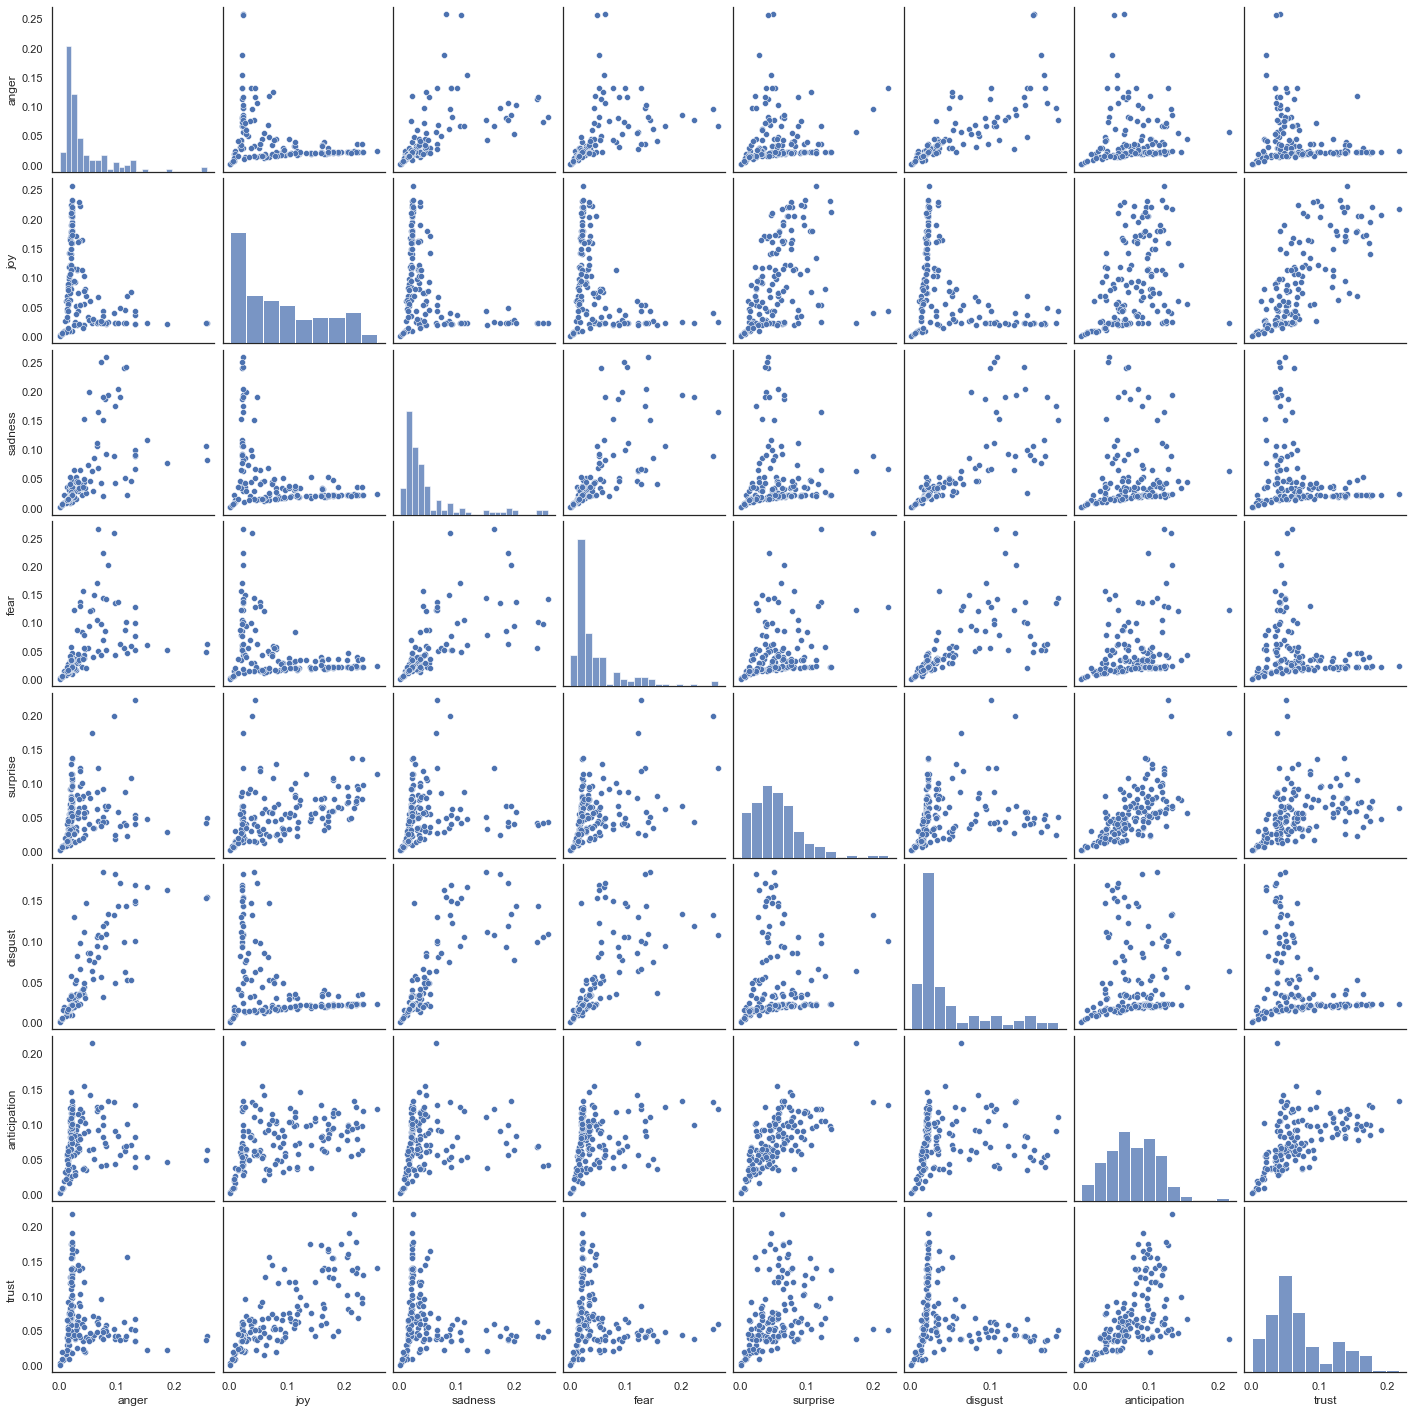

In [715]:
#Create plot to look at distribution of target variables as done previously- some are very skewed
#Same transformation happened in each subset- check one and it will the the same elsewhere
sns.pairplot(df_basiccomp[basic_emotions])

In [13]:
#Check which method to migitate skew works best for each basic emotion
#Goal is to find values as close to zero as possible

for emotion in basic_emotions:
    print(emotion.capitalize())
    print('Skew before transformation:', (df_basiccomp[emotion]).skew())
    print('Log transformation:', (np.log(df_basiccomp[emotion]).skew()))
    print('Square root transformation:', (np.sqrt(df_basiccomp[emotion]).skew()))
    print('Cube root transformation:', (np.cbrt(df_basiccomp[emotion]).skew()))
    print('Reciprocals transformation:', (np.reciprocal(df_basiccomp[emotion]).skew()))

Anger
Skew before transformation: 2.48800571752766
Log transformation: 0.6337013838763087
Square root transformation: 1.4252094877455859
Cube root transformation: 1.13571273345994
Reciprocals transformation: 0.4270201445908283
Joy
Skew before transformation: 0.5245132243273135
Log transformation: -0.7787352926443436
Square root transformation: -0.24814473113522573
Cube root transformation: -0.443923100362734
Reciprocals transformation: 1.5443774127068652
Sadness
Skew before transformation: 2.299284773142778
Log transformation: 0.4670551946287912
Square root transformation: 1.249016802876764
Cube root transformation: 0.962253838113544
Reciprocals transformation: 0.5759909637923849
Fear
Skew before transformation: 2.5933994571511194
Log transformation: 0.40757759385610237
Square root transformation: 1.2914784559886305
Cube root transformation: 0.958678615487883
Reciprocals transformation: 0.7168414066464287
Surprise
Skew before transformation: 2.9386391299012353
Log transformation: 0.153

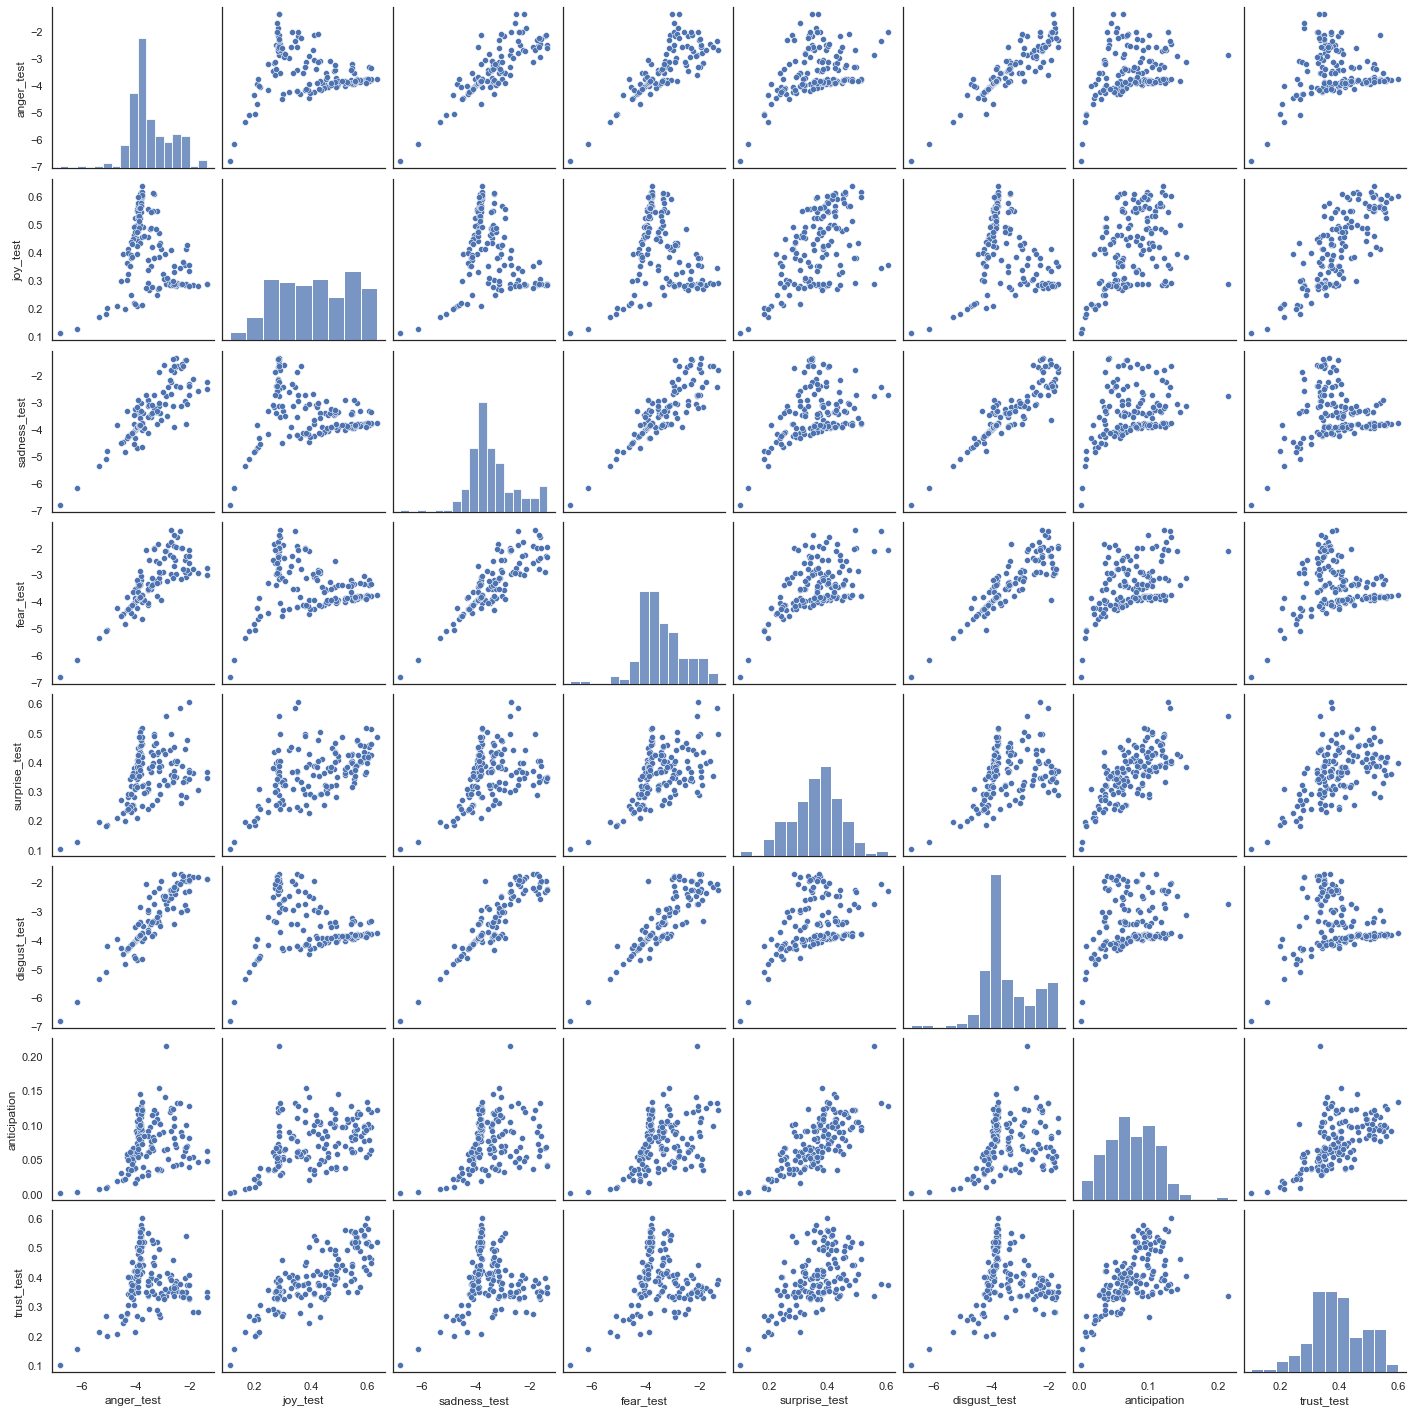

In [719]:
#Make the optimal transformation for each emotion and replot pairplot to see distribution

df_basiccomp['anger_test'] = np.log(df_basiccomp['anger'])
df_basiccomp['joy_test'] = np.cbrt(df_basiccomp['joy'])
df_basiccomp['sadness_test'] = np.log(df_basiccomp['sadness'])
df_basiccomp['fear_test'] = np.log(df_basiccomp['fear'])
df_basiccomp['surprise_test'] = np.cbrt(df_basiccomp['surprise'])
df_basiccomp['disgust_test'] = np.log(df_basiccomp['disgust'])
# Anticipation is best without a transformation
df_basiccomp['trust_test'] = np.cbrt(df_basiccomp['trust'])
                               
#Make a list to create pairplot
skew_pp = ['anger_test', 'joy_test', 'sadness_test', 'fear_test', 'surprise_test', 'disgust_test', 'anticipation',
           'trust_test']
                               
#Create plot
sns.pairplot(df_basiccomp[skew_pp])

In [720]:
#Repeat for other two datasets- transformation will have the same results 

#For df_binarycomp
df_binarycomp['anger_test'] = np.log(df_binarycomp['anger'])
df_binarycomp['joy_test'] = np.cbrt(df_binarycomp['joy'])
df_binarycomp['sadness_test'] = np.log(df_binarycomp['sadness'])
df_binarycomp['fear_test'] = np.log(df_binarycomp['fear'])
df_binarycomp['surprise_test'] = np.cbrt(df_binarycomp['surprise'])
df_binarycomp['disgust_test'] = np.log(df_binarycomp['disgust'])
# Anticipation is best without a transformation
df_binarycomp['trust_test'] = np.cbrt(df_binarycomp['trust'])

#For df_intcomp
df_intcomp['anger_test'] = np.log(df_intcomp['anger'])
df_intcomp['joy_test'] = np.cbrt(df_intcomp['joy'])
df_intcomp['sadness_test'] = np.log(df_intcomp['sadness'])
df_intcomp['fear_test'] = np.log(df_intcomp['fear'])
df_intcomp['surprise_test'] = np.cbrt(df_intcomp['surprise'])
df_intcomp['disgust_test'] = np.log(df_intcomp['disgust'])
# Anticipation is best without a transformation
df_intcomp['trust_test'] = np.cbrt(df_intcomp['trust'])

In [723]:
df_basiccomp.columns

Index(['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'Position', 'Unicode block', 'le_+',
       'le_-', 'le_0', 'sent_score', 'sent_score_class', 'upper_error_class',
       'lower_error_class', 'sent_polar', 'primary_basic_emot', 'total',
       'co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear',
       'co_sim_surprise', 'co_sim_disgust', 'co_sim_anticipation',
       'co_sim_trust', 'total_cosin_sim', 'dt_total', 'anger_test', 'joy_test',
       'sadness_test', 'fear_test', 'surprise_test', 'disgust_test',
       'trust_test'],
      dtype='object')

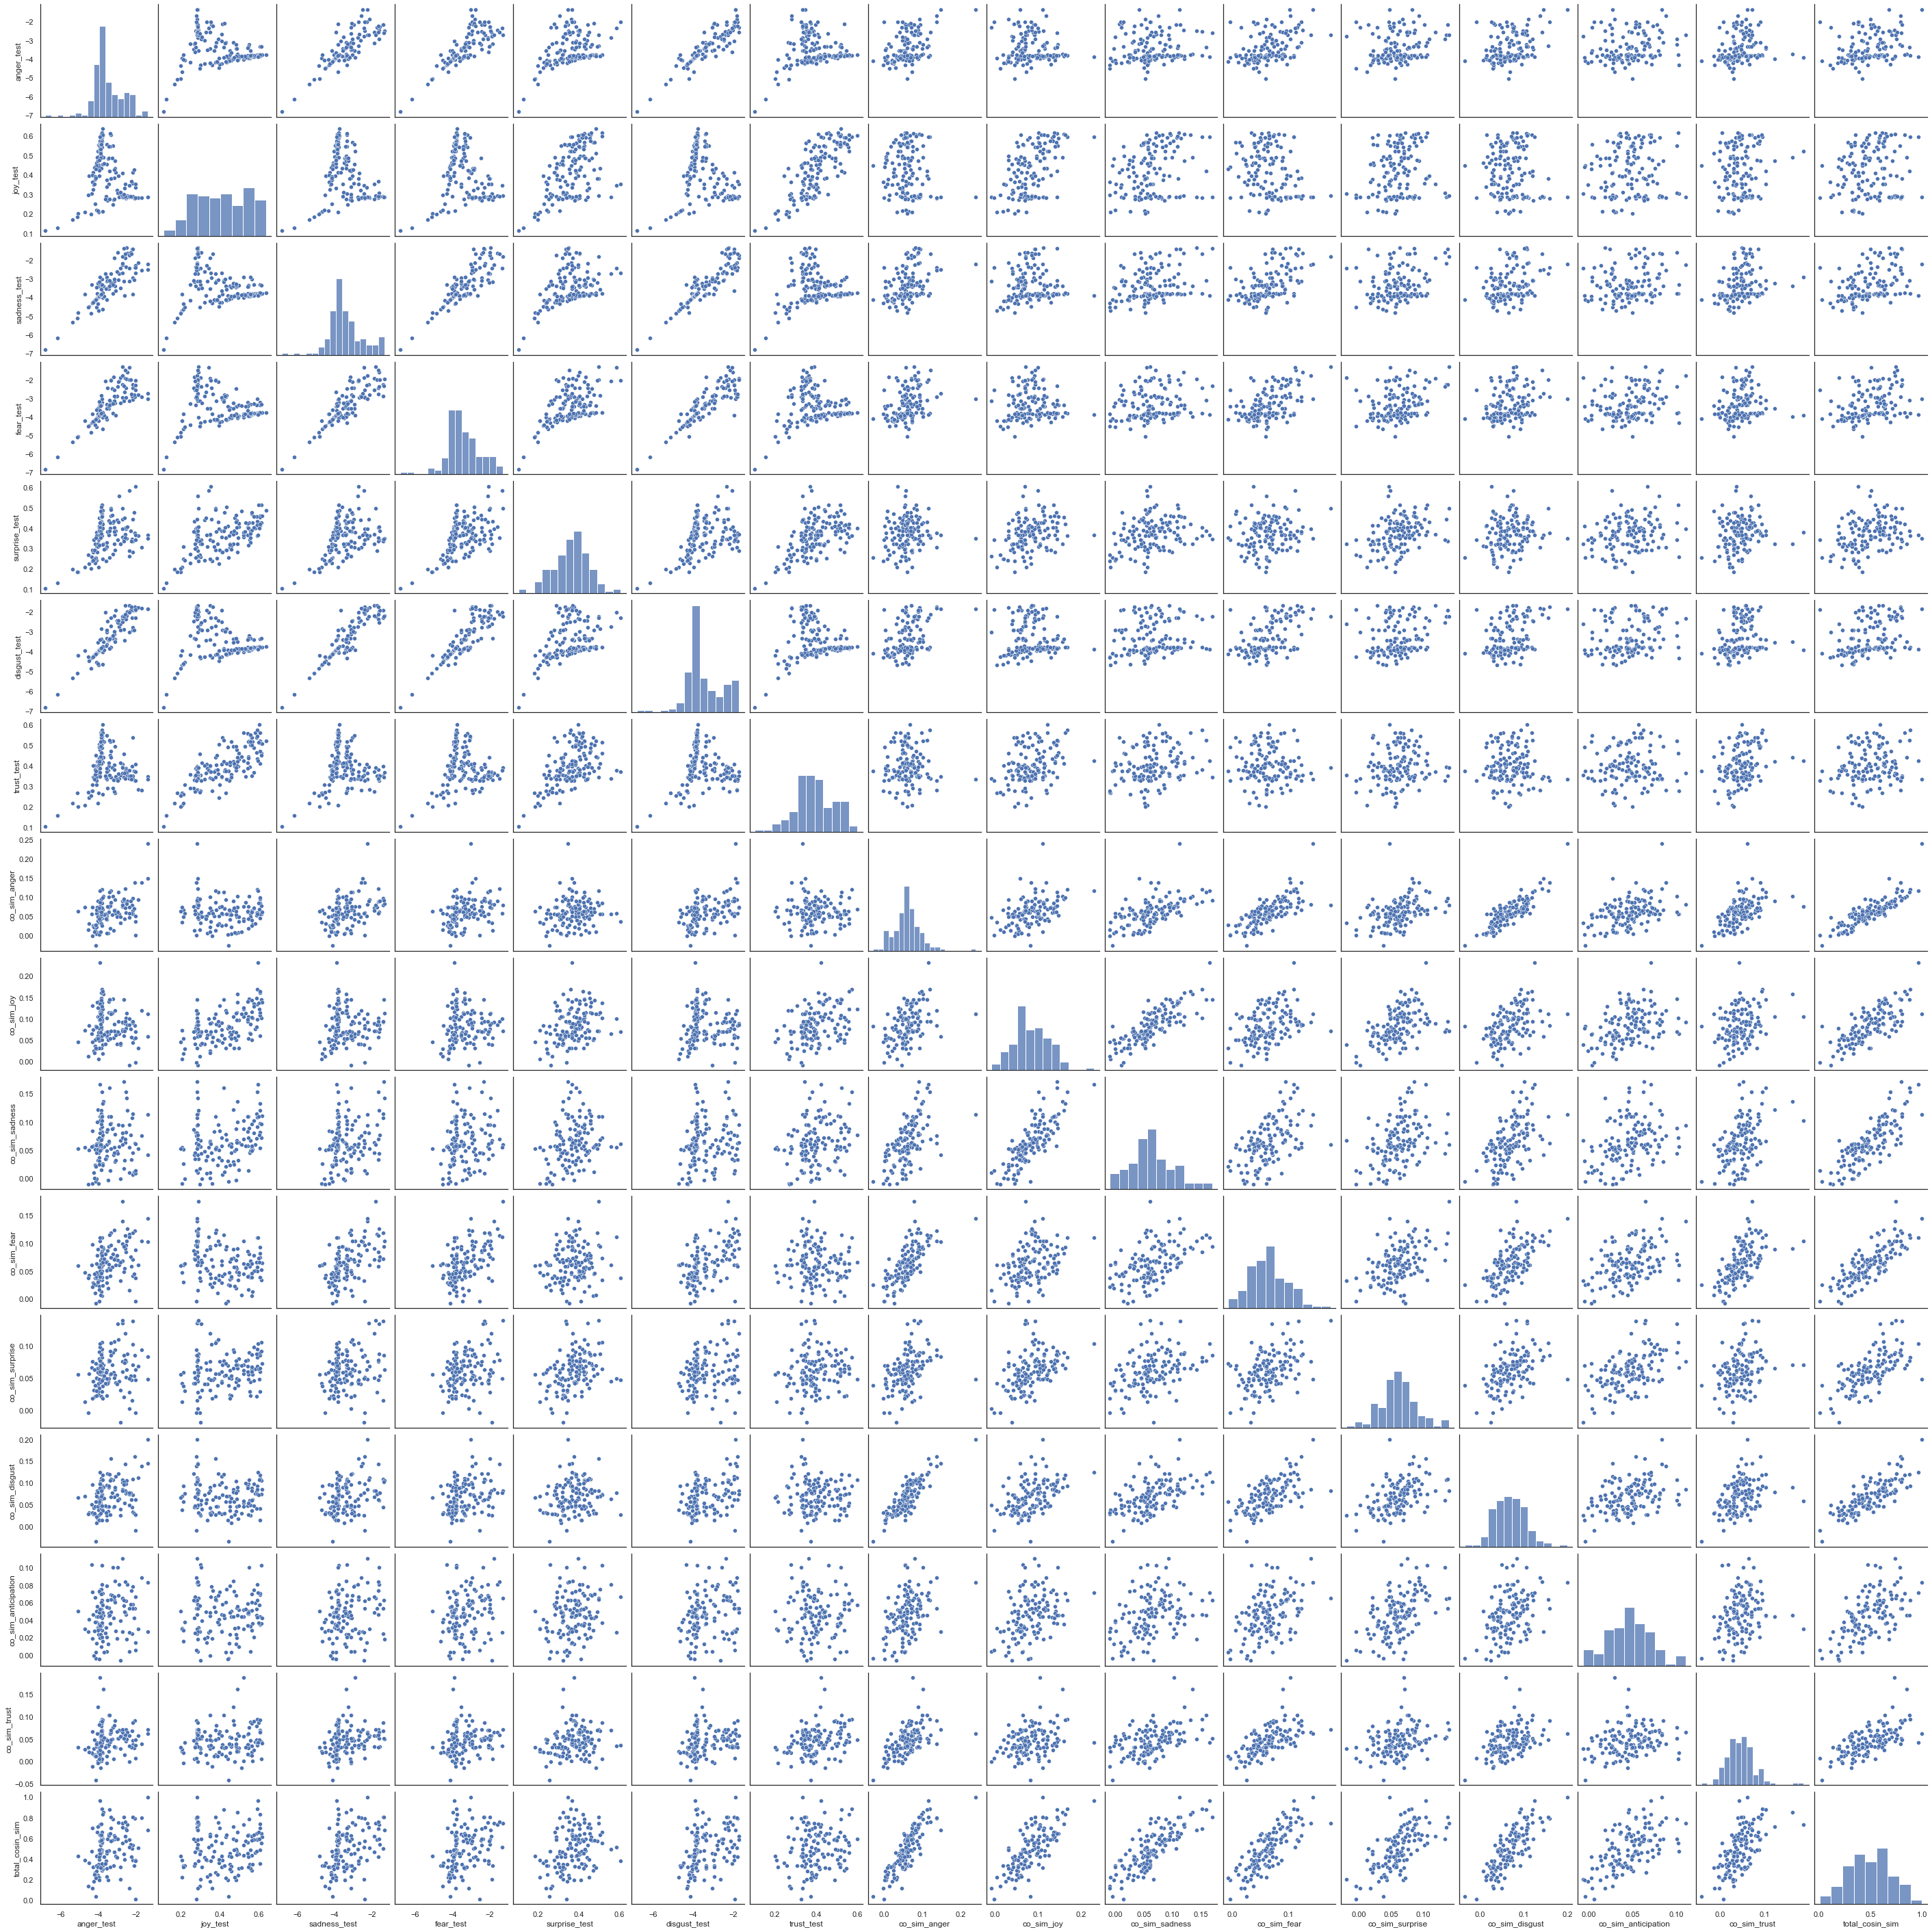

In [725]:
#Make another pairplot to look for correlation between parameters

#Define cols to include
pairplot_cols = ['anger_test', 'joy_test', 'sadness_test', 'fear_test', 'surprise_test', 'disgust_test', 
                 'trust_test', 'co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear', 'co_sim_surprise',
                 'co_sim_disgust', 'co_sim_anticipation', 'co_sim_trust', 'total_cosin_sim']

#Create plot
sns.pairplot(df_basiccomp[pairplot_cols])

The work carried out so far indicated that a multivariate regression would be the best option to predict emoji affinity to basic emotions with optimal results. While pearsons correlation plots did show that options explored do have correlation to their target values, there is also a relationship between the basic emotions themselves evident from the above pairplots. This is logical when context of the data is considered. For example- anger and disgust are more likely to be experienced together than disgust and joy. Multivariate regression will also consider their relationships to each other which is likely to improve outcomes and generate a more robust model.

Different feature extraction methods generated the most optimal outcome for each emotion, with the Pearsons Correlation values averaging to be very similar for all of the options which appeared at least once as the most highly correlated. Parameters generated in the df_intcomp df will be omitted from future work as they show no evidence of correlation to the target variables.

In [729]:
#Combine the datasets
df = pd.concat([df_binarycomp, df_basiccomp[['co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear', 'co_sim_surprise',
                                            'co_sim_disgust', 'co_sim_anticipation', 'co_sim_trust', 'total_cosin_sim']]], 
               axis=1)

#Check the transformation
df.columns

Index(['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'Position', 'Unicode block', 'le_+',
       'le_-', 'le_0', 'sent_score', 'sent_score_class', 'upper_error_class',
       'lower_error_class', 'sent_polar', 'primary_basic_emot',
       'top5_cosim_anger', 'top5_cosim_anticipation', 'top5_cosim_disgust',
       'top5_cosim_fear', 'top5_cosim_joy', 'top5_cosim_sadness',
       'top5_cosim_surprise', 'top5_cosim_trust', 'top10_cosim_anger',
       'top50_cosim_anger', 'top100_cosim_anger', 'top10_cosim_joy',
       'top50_cosim_joy', 'top100_cosim_joy', 'top10_cosim_sadness',
       'top50_cosim_sadness', 'top100_cosim_sadness', 'top10_cosim_fear',
       'top50_cosim_fear', 'top100_cosim_fear', 'top10_cosim_surprise',
       'top50_cosim_surprise', 'top100_cosim_surprise', 'top10_cosim_disgust',
       'top50_cosim_disgust', 'top100_cosim_disgust',
       'top10_cosim_anticipation', 'top50_cosim_anticipation',
       'top

In [732]:
#Define the columns to keep in the df
df = df[['unicode', 'emoji', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 
                 'Unicode block', 'top5_cosim_anger', 'top5_cosim_anticipation', 'top5_cosim_disgust', 'top5_cosim_fear', 
                 'top5_cosim_joy', 'top5_cosim_sadness', 'top5_cosim_surprise', 'top5_cosim_trust', 'top10_cosim_anger',         
                 'top50_cosim_anger', 'top100_cosim_anger', 'top10_cosim_joy','top50_cosim_joy', 'top100_cosim_joy',         
                 'top10_cosim_sadness', 'top50_cosim_sadness', 'top100_cosim_sadness', 'top10_cosim_fear',    
                 'top50_cosim_fear', 'top100_cosim_fear', 'top10_cosim_surprise','top50_cosim_surprise', 
                 'top100_cosim_surprise', 'top10_cosim_disgust','top50_cosim_disgust', 'top100_cosim_disgust',
                 'top10_cosim_anticipation', 'top50_cosim_anticipation','top100_cosim_anticipation', 'top10_cosim_trust', 
                 'top50_cosim_trust','top100_cosim_trust', 'anger_test', 'joy_test', 'sadness_test', 'fear_test',
                 'surprise_test', 'disgust_test', 'trust_test', 'co_sim_anger','co_sim_joy', 'co_sim_sadness', 'co_sim_fear', 
                 'co_sim_surprise','co_sim_disgust', 'co_sim_anticipation', 'co_sim_trust']]

df.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.020534      0.078030  0.020534  0.020534  0.162221   
1   1F319     🌙  0.015419      0.063219  0.015419  0.015419  0.053967   
2   1F31A     🌚  0.028610      0.032186  0.048279  0.028610  0.092982   
3   1F31E     🌞  0.019122      0.061191  0.019122  0.019122  0.168275   
4   1F31F     🌟  0.019370      0.073606  0.019370  0.019370  0.122031   

    sadness  surprise     trust  ... disgust_test  trust_test  co_sim_anger  \
0  0.032855  0.065710  0.088298  ...    -3.885657    0.445297      0.075534   
1  0.015419  0.024671  0.053967  ...    -4.172144    0.377899      0.011848   
2  0.051856  0.028610  0.037551  ...    -3.030751    0.334867      0.040312   
3  0.019122  0.040157  0.061191  ...    -3.956906    0.394060      0.041994   
4  0.019370  0.067795  0.079417  ...    -3.944030    0.429838      0.036120   

   co_sim_joy  co_sim_sadness  co_sim_fear  co_sim_surprise  co_sim_disgust  \
0    0.141277        0.109274     0.060353         0.059904        0.098202   
1    0.036187        0.051297     0.038135         0.021066        0.026564   
2    0.059421        0.060485     0.066988         0.062383        0.045676   
3    0.066952        0.045582     0.058051         0.028176        0.059400   
4    0.096829        0.063161     0.044155         0.080476        0.046690   

   co_sim_anticipation  co_sim_trust  
0             0.050392      0.036765  
1             0.065645      0.014955  
2             0.078947      0.036466  
3             0.032806      0.013764  
4             0.051480      0.029334  

[5 rows x 58 columns]

# Encoding unicode block

EDA has highlighted that within certain unicode blocks, specific characterisics are more or less common, therefore this infomation may aid in predictive models and thus this information must be encoded so it can be considered during machine learning. The nature of unicode block categories is that they have no inherent order (it is a nominal variable) therefore this must be reflected in the encoding method selected. One-Hot encoding is therefore an appropriate method to achieve this.

However this may not necessarily be an ideal method for such work as this significantly increases the dimensionality of the data and thus the use of this data may be revised depending on the relative effects of increased dimensionality compared to the information contained in the original column. This step is being performed so that as many options as possible are available during the model creation process, however it is likely that there will be significant dimensionality reduction. 

In [733]:
# Perform one-hot encoding on nominal variables
df = pd.get_dummies(df, columns=['Unicode block'])

#Verify transformation worked
df.columns.values.tolist()

['unicode',
 'emoji',
 'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'top5_cosim_anger',
 'top5_cosim_anticipation',
 'top5_cosim_disgust',
 'top5_cosim_fear',
 'top5_cosim_joy',
 'top5_cosim_sadness',
 'top5_cosim_surprise',
 'top5_cosim_trust',
 'top10_cosim_anger',
 'top50_cosim_anger',
 'top100_cosim_anger',
 'top10_cosim_joy',
 'top50_cosim_joy',
 'top100_cosim_joy',
 'top10_cosim_sadness',
 'top50_cosim_sadness',
 'top100_cosim_sadness',
 'top10_cosim_fear',
 'top50_cosim_fear',
 'top100_cosim_fear',
 'top10_cosim_surprise',
 'top50_cosim_surprise',
 'top100_cosim_surprise',
 'top10_cosim_disgust',
 'top50_cosim_disgust',
 'top100_cosim_disgust',
 'top10_cosim_anticipation',
 'top50_cosim_anticipation',
 'top100_cosim_anticipation',
 'top10_cosim_trust',
 'top50_cosim_trust',
 'top100_cosim_trust',
 'anger_test',
 'joy_test',
 'sadness_test',
 'fear_test',
 'surprise_test',
 'disgust_test',
 'trust_test',
 'co_sim_anger',
 'co_sim_joy'

# Preparation for machine learning- Null values

In [739]:
# Display all columns and their null value count
pd.set_option('display.max_rows', None)
null_value_counts = df.isnull().sum()
print(null_value_counts)

unicode                                                 0
emoji                                                   0
anger                                                   0
anticipation                                            0
disgust                                                 0
fear                                                    0
joy                                                     0
sadness                                                 0
surprise                                                0
trust                                                   0
top5_cosim_anger                                       17
top5_cosim_anticipation                                17
top5_cosim_disgust                                     17
top5_cosim_fear                                        17
top5_cosim_joy                                         17
top5_cosim_sadness                                     17
top5_cosim_surprise                                    17
top5_cosim_tru

In [741]:
#Drop columns with null values
df.dropna(inplace=True)
pd.set_option('display.max_rows', None)
null_value_counts = df.isnull().sum()
print(null_value_counts)

unicode                                                0
emoji                                                  0
anger                                                  0
anticipation                                           0
disgust                                                0
fear                                                   0
joy                                                    0
sadness                                                0
surprise                                               0
trust                                                  0
top5_cosim_anger                                       0
top5_cosim_anticipation                                0
top5_cosim_disgust                                     0
top5_cosim_fear                                        0
top5_cosim_joy                                         0
top5_cosim_sadness                                     0
top5_cosim_surprise                                    0
top5_cosim_trust               

# Initial Evaluation of Multivariate Regression Options

In [746]:
#Generate several iterations of input parameters to try

#Everything except target variables
X1 = df.drop(columns=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'unicode', 'emoji',
                      'anger_test', 'joy_test', 'sadness_test', 'fear_test', 'surprise_test', 'disgust_test', 'trust_test'])

#Excluding unicode block also
X2 = df.drop(columns=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'unicode', 'emoji',
                      'anger_test', 'joy_test', 'sadness_test', 'fear_test', 'surprise_test', 'disgust_test', 'trust_test',
                      'Unicode block_Arrows', 'Unicode block_Dingbats', 'Unicode block_Emoticons',
                      'Unicode block_Geometric Shapes', 'Unicode block_Miscellaneous Symbols',
                      'Unicode block_Miscellaneous Symbols and Arrows', 'Unicode block_Miscellaneous Symbols and Pictographs'])

#Using only the basiccomp data
X3 = df[['co_sim_anger', 'co_sim_joy', 'co_sim_sadness', 'co_sim_fear', 'co_sim_surprise', 'co_sim_disgust', 
        'co_sim_anticipation', 'co_sim_trust']]

#Using all binarycomp data
X4 = df[['top5_cosim_anger', 'top5_cosim_anticipation', 'top5_cosim_disgust', 'top5_cosim_fear', 'top5_cosim_joy', 
        'top5_cosim_sadness', 'top5_cosim_surprise','top5_cosim_trust', 'top10_cosim_anger', 'top50_cosim_anger',
        'top100_cosim_anger', 'top10_cosim_joy', 'top50_cosim_joy','top100_cosim_joy', 'top10_cosim_sadness', 
        'top50_cosim_sadness','top100_cosim_sadness', 'top10_cosim_fear', 'top50_cosim_fear','top100_cosim_fear', 
        'top10_cosim_surprise', 'top50_cosim_surprise','top100_cosim_surprise', 'top10_cosim_disgust', 'top50_cosim_disgust',
        'top100_cosim_disgust', 'top10_cosim_anticipation','top50_cosim_anticipation', 'top100_cosim_anticipation',
        'top10_cosim_trust', 'top50_cosim_trust', 'top100_cosim_trust']]

#Using k=5 binarycomp data
X5 = df[['top5_cosim_anger', 'top5_cosim_anticipation', 'top5_cosim_disgust', 'top5_cosim_fear', 'top5_cosim_joy', 
        'top5_cosim_sadness', 'top5_cosim_surprise','top5_cosim_trust']]

#Using k=10 binarycomp data
X6 = df[['top10_cosim_anger', 'top10_cosim_anticipation', 'top10_cosim_disgust', 'top10_cosim_fear', 'top10_cosim_joy', 
        'top10_cosim_sadness', 'top10_cosim_surprise','top10_cosim_trust']]

#Using k=50 binarycomp data
X5 = df[['top50_cosim_anger', 'top50_cosim_anticipation', 'top50_cosim_disgust', 'top50_cosim_fear', 'top50_cosim_joy', 
        'top50_cosim_sadness', 'top50_cosim_surprise','top50_cosim_trust']]

#Using k=100 binarycomp data
X6 = df[['top100_cosim_anger', 'top100_cosim_anticipation', 'top100_cosim_disgust', 'top100_cosim_fear', 'top100_cosim_joy', 
        'top100_cosim_sadness', 'top100_cosim_surprise','top100_cosim_trust']]

In [832]:
#Generate several iterations of target varibales to try

#Using the values where skew was mitigated
Y1 = df[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]

#Using values where skew was not mitigated
Y2 = df[['anger_test', 'joy_test', 'sadness_test', 'fear_test', 'surprise_test', 'disgust_test', 'trust_test']]

#Y1 but with binning of values steps of 0.05
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
bins = [x / 100 for x in range(0, 101, 5)]
def bin_emotions(emotion_values):
    return pd.cut(emotion_values, bins=bins, labels=bins[:-1]).astype(float)
Y3 = df[emotions].apply(bin_emotions)

In [777]:
#Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2)

In [851]:
#Importing libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_predict

In [779]:
#Create a function to evaluate the regressor and its parameters
def evaluate(reg_cls, params=None):
    reg=reg_cls()
    if params:
        reg=GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train, Y_train)
    pred=reg.predict(X_test)

    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print('Mean Absolute Error:', mae(Y_test, pred), 'Mean Squared Error:', mean_squared_error(Y_test, pred),
          'R-squared score:', r2_score(Y_test, pred))

    return reg, pred

In [780]:
#Print header for results
print('Results for initial test:')

#Apply the function to the models
lr_reg,pred_lr = evaluate(LinearRegression)
rg_reg,pred_rg = evaluate(Ridge)
ls_reg,pred_ls = evaluate(Lasso)
rf_reg,pred_rf = evaluate(RandomForestRegressor)
xg_reg,pred_xg = evaluate(XGBRegressor)

#Define parameters
params={"n_estimators":[100*i for i in range(1, 6)]}

Results for initial test:
Mean Absolute Error: 0.03755424236842539 Mean Squared Error: 0.002395977831308747 R-squared score: -0.172109981013071
Mean Absolute Error: 0.034518444490267045 Mean Squared Error: 0.0021034157351678714 R-squared score: -0.005147711020094439
Mean Absolute Error: 0.03720182843838443 Mean Squared Error: 0.0022916252596569655 R-squared score: -0.07156567912578307
Mean Absolute Error: 0.029561725720275378 Mean Squared Error: 0.001767384285501604 R-squared score: 0.1185142991201433
Mean Absolute Error: 0.030589788063011426 Mean Squared Error: 0.0019607786737193935 R-squared score: 0.02523825671280598


In [795]:
#Redefine the input/target variables to find best results 

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y1, test_size=0.2)

#Print header for results
print('Best Initial Results:')

#Apply the function to the models
lr_reg,pred_lr = evaluate(LinearRegression)
rg_reg,pred_rg = evaluate(Ridge)
ls_reg,pred_ls = evaluate(Lasso)
rf_reg,pred_rf = evaluate(RandomForestRegressor)
xg_reg,pred_xg = evaluate(XGBRegressor)

#Define parameters
params={"n_estimators":[100*i for i in range(1, 6)]}

Best Initial Results:
Mean Absolute Error: 0.02528407890741122 Mean Squared Error: 0.0011480533913995235 R-squared score: 0.24120034470282664
Mean Absolute Error: 0.03294260874120625 Mean Squared Error: 0.0017808336862231383 R-squared score: 0.022973522373895466
Mean Absolute Error: 0.03439736243436333 Mean Squared Error: 0.0019220218775231953 R-squared score: -0.03451108178873272
Mean Absolute Error: 0.025064961542615734 Mean Squared Error: 0.0013527182408367045 R-squared score: 0.16318570992939618
Mean Absolute Error: 0.026249193120452614 Mean Squared Error: 0.0014104145363764064 R-squared score: 0.07536106731479154


In [813]:
#Play with hyperparam tuning in models where an ok r2 value was obtained above- all need significant improvement though
#Keep some of the better options

#Define the hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]}

#Create the Linear Regression model
model = LinearRegression()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print metrics for the best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Mean Absolute Error (MAE): 0.025284078907411217
Mean Squared Error (MSE): 0.001148053391399523
R-squared (R2) score: 0.24120034470282692


In [809]:
#Play with hyperparam tuning in models where an ok r2 value was obtained above- all need significant improvement though
#Keep some of the better options

#Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]}

#Create the model
model = RandomForestRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters and the corresponding performance
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#Print metrics for best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 10}
Mean Absolute Error (MAE): 0.027388665397703973
Mean Squared Error (MSE): 0.0014141396896736262
R-squared (R2) score: 0.1101656812019317


In [812]:
#Play with hyperparam tuning in models where an ok r2 value was obtained above- all need significant improvement though
#Keep some of the better options

#Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]}

#Create the model
model = XGBRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#Print metrics for best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Absolute Error (MAE): 0.024683486320356975
Mean Squared Error (MSE): 0.0011608338964715899
R-squared (R2) score: 0.1973892845409621


In [833]:
#Check if binning improves the outcomes

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size=0.2)

#Define the hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]}

#Create the Linear Regression model
model = LinearRegression()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print metrics for the best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Mean Absolute Error (MAE): 0.030635061664016083
Mean Squared Error (MSE): 0.0017555447208878526
R-squared (R2) score: 0.18838770447346728


In [834]:
#Check if binning improves the outcomes

#Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]}

#Create the model
model = RandomForestRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters and the corresponding performance
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#Print metrics for best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Mean Absolute Error (MAE): 0.032999783871703645
Mean Squared Error (MSE): 0.0021138700662544307
R-squared (R2) score: 0.1053318082244842


In [835]:
#Check if binning improves the outcomes

#Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]}

# Create the model
model = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)


# Print metrics for the best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Absolute Error (MAE): 0.033497124740474477
Mean Squared Error (MSE): 0.0020862541989210724
R-squared (R2) score: 0.04388998501852988


In [842]:
#Try support vector regression- does not consider every emotion in the context of each other (maybe this is something to look into)
#SVR does not handle multivariate regression

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y1, test_size=0.2)

# Define the hyperparameter grid
param_grid = {
    'estimator__C': [0.1, 1.0, 10.0],
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__gamma': ['scale', 'auto', 0.1, 0.01],
    'estimator__epsilon': [0.1, 0.2, 0.3]}

#Create the model
base_model = SVR()

#Create the multi-output SVR model
model = MultiOutputRegressor(base_model)

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the MAE, MSE, and R-squared for each target variable
mae_scores = mae(Y_test, y_pred, multioutput='raw_values')
mse_scores = mse(Y_test, y_pred, multioutput='raw_values')
r2_scores = r2_score(Y_test, y_pred, multioutput='raw_values')

# Print metrics for each target variable
for i, emotion in enumerate(emotions):
    print("Emotion:", emotion)
    print("Mean Absolute Error (MAE):", mae_scores[i])
    print("Mean Squared Error (MSE):", mse_scores[i])
    print("R-squared (R2) score:", r2_scores[i])
    print()

Best Hyperparameters: {'estimator__C': 10.0, 'estimator__epsilon': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Emotion: anger
Mean Absolute Error (MAE): 0.059786708312945996
Mean Squared Error (MSE): 0.004374699549828521
R-squared (R2) score: -2.004062444715392

Emotion: anticipation
Mean Absolute Error (MAE): 0.04028758489141011
Mean Squared Error (MSE): 0.0024904793886644325
R-squared (R2) score: -1.2948919645740462

Emotion: disgust
Mean Absolute Error (MAE): 0.05901922833334988
Mean Squared Error (MSE): 0.00418330662957147
R-squared (R2) score: -0.5974607200278266

Emotion: fear
Mean Absolute Error (MAE): 0.06605424042657398
Mean Squared Error (MSE): 0.005102505190205566
R-squared (R2) score: -0.23005025312897298

Emotion: joy
Mean Absolute Error (MAE): 0.06242318087872966
Mean Squared Error (MSE): 0.004784787785585735
R-squared (R2) score: -0.054730754102892076

Emotion: sadness
Mean Absolute Error (MAE): 0.06896834595562568
Mean Squared Error (MSE): 0.0054454

In [846]:
#Try a Gaussian Process Regression model

#Define the hyperparameter grid for the kernel
param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * RBF(length_scale=0.1)],
    'alpha': [1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2],
    'n_restarts_optimizer': [0, 1, 5, 10]}
    
#Create the Gaussian Process Regressor
model = GaussianProcessRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred, y_std = best_model.predict(X_test, return_std=True)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#Print metrics for the best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'alpha': 0.001, 'kernel': 1**2 * RBF(length_scale=0.1), 'n_restarts_optimizer': 0}
Mean Absolute Error (MAE): 0.029620621173186153
Mean Squared Error (MSE): 0.0016444673318980383
R-squared (R2) score: 0.312151587315505


In [850]:
#Try a KNN model

#Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],       
    'weights': ['uniform', 'distance'],
    'p': [1, 2],                   
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size': [10, 20, 30, 40],   
    'metric': ['euclidean', 'manhattan', 'minkowski']}

#Create the KNN Regressor
model = KNeighborsRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Evaluate the model using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared
mae_score = mae(Y_test, y_pred)
mse_score = mse(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#Print metrics for the best model
print("Mean Absolute Error (MAE):", mae_score)
print("Mean Squared Error (MSE):", mse_score)
print("R-squared (R2) score:", r2)

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Mean Absolute Error (MAE): 0.03187610023808515
Mean Squared Error (MSE): 0.0020574546009304523
R-squared (R2) score: 0.17527339282221643


In [861]:
#Try univariate regression using the Gaussian Process regression model- and more detail on performance

#Define the hyperparameter grid
param_grid = {
    'kernel': [1**2 * RBF(length_scale=0.1), 1**2 * RBF(length_scale=1.0)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'n_restarts_optimizer': [0, 1, 2]
}

#Create the Gaussian Process Regression model
gpr_model = GaussianProcessRegressor()

#Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gpr_model, param_grid=param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train, Y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print()

#Evaluate the model using the best hyperparameters
best_gpr_model = grid_search.best_estimator_
y_pred = best_gpr_model.predict(X_test)

#Calculate and print the MAE, MSE, and R-squared for each target variable
mae_scores = mae(Y_test, y_pred, multioutput='raw_values')
mse_scores = mse(Y_test, y_pred, multioutput='raw_values')
r2_scores = r2_score(Y_test, y_pred, multioutput='raw_values')
#Make parameters to check how far off values are in each case
percentage_error = abs(y_pred - Y_test) / Y_test
percentage_correct_2 = (percentage_error <= 0.02).mean(axis=0) * 100
percentage_correct_5 = (percentage_error <= 0.05).mean(axis=0) * 100
percentage_correct_10 = (percentage_error <= 0.1).mean(axis=0) * 100
percentage_correct_20 = (percentage_error <= 0.2).mean(axis=0) * 100

#Print metrics for each target variable
for i, emotion in enumerate(emotions):
    print("Emotion:", emotion)
    print("Mean Absolute Error (MAE):", mae_scores[i])
    print("Mean Squared Error (MSE):", mse_scores[i])
    print("R-squared (R2) score:", r2_scores[i])
    print('Percentage of Correct Predictions (within 2%): {:.2f}%'.format(percentage_correct_2[i]))
    print('Percentage of Correct Predictions (within 5%): {:.2f}%'.format(percentage_correct_5[i]))
    print('Percentage of Correct Predictions (within 10%): {:.2f}%'.format(percentage_correct_10[i]))
    print('Percentage of Correct Predictions (within 20%): {:.2f}%'.format(percentage_correct_20[i]))
    print()

Best Hyperparameters: {'alpha': 0.001, 'kernel': 1**2 * RBF(length_scale=0.1), 'n_restarts_optimizer': 1}

Emotion: anger
Mean Absolute Error (MAE): 0.02457083919635507
Mean Squared Error (MSE): 0.0010366562293436055
R-squared (R2) score: 0.2881385313024615
Percentage of Correct Predictions (within 2%): 3.70%
Percentage of Correct Predictions (within 5%): 7.41%
Percentage of Correct Predictions (within 10%): 18.52%
Percentage of Correct Predictions (within 20%): 18.52%

Emotion: anticipation
Mean Absolute Error (MAE): 0.02583514753510338
Mean Squared Error (MSE): 0.0009718052962048902
R-squared (R2) score: 0.10451450610595725
Percentage of Correct Predictions (within 2%): 3.70%
Percentage of Correct Predictions (within 5%): 7.41%
Percentage of Correct Predictions (within 10%): 14.81%
Percentage of Correct Predictions (within 20%): 37.04%

Emotion: disgust
Mean Absolute Error (MAE): 0.02987446366307466
Mean Squared Error (MSE): 0.0015046166119804926
R-squared (R2) score: 0.4254387380189

# Preparation to evaluate Neural Networks- Emoji Embeddings Dictionary

The previous models did not provide sufficient results therefore the search for a potential model to use for prediction will expand to consider neural networks. Neural networks are more complex models which can capture more subtle relationships and patterns in the data and therefore may have improved outcomes for this purpose.

In [862]:
#Create an embedding dictionary
embeddings_dictionary = dict()

#Iterate through each row in the dataset
for index, row in df_le01.iterrows():
    emoji = row['emoji']

    #Check if the emoji exists in the KeyedVectors object
    if emoji in emoji2vec.key_to_index:
        vector_dimensions = emoji2vec.get_vector(emoji)
        embeddings_dictionary[emoji] = vector_dimensions

In [864]:
#Determine the number of unique emojis in the dataset at present
vocab_length = len(df['emoji'].unique())
print(vocab_length)

132


In [865]:
#Create the embeddings matrix with all zeros
embedding_matrix = np.zeros((vocab_length, 300))
embedding_matrix.shape

(132, 300)

In [866]:
#Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

In [867]:
#Loop through each row to populate data for each unique emoji into the embedding
for i, row in df.iterrows():
    emoji = row['emoji']
    if emoji in embeddings_dictionary:
        vector_dimensions = np.asarray(embeddings_dictionary[emoji], dtype="float32")
        embedding_matrix[i] = vector_dimensions

In [869]:
#Define a function to map the embedding from the dictionary onto the emoji, otherwise use an empty vector
def map_emoji_to_embedding(emoji):
    if emoji in embeddings_dictionary:
        return embeddings_dictionary[emoji]
    else:
        return np.zeros(300)

#Apply the function
df['emoji_embedding'] = df['emoji'].apply(map_emoji_to_embedding)
df.head()

unicode emoji     anger  anticipation   disgust      fear       joy  \
0   1F308     🌈  0.020534      0.078030  0.020534  0.020534  0.162221   
1   1F319     🌙  0.015419      0.063219  0.015419  0.015419  0.053967   
2   1F31A     🌚  0.028610      0.032186  0.048279  0.028610  0.092982   
3   1F31E     🌞  0.019122      0.061191  0.019122  0.019122  0.168275   
4   1F31F     🌟  0.019370      0.073606  0.019370  0.019370  0.122031   

    sadness  surprise     trust  top5_cosim_anger  top5_cosim_anticipation  \
0  0.032855  0.065710  0.088298          0.078591                 0.067994   
1  0.015419  0.024671  0.053967          0.007602                 0.058970   
2  0.051856  0.028610  0.037551          0.029508                 0.082183   
3  0.019122  0.040157  0.061191          0.037913                 0.062884   
4  0.019370  0.067795  0.079417          0.042976                 0.063950   

   top5_cosim_disgust  top5_cosim_fear  top5_cosim_joy  top5_cosim_sadness  \
0            0.090723         0.062761        0.113989            0.097312   
1            0.021683         0.051431        0.049666            0.042648   
2            0.041805         0.071532        0.075325            0.050265   
3            0.055835         0.059046        0.071066            0.048342   
4            0.041101         0.054588        0.096690            0.052397   

   top5_cosim_surprise  top5_cosim_trust  top10_cosim_anger  \
0             0.063183          0.083803           0.087761   
1             0.041461          0.009179           0.015611   
2             0.068159          0.029534           0.036966   
3             0.047300          0.012675           0.046687   
4             0.069701          0.051169           0.049745   

   top50_cosim_anger  top100_cosim_anger  top10_cosim_joy  top50_cosim_joy  \
0           0.090016            0.091942         0.114605         0.121408   
1           0.018822            0.024266         0.047390         0.050315   
2           0.041395            0.046255         0.063916         0.067979   
3           0.049364            0.051948         0.062000         0.068950   
4           0.052274            0.052777         0.087398         0.091407   

   top100_cosim_joy  top10_cosim_sadness  top50_cosim_sadness  \
0          0.118693             0.102195             0.097518   
1          0.052579             0.045150             0.046270   
2          0.073675             0.056316             0.057884   
3          0.074246             0.053239             0.061221   
4          0.098538             0.070785             0.066809   

   top100_cosim_sadness  top10_cosim_fear  top50_cosim_fear  \
0              0.095379          0.066631          0.074363   
1              0.044239          0.042080          0.037542   
2              0.059940          0.062765          0.061718   
3              0.063308          0.049923          0.057188   
4              0.066267          0.049222          0.055382   

   top100_cosim_fear  top10_cosim_surprise  top50_cosim_surprise  \
0           0.080717              0.068180              0.075456   
1           0.039196              0.040582              0.043773   
2           0.064314              0.068435              0.072654   
3           0.061557              0.056505              0.059647   
4           0.058148              0.065505              0.081621   

   top100_cosim_surprise  top10_cosim_disgust  top50_cosim_disgust  \
0               0.080078             0.090991             0.094746   
1               0.045318             0.017037             0.027058   
2               0.075788             0.039109             0.051072   
3               0.060628             0.044184             0.057535   
4               0.084418             0.045731             0.056961   

   top100_cosim_disgust  top10_cosim_anticipation  top50_cosim_anticipation  \
0              0.098128                  0.058930                  0.064232   
1              0.03

In [870]:
#Convert emoji embeddings to numpy arrays
df['emoji_embedding'] = np.array(df['emoji_embedding'].tolist())

# Initial Evaluation of Neural Networks- Univariate

In [943]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Flatten, Dropout, LSTM, Activation, Conv1D, MaxPooling1D, Conv2D
from keras.layers import MaxPooling2D, Reshape, BatchNormalization, GlobalMaxPooling1D, Attention, Layer
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit
from sklearn.metrics import mean_absolute_error
from keras import backend as K
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
import time as time_module
import kerastuner as kt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [947]:
#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y1['anger'], test_size=0.2)

In [952]:
#Define the custom evaluation metrics

#r2 score
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Define Mean Absolute Percentage Error (MAPE) loss function
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

#Within 2%
def accuracy_within_2_percent(y_true, y_pred):
    #Calculate the percentage difference between true and predicted values
    percentage_difference = tf.abs((y_true - y_pred) / y_true) * 100.0

    #Check if the percentage difference is within 5%
    within_2_percent = tf.less_equal(percentage_difference, 2.0)

    #Calculate the mean accuracy within 5%
    mean_accuracy_within_2_percent = tf.reduce_mean(tf.cast(within_2_percent, tf.float32))
    return mean_accuracy_within_2_percent

#Repeat for a % difference within 5%
def accuracy_within_5_percent(y_true, y_pred):
    percentage_difference = tf.abs((y_true - y_pred) / y_true) * 100.0
    within_5_percent = tf.less_equal(percentage_difference, 5.0)
    mean_accuracy_within_5_percent = tf.reduce_mean(tf.cast(within_5_percent, tf.float32))
    return mean_accuracy_within_5_percent

#Repeat for a % difference within 10%
def accuracy_within_10_percent(y_true, y_pred):
    percentage_difference = tf.abs((y_true - y_pred) / y_true) * 100.0
    within_10_percent = tf.less_equal(percentage_difference, 10.0)
    mean_accuracy_within_10_percent = tf.reduce_mean(tf.cast(within_10_percent, tf.float32))
    return mean_accuracy_within_10_percent

In [922]:
#Start with a basic feedforward neural network

#Create a feedforward neural network architecture
model = Sequential()

#Input Layer
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

#Hidden Layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#The Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Compile the network
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               1152      
                                                                 
 dense_38 (Dense)            (None, 256)               33024     
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [924]:
#Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
3/3 [==============================] - 2s 149ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_squared_error: 0.0033 - r2_score: -0.9567 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2429
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0020 - r2_score: -0.5560 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0546
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_squared_error: 0.0019 - r2_score: -0.1737 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1321
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_squared_error: 0.0020 - r2_score: -0.0918 - val_loss: 0.0310 - val_mean_absolute

3/3 [==============================] - 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_squared_error: 0.0015 - r2_score: 0.1406 - val_loss: 0.0253 - val_mean_absolute_error: 0.0253 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1510
Epoch 32/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_squared_error: 0.0014 - r2_score: 0.2817 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0676
Epoch 33/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_squared_error: 0.0017 - r2_score: 0.0016 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1850
Epoch 34/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0017 - r2_score: -0.0045 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260

Epoch 62/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_squared_error: 0.0012 - r2_score: 0.2340 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1715
Epoch 63/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_squared_error: 0.0012 - r2_score: 0.3336 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0013 - val_r2_score: 0.2157
Epoch 64/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_squared_error: 0.0012 - r2_score: 0.3067 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1975
Epoch 65/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_squared_error: 0.0010 - r2_score: 0.3477 - val_loss: 0.0241 - val_mean_absolute_er

3/3 [==============================] - 0s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_squared_error: 8.3534e-04 - r2_score: 0.5299 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0357
Epoch 93/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_squared_error: 9.9905e-04 - r2_score: 0.3611 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0596
Epoch 94/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_squared_error: 0.0010 - r2_score: 0.3504 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0011 - val_r2_score: 0.3186
Epoch 95/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_squared_error: 6.8600e-04 - r2_score: 0.5228 - val_loss: 0.0248 - val_mean_absolute_er

3/3 [==============================] - 0s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_squared_error: 7.0857e-04 - r2_score: 0.4967 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0012 - val_r2_score: 0.2364
Epoch 123/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_squared_error: 6.9026e-04 - r2_score: 0.5240 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1421
Epoch 124/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_squared_error: 7.0507e-04 - r2_score: 0.6297 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1175
Epoch 125/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_squared_error: 6.7250e-04 - r2_score: 0.5048 - val_loss: 0.0248 - val_mean_absol

3/3 [==============================] - 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_squared_error: 5.2923e-04 - r2_score: 0.6040 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0409
Epoch 153/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_squared_error: 6.0414e-04 - r2_score: 0.6518 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1717
Epoch 154/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_squared_error: 4.7613e-04 - r2_score: 0.6335 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1734
Epoch 155/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_squared_error: 4.1656e-04 - r2_score: 0.6932 - val_loss: 0.0249 - val_mean_absol

3/3 [==============================] - 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_squared_error: 3.0021e-04 - r2_score: 0.7849 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0787
Epoch 183/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_squared_error: 2.9050e-04 - r2_score: 0.8375 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0604
Epoch 184/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_squared_error: 3.1222e-04 - r2_score: 0.8130 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0019
Epoch 185/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_squared_error: 2.7641e-04 - r2_score: 0.8001 - val_loss: 0.0307 - val_mean_abs

3/3 [==============================] - 0s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_squared_error: 2.3701e-04 - r2_score: 0.8684 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0863
Epoch 213/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_squared_error: 2.5425e-04 - r2_score: 0.8170 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0118
Epoch 214/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_squared_error: 2.4138e-04 - r2_score: 0.8036 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0356
Epoch 215/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_squared_error: 3.1178e-04 - r2_score: 0.8078 - val_loss: 0.0291 - val_mean_abs

3/3 [==============================] - 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_squared_error: 2.6747e-04 - r2_score: 0.8326 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0700
Epoch 243/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_squared_error: 2.2252e-04 - r2_score: 0.8569 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1021
Epoch 244/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_squared_error: 2.4526e-04 - r2_score: 0.8438 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0422
Epoch 245/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_squared_error: 2.4175e-04 - r2_score: 0.8222 - val_loss: 0.0307 - val_mean_ab

3/3 [==============================] - 0s 17ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_squared_error: 2.1659e-04 - r2_score: 0.8415 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0810
Epoch 273/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_squared_error: 1.9104e-04 - r2_score: 0.8409 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0696
Epoch 274/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_squared_error: 1.7985e-04 - r2_score: 0.9064 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301 - val_mean_squared_error: 0.0016 - val_r2_score: -8.9121e-04
Epoch 275/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_squared_error: 1.9448e-04 - r2_score: 0.8679 - val_loss: 0.0317 - val_mean_

3/3 [==============================] - 0s 16ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_squared_error: 1.6775e-04 - r2_score: 0.8768 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0186
Epoch 303/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_squared_error: 1.3796e-04 - r2_score: 0.9287 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0071
Epoch 304/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_squared_error: 1.9130e-04 - r2_score: 0.8738 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321 - val_mean_squared_error: 0.0018 - val_r2_score: -0.0933
Epoch 305/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_squared_error: 1.4496e-04 - r2_score: 0.8770 - val_loss: 0.0342 - val_mean_ab

3/3 [==============================] - 0s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_squared_error: 1.3800e-04 - r2_score: 0.9161 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1329
Epoch 333/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_squared_error: 1.4116e-04 - r2_score: 0.9224 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1132
Epoch 334/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_squared_error: 1.1160e-04 - r2_score: 0.9312 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0553
Epoch 335/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_squared_error: 1.3933e-04 - r2_score: 0.9164 - val_loss: 0.0319 - val_mean_ab

3/3 [==============================] - 0s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_squared_error: 1.2650e-04 - r2_score: 0.9296 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1285
Epoch 363/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_squared_error: 1.1384e-04 - r2_score: 0.9348 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1729
Epoch 364/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_squared_error: 1.0859e-04 - r2_score: 0.9145 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1451
Epoch 365/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_squared_error: 2.4606e-04 - r2_score: 0.8071 - val_loss: 0.0327 - val_mean_ab

3/3 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_squared_error: 1.2265e-04 - r2_score: 0.8641 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1774
Epoch 393/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_squared_error: 1.2223e-04 - r2_score: 0.9277 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1421
Epoch 394/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_squared_error: 1.6037e-04 - r2_score: 0.8844 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1720
Epoch 395/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_squared_error: 1.2778e-04 - r2_score: 0.9287 - val_loss: 0.0327 - val_mean_ab

3/3 [==============================] - 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_squared_error: 1.1514e-04 - r2_score: 0.9007 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1185
Epoch 423/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_squared_error: 1.1457e-04 - r2_score: 0.8913 - val_loss: 0.0351 - val_mean_absolute_error: 0.0351 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2198
Epoch 424/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_squared_error: 1.1280e-04 - r2_score: 0.9347 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2383
Epoch 425/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_squared_error: 1.1404e-04 - r2_score: 0.9096 - val_loss: 0.0364 - val_mean_ab

3/3 [==============================] - 0s 16ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_squared_error: 1.2419e-04 - r2_score: 0.9470 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0594
Epoch 453/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_squared_error: 9.4026e-05 - r2_score: 0.9490 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1047
Epoch 454/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_squared_error: 7.5811e-05 - r2_score: 0.9535 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1662
Epoch 455/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_squared_error: 9.9367e-05 - r2_score: 0.9423 - val_loss: 0.0335 - val_mean_ab

3/3 [==============================] - 0s 23ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_squared_error: 7.6064e-05 - r2_score: 0.9357 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2241
Epoch 483/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_squared_error: 9.0267e-05 - r2_score: 0.9490 - val_loss: 0.0358 - val_mean_absolute_error: 0.0358 - val_mean_squared_error: 0.0021 - val_r2_score: -0.2680
Epoch 484/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_squared_error: 7.8320e-05 - r2_score: 0.9330 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1403
Epoch 485/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_squared_error: 6.7232e-05 - r2_score: 0.9672 - val_loss: 0.0332 - val_mean_ab

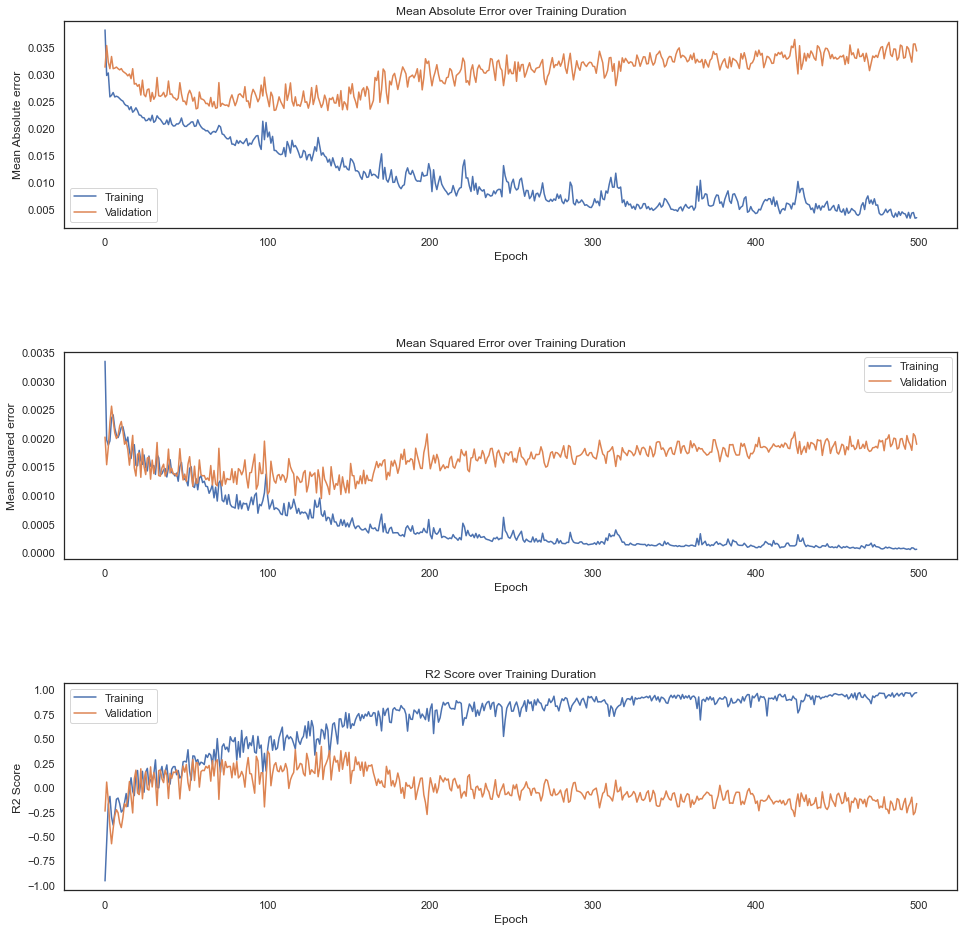

In [926]:
#Compare the models performance over training duration using plots for all three metrics

#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history.history['mean_absolute_error'], label="Training")
axs[0].plot(history.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_xlim(0, 500)
axs[0].legend()

#MSE subplot
axs[1].plot(history.history['mean_squared_error'], label="Training")
axs[1].plot(history.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_xlim(0, 500)
axs[1].legend()

#r2 score subplot
axs[2].plot(history.history['r2_score'], label="Training")
axs[2].plot(history.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-0.4, 0.3)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [930]:
#Assess CNN impacts in the model and play with hyperparams + play with hyperparameters a bit

#Create the model
model = Sequential()

#Input Layer
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

#Hidden Layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#The Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Compile the network
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 8, 1)              0         
                                                                 
 conv1d_17 (Conv1D)          (None, 6, 32)             128       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 dense_47 (Dense)            (None, 3, 256)            8448      
                                                                 
 dense_48 (Dense)            (None, 3, 256)            65792     
                                                                 
 dense_49 (Dense)            (None, 3, 256)            65792     
                                                     

3/3 [==============================] - 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0020 - r2_score: -2.2713 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313 - val_mean_squared_error: 0.0020 - val_r2_score: -2.6419
Epoch 27/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0021 - r2_score: -2.5602 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311 - val_mean_squared_error: 0.0019 - val_r2_score: -2.5700
Epoch 28/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0020 - r2_score: -2.2857 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305 - val_mean_squared_error: 0.0018 - val_r2_score: -2.2910
Epoch 29/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0020 - r2_score: -2.3459 - val_loss: 0.0313 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_squared_error: 0.0020 - r2_score: -2.3032 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309 - val_mean_squared_error: 0.0020 - val_r2_score: -2.6935
Epoch 57/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0021 - r2_score: -2.6120 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305 - val_mean_squared_error: 0.0019 - val_r2_score: -2.5178
Epoch 58/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_squared_error: 0.0020 - r2_score: -2.4783 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_squared_error: 0.0017 - val_r2_score: -2.1945
Epoch 59/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0019 - r2_score: -2.1608 - val_loss: 0.0299 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0017 - r2_score: -2.0807 - val_loss: 0.0292 - val_mean_absolute_error: 0.0292 - val_mean_squared_error: 0.0017 - val_r2_score: -2.2073
Epoch 87/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0020 - r2_score: -2.5658 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296 - val_mean_squared_error: 0.0018 - val_r2_score: -2.4122
Epoch 88/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_squared_error: 0.0019 - r2_score: -2.3954 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_squared_error: 0.0015 - val_r2_score: -1.6881
Epoch 89/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0017 - r2_score: -1.9730 - val_loss: 0.0278 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_squared_error: 0.0019 - r2_score: -2.5593 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295 - val_mean_squared_error: 0.0020 - val_r2_score: -2.6230
Epoch 117/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0020 - r2_score: -2.2432 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284 - val_mean_squared_error: 0.0017 - val_r2_score: -2.1501
Epoch 118/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0017 - r2_score: -2.1273 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7271
Epoch 119/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_squared_error: 0.0017 - r2_score: -1.9057 - val_loss: 0.0288 - val_mean_absolute_error

3/3 [==============================] - 0s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_squared_error: 0.0016 - r2_score: -2.2860 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014 - val_r2_score: -1.6723
Epoch 147/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_squared_error: 0.0016 - r2_score: -1.9116 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9401
Epoch 148/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_squared_error: 0.0016 - r2_score: -1.8917 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0014 - val_r2_score: -1.4972
Epoch 149/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_squared_error: 0.0015 - r2_score: -2.0030 - val_loss: 0.0270 - val_mean_absolute_error

3/3 [==============================] - 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_squared_error: 0.0015 - r2_score: -1.6066 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0014 - val_r2_score: -1.5196
Epoch 177/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0016 - r2_score: -1.9758 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273 - val_mean_squared_error: 0.0017 - val_r2_score: -2.0567
Epoch 178/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_squared_error: 0.0015 - r2_score: -1.9124 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7899
Epoch 179/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_squared_error: 0.0017 - r2_score: -2.0033 - val_loss: 0.0301 - val_mean_absolute_error

3/3 [==============================] - 0s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_squared_error: 0.0014 - r2_score: -1.4644 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0014 - val_r2_score: -1.6749
Epoch 207/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0014 - r2_score: -1.6363 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277 - val_mean_squared_error: 0.0018 - val_r2_score: -2.2732
Epoch 208/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_squared_error: 0.0015 - r2_score: -1.7796 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014 - val_r2_score: -1.6097
Epoch 209/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0012 - r2_score: -1.1393 - val_loss: 0.0265 - val_mean_absolute_error

3/3 [==============================] - 0s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_squared_error: 0.0012 - r2_score: -1.4065 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7919
Epoch 237/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_squared_error: 0.0014 - r2_score: -1.9307 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0018 - val_r2_score: -2.2652
Epoch 238/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_squared_error: 0.0013 - r2_score: -1.5842 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9159
Epoch 239/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_squared_error: 0.0012 - r2_score: -1.2971 - val_loss: 0.0284 - val_mean_absolute_error

3/3 [==============================] - 0s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_squared_error: 0.0012 - r2_score: -1.3529 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7808
Epoch 267/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_squared_error: 0.0013 - r2_score: -1.3836 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0016 - val_r2_score: -1.8948
Epoch 268/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_squared_error: 0.0012 - r2_score: -1.2410 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7653
Epoch 269/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_squared_error: 0.0012 - r2_score: -1.0388 - val_loss: 0.0273 - val_mean_absolute_error

3/3 [==============================] - 0s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_squared_error: 0.0013 - r2_score: -1.2900 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7773
Epoch 297/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0014 - r2_score: -1.7969 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0018 - val_r2_score: -2.3898
Epoch 298/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_squared_error: 0.0015 - r2_score: -1.5810 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0016 - val_r2_score: -2.0411
Epoch 299/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_squared_error: 0.0013 - r2_score: -1.5379 - val_loss: 0.0285 - val_mean_absolute_error

3/3 [==============================] - 0s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_squared_error: 0.0014 - r2_score: -1.4850 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_mean_squared_error: 0.0014 - val_r2_score: -1.5355
Epoch 327/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_squared_error: 0.0012 - r2_score: -1.2887 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0014 - val_r2_score: -1.5038
Epoch 328/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_squared_error: 0.0011 - r2_score: -1.1501 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9823
Epoch 329/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_squared_error: 0.0012 - r2_score: -1.0980 - val_loss: 0.0290 - val_mean_absolute_error

3/3 [==============================] - 0s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_squared_error: 0.0012 - r2_score: -1.0883 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9675
Epoch 357/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_squared_error: 0.0013 - r2_score: -1.6891 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0015 - val_r2_score: -1.6898
Epoch 358/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_squared_error: 0.0011 - r2_score: -1.0783 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0015 - val_r2_score: -1.7166
Epoch 359/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_squared_error: 0.0011 - r2_score: -0.9980 - val_loss: 0.0271 - val_mean_absolute_error

3/3 [==============================] - 0s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_squared_error: 0.0012 - r2_score: -1.1379 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274 - val_mean_squared_error: 0.0014 - val_r2_score: -1.6167
Epoch 387/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_squared_error: 0.0011 - r2_score: -1.0449 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280 - val_mean_squared_error: 0.0017 - val_r2_score: -2.1969
Epoch 388/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_squared_error: 0.0014 - r2_score: -1.6530 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0019 - val_r2_score: -2.4364
Epoch 389/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_squared_error: 0.0013 - r2_score: -1.6132 - val_loss: 0.0264 - val_mean_absolute_error

3/3 [==============================] - 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_squared_error: 0.0011 - r2_score: -1.0739 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0015 - val_r2_score: -1.8023
Epoch 417/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_squared_error: 0.0011 - r2_score: -0.9385 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0014 - val_r2_score: -1.6515
Epoch 418/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_squared_error: 0.0010 - r2_score: -1.4258 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9489
Epoch 419/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_squared_error: 0.0011 - r2_score: -0.6894 - val_loss: 0.0284 - val_mean_absolute_error

3/3 [==============================] - 0s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_squared_error: 0.0011 - r2_score: -0.9714 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_squared_error: 0.0018 - val_r2_score: -2.3060
Epoch 447/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_squared_error: 0.0012 - r2_score: -1.3476 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0017 - val_r2_score: -2.1596
Epoch 448/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_squared_error: 0.0011 - r2_score: -1.2112 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267 - val_mean_squared_error: 0.0016 - val_r2_score: -1.9410
Epoch 449/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_squared_error: 0.0011 - r2_score: -1.6361 - val_loss: 0.0279 - val_mean_absolute_error

3/3 [==============================] - 0s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_squared_error: 0.0011 - r2_score: -0.8501 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274 - val_mean_squared_error: 0.0017 - val_r2_score: -2.0601
Epoch 477/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_squared_error: 0.0011 - r2_score: -1.0070 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280 - val_mean_squared_error: 0.0017 - val_r2_score: -2.0917
Epoch 478/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_squared_error: 0.0012 - r2_score: -1.3666 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280 - val_mean_squared_error: 0.0017 - val_r2_score: -2.1366
Epoch 479/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_squared_error: 0.0011 - r2_score: -0.8667 - val_loss: 0.0277 - val_mean_absolute_error

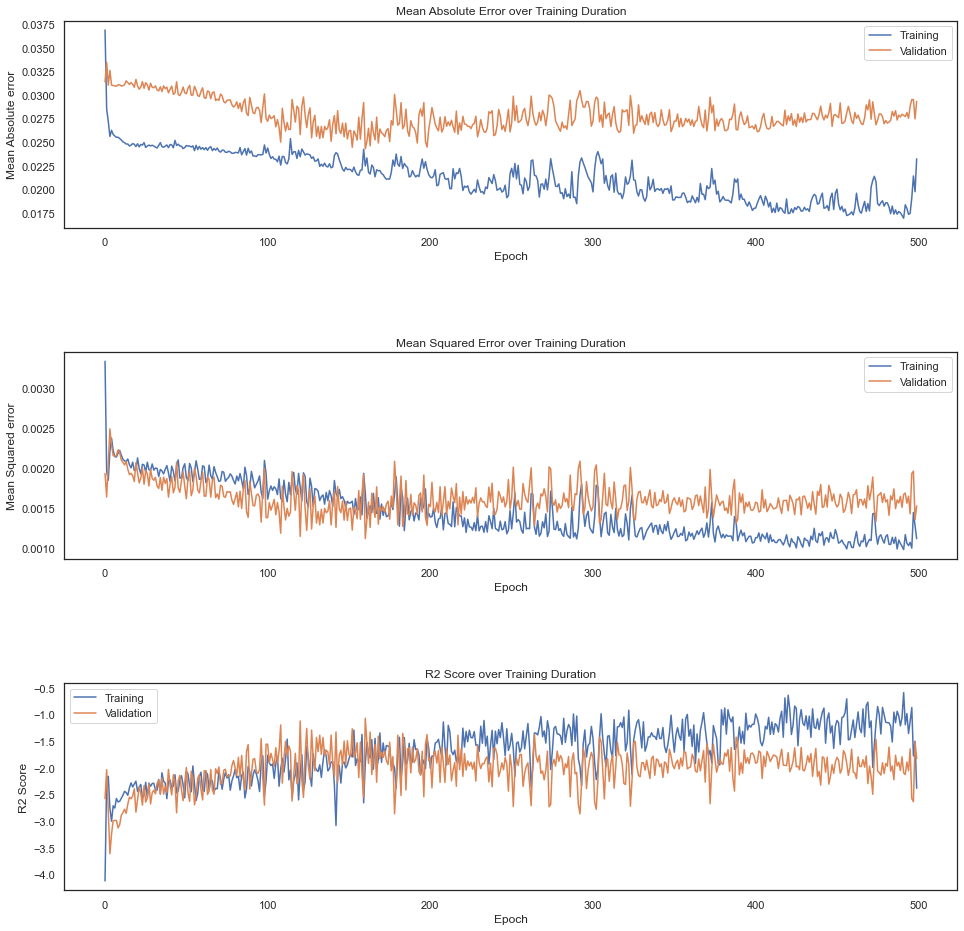

In [931]:
#Compare the models performance over training duration using plots for all three metrics

#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history.history['mean_absolute_error'], label="Training")
axs[0].plot(history.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_xlim(0, 500)
axs[0].legend()

#MSE subplot
axs[1].plot(history.history['mean_squared_error'], label="Training")
axs[1].plot(history.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_xlim(0, 500)
axs[1].legend()

#r2 score subplot
axs[2].plot(history.history['r2_score'], label="Training")
axs[2].plot(history.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-0.4, 0.3)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [932]:
#Look at RNN with an LSTM layer

#Create the model
model = Sequential()

#Input Layer
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#LSTM layer
model.add(LSTM(64))

#Hidden Layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#The Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Compile the network
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 8, 1)              0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_51 (Dense)            (None, 256)               16640     
                                                                 
 dense_52 (Dense)            (None, 256)               65792     
                                                                 
 dense_53 (Dense)            (None, 256)               65792     
                                                                 
 dense_54 (Dense)            (None, 1)                 257       
                                                                 
Total params: 165,377
Trainable params: 165,377
Non-t

Epoch 27/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0020 - r2_score: -0.0979 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2024
Epoch 28/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0020 - r2_score: -0.1011 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315 - val_mean_squared_error: 0.0019 - val_r2_score: -0.2002
Epoch 29/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0021 - r2_score: -0.1727 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2318
Epoch 30/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0020 - r2_score: -0.1025 - val_loss: 0.0312 - val_mean_abso

3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0020 - r2_score: -0.1089 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1696
Epoch 58/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0019 - r2_score: -0.0462 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2572
Epoch 59/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0021 - r2_score: -0.1767 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319 - val_mean_squared_error: 0.0021 - val_r2_score: -0.3060
Epoch 60/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0021 - r2_score: -0.0627 - val_loss: 0.0311 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 19ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0021 - r2_score: -0.1939 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2007
Epoch 88/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0019 - r2_score: -0.0998 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305 - val_mean_squared_error: 0.0018 - val_r2_score: -0.1232
Epoch 89/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_squared_error: 0.0019 - r2_score: -0.0442 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311 - val_mean_squared_error: 0.0020 - val_r2_score: -0.2195
Epoch 90/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_squared_error: 0.0020 - r2_score: -0.1651 - val_loss: 0.0313 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_squared_error: 0.0020 - r2_score: -0.1434 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0108
Epoch 118/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_squared_error: 0.0018 - r2_score: 0.0431 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0400
Epoch 119/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_squared_error: 0.0019 - r2_score: -0.0696 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0019 - val_r2_score: -0.1606
Epoch 120/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_squared_error: 0.0020 - r2_score: -0.0847 - val_loss: 0.0284 - val_mean_absolute_error: 

3/3 [==============================] - 0s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_squared_error: 0.0019 - r2_score: -0.0011 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0144
Epoch 148/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_squared_error: 0.0019 - r2_score: -0.0120 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0611
Epoch 149/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0019 - r2_score: -0.0208 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0019
Epoch 150/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_squared_error: 0.0019 - r2_score: -0.0204 - val_loss: 0.0292 - val_mean_absolute_error:

3/3 [==============================] - 0s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_squared_error: 0.0019 - r2_score: -0.0935 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0541
Epoch 178/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_squared_error: 0.0017 - r2_score: 0.0389 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0308
Epoch 179/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0018 - r2_score: 0.0916 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0018 - val_r2_score: -0.0951
Epoch 180/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0019 - r2_score: -0.1060 - val_loss: 0.0285 - val_mean_absolute_error: 0.

3/3 [==============================] - 0s 19ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0018 - r2_score: 0.0260 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0132
Epoch 208/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0018 - r2_score: 0.0583 - val_loss: 0.0276 - val_mean_absolute_error: 0.0276 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0971
Epoch 209/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_squared_error: 0.0017 - r2_score: 0.0369 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0525
Epoch 210/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_squared_error: 0.0018 - r2_score: -0.0240 - val_loss: 0.0286 - val_mean_absolute_error: 0.

3/3 [==============================] - 0s 19ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_squared_error: 0.0017 - r2_score: 0.0347 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0015 - val_r2_score: 0.1034
Epoch 238/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_squared_error: 0.0017 - r2_score: 0.1356 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1730
Epoch 239/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_squared_error: 0.0016 - r2_score: 0.1268 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0288
Epoch 240/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_squared_error: 0.0019 - r2_score: -0.0980 - val_loss: 0.0275 - val_mean_absolute_error: 0.0

Epoch 268/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_squared_error: 0.0015 - r2_score: 0.1307 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0280
Epoch 269/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_squared_error: 0.0016 - r2_score: 0.1070 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0012 - val_r2_score: 0.2660
Epoch 270/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0014 - r2_score: 0.2057 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238 - val_mean_squared_error: 0.0012 - val_r2_score: 0.2344
Epoch 271/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_squared_error: 0.0017 - r2_score: -0.0090 - val_loss: 0.0281 - val_mean_absol

3/3 [==============================] - 0s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_squared_error: 0.0012 - r2_score: 0.3720 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1324
Epoch 299/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_squared_error: 0.0012 - r2_score: 0.2686 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0012 - val_r2_score: 0.2507
Epoch 300/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_squared_error: 0.0011 - r2_score: 0.2782 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1302
Epoch 301/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_squared_error: 0.0013 - r2_score: 0.1960 - val_loss: 0.0269 - val_mean_absolute_error: 0.026

3/3 [==============================] - 0s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_squared_error: 8.1802e-04 - r2_score: 0.5298 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0076
Epoch 329/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_squared_error: 9.5240e-04 - r2_score: 0.3944 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0737
Epoch 330/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_squared_error: 7.8431e-04 - r2_score: 0.4779 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0013 - val_r2_score: 0.2110
Epoch 331/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_squared_error: 7.0012e-04 - r2_score: 0.5448 - val_loss: 0.0270 - val_mean_absol

3/3 [==============================] - 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_squared_error: 6.8909e-04 - r2_score: 0.5682 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0013 - val_r2_score: 0.2153
Epoch 359/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_squared_error: 8.2619e-04 - r2_score: 0.5370 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1493
Epoch 360/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_squared_error: 5.7430e-04 - r2_score: 0.4242 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_squared_error: 0.0018 - val_r2_score: -0.0986
Epoch 361/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_squared_error: 5.8748e-04 - r2_score: 0.6307 - val_loss: 0.0297 - val_mean_abso

3/3 [==============================] - 0s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_squared_error: 5.1082e-04 - r2_score: 0.7001 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1443
Epoch 389/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_squared_error: 6.3489e-04 - r2_score: 0.5245 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014 - val_r2_score: 0.1433
Epoch 390/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_squared_error: 5.3857e-04 - r2_score: 0.5652 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0013 - val_r2_score: 0.2208
Epoch 391/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_squared_error: 5.3319e-04 - r2_score: 0.5849 - val_loss: 0.0301 - val_mean_absol

3/3 [==============================] - 0s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_squared_error: 4.4147e-04 - r2_score: 0.7240 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0013
Epoch 419/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_squared_error: 4.2414e-04 - r2_score: 0.6684 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0398
Epoch 420/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_squared_error: 3.7858e-04 - r2_score: 0.7114 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335 - val_mean_squared_error: 0.0017 - val_r2_score: -0.0442
Epoch 421/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_squared_error: 3.5774e-04 - r2_score: 0.7843 - val_loss: 0.0306 - val_mean_abs

3/3 [==============================] - 0s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_squared_error: 3.3384e-04 - r2_score: 0.8233 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0648
Epoch 449/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_squared_error: 3.3461e-04 - r2_score: 0.7636 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304 - val_mean_squared_error: 0.0015 - val_r2_score: 0.0760
Epoch 450/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_squared_error: 3.3095e-04 - r2_score: 0.6447 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317 - val_mean_squared_error: 0.0016 - val_r2_score: -0.0086
Epoch 451/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_squared_error: 3.0419e-04 - r2_score: 0.8132 - val_loss: 0.0315 - val_mean_abso

3/3 [==============================] - 0s 19ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_squared_error: 2.5475e-04 - r2_score: 0.7881 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330 - val_mean_squared_error: 0.0018 - val_r2_score: -0.0823
Epoch 479/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_squared_error: 2.3028e-04 - r2_score: 0.8588 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0016 - val_r2_score: 0.0300
Epoch 480/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_squared_error: 2.6862e-04 - r2_score: 0.8466 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0013 - val_r2_score: 0.1762
Epoch 481/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_squared_error: 3.5396e-04 - r2_score: 0.7563 - val_loss: 0.0316 - val_mean_abso

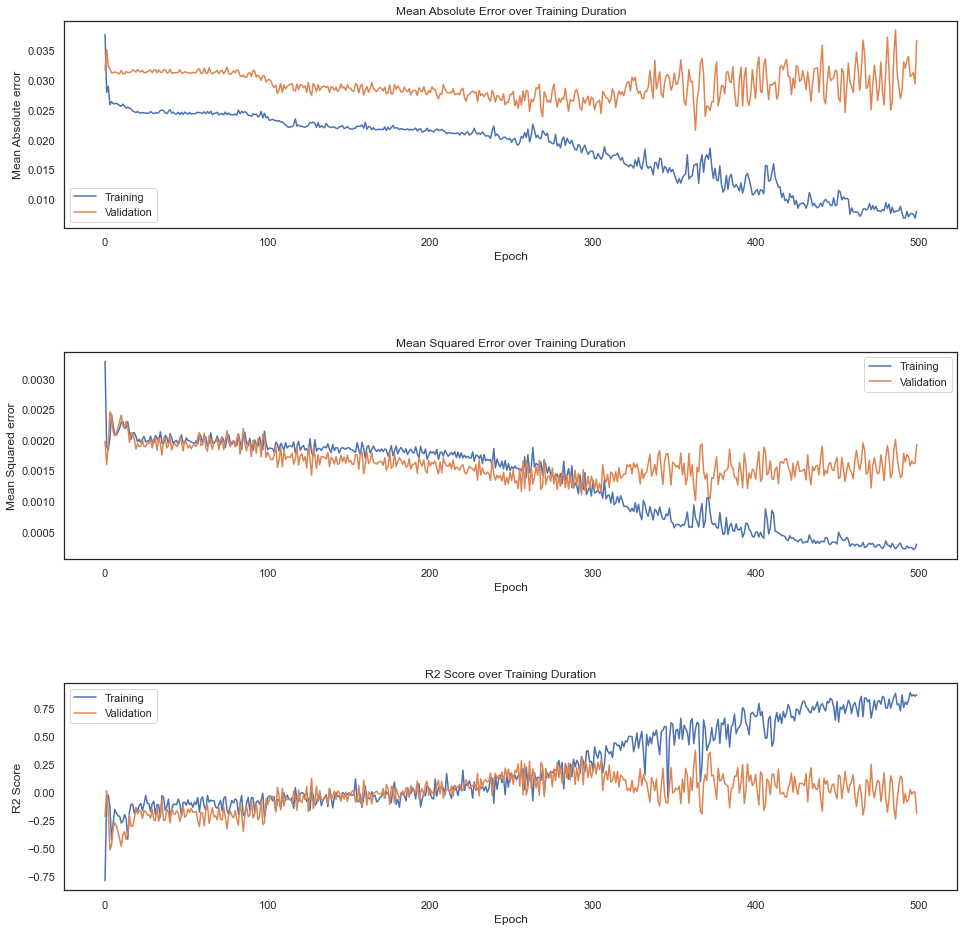

In [933]:
#Compare the models performance over training duration using plots for all three metrics

#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history.history['mean_absolute_error'], label="Training")
axs[0].plot(history.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_xlim(0, 500)
axs[0].legend()

#MSE subplot
axs[1].plot(history.history['mean_squared_error'], label="Training")
axs[1].plot(history.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_xlim(0, 500)
axs[1].legend()

#r2 score subplot
axs[2].plot(history.history['r2_score'], label="Training")
axs[2].plot(history.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-0.4, 0.3)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [948]:
#Look at Radial Basis Function NN

#Define the Radial Basis Function activation layer
class RadialBasisFunction(Layer):
    def __init__(self, num_centers=128, **kwargs):
        super(RadialBasisFunction, self).__init__(**kwargs)
        self.num_centers = num_centers

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.num_centers,),
                                       initializer='uniform',
                                       trainable=True)
        super(RadialBasisFunction, self).build(input_shape)

    def call(self, x):
        radial_distances = K.square(x[:, None] - self.centers)
        return K.exp(-radial_distances)

#Create the Radial Basis Functional Neural Network
model = Sequential()

#Input Layer
model.add(Dense(128, activation='relu', input_dim=8))

#Hidden Layer with RBF activation
model.add(RadialBasisFunction(num_centers=128))

#Output Layer
model.add(Dense(1, activation='linear'))

#Compile the network
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history = model.fit(X_train_normalized, Y_train, epochs=500, batch_size=32, validation_split=0.2)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 128)               1152      
                                                                 
 radial_basis_function_6 (Ra  (None, 1, 128)           128       
 dialBasisFunction)                                              
                                                                 
 dense_76 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 126ms/step - loss: 3.3714 - mean_absolute_error: 3.3714 - mean_squared_error: 11.3774 - r2_score: -12241.5830 - val_loss: 3.0815 - val_mean_absolute_error: 3.0815 - val_mean_squared_error: 9.4983

Epoch 28/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_squared_error: 0.0047 - r2_score: -3.4668 - val_loss: 0.0560 - val_mean_absolute_error: 0.0560 - val_mean_squared_error: 0.0049 - val_r2_score: -2.5572
Epoch 29/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_squared_error: 0.0043 - r2_score: -1.5936 - val_loss: 0.0526 - val_mean_absolute_error: 0.0526 - val_mean_squared_error: 0.0043 - val_r2_score: -2.1418
Epoch 30/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_squared_error: 0.0036 - r2_score: -1.5010 - val_loss: 0.0504 - val_mean_absolute_error: 0.0504 - val_mean_squared_error: 0.0040 - val_r2_score: -1.9111
Epoch 31/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_squared_error: 0.0036 - r2_score: -1.5228 - val_loss: 0.0485 - val_mean_abso

3/3 [==============================] - 0s 16ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0018 - r2_score: 0.0351 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295 - val_mean_squared_error: 0.0022 - val_r2_score: -0.5994
Epoch 59/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_squared_error: 0.0022 - r2_score: -0.2378 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0467
Epoch 60/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_squared_error: 0.0019 - r2_score: -0.1301 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3152
Epoch 61/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_squared_error: 0.0024 - r2_score: -0.2523 - val_loss: 0.0283 - val_mean_absolute_error: 0.

3/3 [==============================] - 0s 19ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0019 - r2_score: 0.0227 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0020 - val_r2_score: -0.4641
Epoch 89/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0021 - r2_score: -0.1616 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0017 - val_r2_score: -0.2442
Epoch 90/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0019 - r2_score: -0.0483 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0018 - val_r2_score: -0.2757
Epoch 91/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0019 - r2_score: -0.0142 - val_loss: 0.0303 - val_mean_absolute_error: 0.

3/3 [==============================] - 0s 15ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_squared_error: 0.0018 - r2_score: -0.0641 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0017 - val_r2_score: -0.2435
Epoch 119/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_squared_error: 0.0023 - r2_score: -0.2595 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_squared_error: 0.0015 - val_r2_score: -0.0637
Epoch 120/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_squared_error: 0.0018 - r2_score: 0.0134 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3237
Epoch 121/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0019 - r2_score: -0.0108 - val_loss: 0.0273 - val_mean_absolute_error:

3/3 [==============================] - 0s 16ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_squared_error: 0.0028 - r2_score: -0.4969 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367 - val_mean_squared_error: 0.0015 - val_r2_score: -0.1097
Epoch 149/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_squared_error: 0.0018 - r2_score: -0.0520 - val_loss: 0.0456 - val_mean_absolute_error: 0.0456 - val_mean_squared_error: 0.0035 - val_r2_score: -1.5065
Epoch 150/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_squared_error: 0.0030 - r2_score: -0.4711 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0405
Epoch 151/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_squared_error: 0.0019 - r2_score: -0.3254 - val_loss: 0.0325 - val_mean_absolute_error

3/3 [==============================] - 0s 16ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_squared_error: 0.0021 - r2_score: -0.1122 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3037
Epoch 179/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0019 - r2_score: -0.0324 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0018 - val_r2_score: -0.2940
Epoch 180/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_squared_error: 0.0020 - r2_score: -0.0843 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0016 - val_r2_score: -0.1456
Epoch 181/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0017 - r2_score: 0.0133 - val_loss: 0.0279 - val_mean_absolute_error:

3/3 [==============================] - 0s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_squared_error: 0.0021 - r2_score: -0.2231 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0222
Epoch 209/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_squared_error: 0.0017 - r2_score: 0.0436 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0020 - val_r2_score: -0.4591
Epoch 210/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_squared_error: 0.0022 - r2_score: -0.1979 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0369
Epoch 211/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_squared_error: 0.0017 - r2_score: 0.0854 - val_loss: 0.0335 - val_mean_absolute_error: 

3/3 [==============================] - 0s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_squared_error: 0.0019 - r2_score: -0.0761 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0015 - val_r2_score: -0.1161
Epoch 239/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_squared_error: 0.0021 - r2_score: -0.2901 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0467
Epoch 240/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_squared_error: 0.0017 - r2_score: -0.1993 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310 - val_mean_squared_error: 0.0022 - val_r2_score: -0.6102
Epoch 241/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_squared_error: 0.0023 - r2_score: -0.2263 - val_loss: 0.0335 - val_mean_absolute_error

3/3 [==============================] - 0s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_squared_error: 0.0018 - r2_score: 0.0316 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0018 - val_r2_score: -0.2947
Epoch 269/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_squared_error: 0.0019 - r2_score: 0.0233 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3314
Epoch 270/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_squared_error: 0.0020 - r2_score: -0.1053 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0019 - val_r2_score: -0.3402
Epoch 271/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_squared_error: 0.0019 - r2_score: -0.0224 - val_loss: 0.0257 - val_mean_absolute_error: 

3/3 [==============================] - 0s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_squared_error: 0.0024 - r2_score: -0.1845 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0373
Epoch 299/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_squared_error: 0.0018 - r2_score: 0.0765 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_squared_error: 0.0028 - val_r2_score: -1.0364
Epoch 300/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0023 - r2_score: -0.1834 - val_loss: 0.0382 - val_mean_absolute_error: 0.0382 - val_mean_squared_error: 0.0016 - val_r2_score: -0.1788
Epoch 301/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_squared_error: 0.0018 - r2_score: -0.0160 - val_loss: 0.0425 - val_mean_absolute_error:

3/3 [==============================] - 0s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_squared_error: 0.0019 - r2_score: -0.0409 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0016 - val_r2_score: -0.1262
Epoch 329/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_squared_error: 0.0017 - r2_score: 0.1324 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266 - val_mean_squared_error: 0.0019 - val_r2_score: -0.3678
Epoch 330/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_squared_error: 0.0020 - r2_score: -0.1032 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0017 - val_r2_score: -0.2031
Epoch 331/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_squared_error: 0.0018 - r2_score: -0.0312 - val_loss: 0.0277 - val_mean_absolute_error:

3/3 [==============================] - 0s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_squared_error: 0.0019 - r2_score: -0.0550 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0016 - val_r2_score: -0.1602
Epoch 359/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_squared_error: 0.0018 - r2_score: -0.0284 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0016 - val_r2_score: -0.1568
Epoch 360/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_squared_error: 0.0017 - r2_score: 0.0871 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306 - val_mean_squared_error: 0.0022 - val_r2_score: -0.5996
Epoch 361/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_squared_error: 0.0020 - r2_score: -0.1341 - val_loss: 0.0256 - val_mean_absolute_error:

3/3 [==============================] - 0s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_squared_error: 0.0019 - r2_score: -0.0113 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0019 - val_r2_score: -0.3425
Epoch 389/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_squared_error: 0.0019 - r2_score: -0.0262 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0015 - val_r2_score: -0.1191
Epoch 390/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_squared_error: 0.0018 - r2_score: 0.0850 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0017 - val_r2_score: -0.2207
Epoch 391/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0018 - r2_score: 0.0596 - val_loss: 0.0270 - val_mean_absolute_error: 

3/3 [==============================] - 0s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_squared_error: 0.0024 - r2_score: -0.2948 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0015 - val_r2_score: -0.0878
Epoch 419/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0016 - r2_score: 0.1017 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3273
Epoch 420/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_squared_error: 0.0024 - r2_score: -0.3240 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273 - val_mean_squared_error: 0.0015 - val_r2_score: -0.0622
Epoch 421/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0017 - r2_score: 0.0844 - val_loss: 0.0286 - val_mean_absolute_error: 

3/3 [==============================] - 0s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_squared_error: 0.0025 - r2_score: -0.2878 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0014 - val_r2_score: 0.0058
Epoch 449/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_squared_error: 0.0017 - r2_score: 0.0830 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0017 - val_r2_score: -0.2027
Epoch 450/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_squared_error: 0.0020 - r2_score: -0.2738 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329 - val_mean_squared_error: 0.0014 - val_r2_score: 0.0055
Epoch 451/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_squared_error: 0.0018 - r2_score: -0.0614 - val_loss: 0.0255 - val_mean_absolute_error: 0

3/3 [==============================] - 0s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_squared_error: 0.0021 - r2_score: -0.1618 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308 - val_mean_squared_error: 0.0014 - val_r2_score: -0.0262
Epoch 479/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_squared_error: 0.0020 - r2_score: -0.0875 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0018 - val_r2_score: -0.3353
Epoch 480/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0018 - r2_score: -0.0543 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0015 - val_r2_score: -0.1161
Epoch 481/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_squared_error: 0.0018 - r2_score: -0.0684 - val_loss: 0.0254 - val_mean_absolute_error

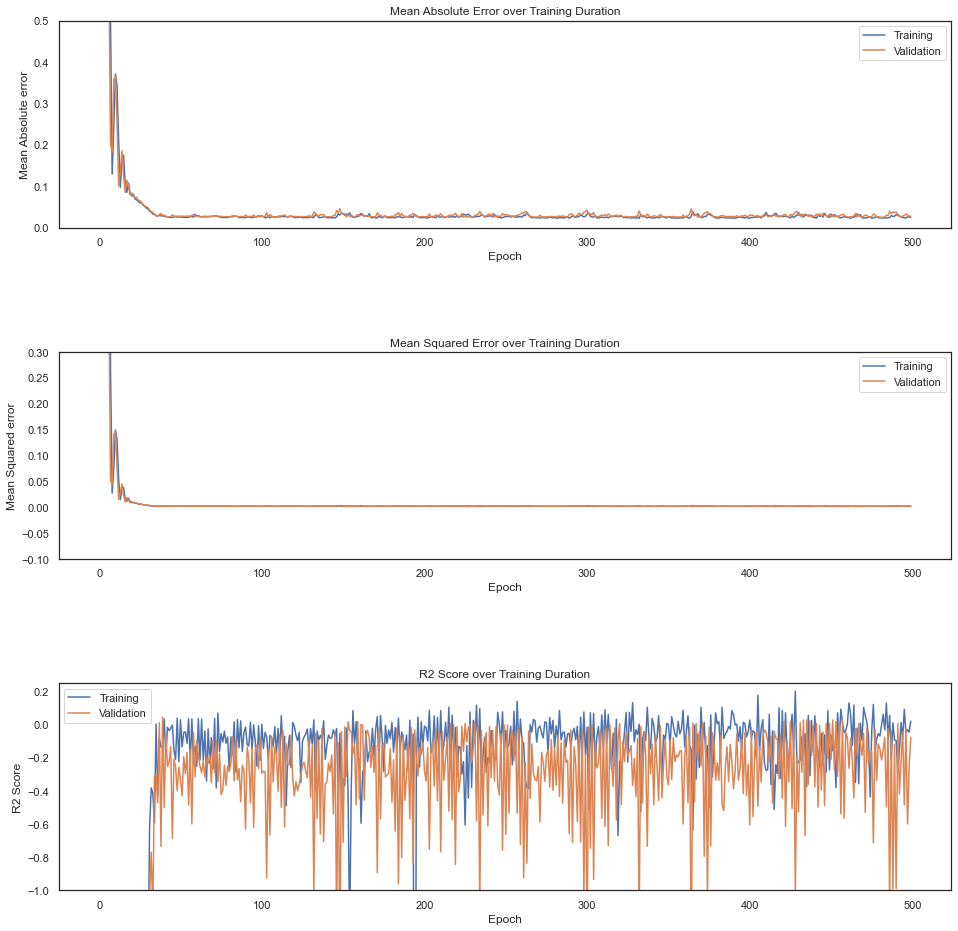

In [951]:
#Compare the models performance over training duration using plots for all three metrics

#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history.history['mean_absolute_error'], label="Training")
axs[0].plot(history.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history.history['mean_squared_error'], label="Training")
axs[1].plot(history.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history.history['r2_score'], label="Training")
axs[2].plot(history.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [962]:
#Perform hyperparameter tuning on the best model option to see if it can be improved

#Define function for hyperparameter tuning
def build_model(hp):
    #Start model
    model = keras.Sequential()
    #Input layer
    inp = tf.keras.layers.Input(shape=(X_train.shape[1],))
    #Test models with up to 6 dense layers
    num_dense = hp.Int('num_dense', min_value=1, max_value=6, step=1)
    #Iterate through each layer
    for i in range(num_dense):
        #Define units to test
        hp_units = hp.Int('units_{i}'.format(i=i), min_value=8, max_value=4096, step=128)
        #Define dropout values to test
        hp_drop_rate = hp.Choice('dp_{i}'.format(i=i), values=[0.0, 0.1, 0.15, 0.2, 0.25 ,0.3,
                                                               0.35,0.4, 0.5, 0.6, 0.7])
        #Define activation functions to test
        hp_activation = hp.Choice('dense_activation_{i}'.format(i=i),values=['relu', 'selu',
                                                                             'elu', 'swish'])
        #Define the way data flows through hidden layers
        x = tf.keras.layers.Dense(units=hp_units, activation=hp_activation)(inp)
        x = tf.keras.layers.Dropout(hp_drop_rate)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    #Output layer
    outputs = tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')(x)
    #Create the model with the defined input and outputs
    model = tf.keras.models.Model(inp, outputs)
    #Compile the model
    model.compile(
      optimizer=keras.optimizers.Adam(
        #Define learning rates to test
        hp.Choice('learning_rate', values = [1e-3, 1e-4, 1e-5, 0.0])),
      loss='mean_absolute_error',
      metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
    return model

In [972]:
#Defining parameters
feats = np.arange(0,X.shape[1],1)
inp_size = int(np.ceil(1* len(feats)))
n_split = 5
n_repeats = 1
bests=[]
seeds = [0]
n_round = len(seeds)
shuffle_split_size = 0.2

for seed in seeds:
    split_cols = np.random.choice(feats, inp_size, replace=False)
    #Use k fold cross validation to split data into train and test
    for n, (train, test) in enumerate(KFold(n_splits = n_split, random_state=0,
                                       shuffle = True).split(X3, Y1)):
        st = time_module.time()
        #Define tuning objectives and params
        tuner = kt.tuners.BayesianOptimization(build_model,
                     kt.Objective('val_r2_score', direction="max"),
                     max_trials = 30, overwrite=True)
        start_time = time_module.time()
        X_train = X[train][:, split_cols]
        X_val = X[test][:, split_cols]
        Y_train, Y_val = Y[train], Y[test]
        #Early stop if the validation accuracy does not improve for 10 epochs
        callbacks=[EarlyStopping(monitor='mean_absolute_error', mode='min', patience=10)]
        start_time = time_module.time()
        #Perform hyperparameter search using train and val data
        tuner.search(X_train, Y_train,validation_data=(X_val, Y_val),
                            epochs = 300, batch_size = 128,
                            verbose = 0, callbacks = callbacks)
        #Create method to recall best hyperparameters identified during the trial
        n_top = 5
        best_hps = tuner.get_best_hyperparameters(n_top)
        end_time = time_module.time()
        bests.append(best_hps)
        for i in range(n_top):
            print(best_hps[i].values)
        #Print statements to monitor the progress of the tests
        print('Seed', seed, 'Fold', n, 'Time elapsed:', "{:.2f}".format((end_time-start_time)/60), 'minutes')
        #Delete old tuner for memory conservation
        del tuner

INFO:tensorflow:Oracle triggered exit
{'num_dense': 6, 'units_0': 1288, 'dp_0': 0.15, 'dense_activation_0': 'elu', 'learning_rate': 0.001, 'units_1': 1928, 'dp_1': 0.2, 'dense_activation_1': 'selu', 'units_2': 3848, 'dp_2': 0.35, 'dense_activation_2': 'selu', 'units_3': 8, 'dp_3': 0.0, 'dense_activation_3': 'relu', 'units_4': 8, 'dp_4': 0.0, 'dense_activation_4': 'relu', 'units_5': 8, 'dp_5': 0.0, 'dense_activation_5': 'relu'}
{'num_dense': 3, 'units_0': 392, 'dp_0': 0.5, 'dense_activation_0': 'swish', 'learning_rate': 0.0, 'units_1': 392, 'dp_1': 0.25, 'dense_activation_1': 'relu', 'units_2': 8, 'dp_2': 0.5, 'dense_activation_2': 'swish', 'units_3': 1032, 'dp_3': 0.15, 'dense_activation_3': 'swish', 'units_4': 1416, 'dp_4': 0.25, 'dense_activation_4': 'relu', 'units_5': 1928, 'dp_5': 0.7, 'dense_activation_5': 'relu'}
{'num_dense': 3, 'units_0': 3848, 'dp_0': 0.6, 'dense_activation_0': 'selu', 'learning_rate': 1e-05, 'units_1': 8, 'dp_1': 0.0, 'dense_activation_1': 'relu', 'units_2': 

In [966]:
#Create a checkpoint callback to save model weights during training
checkpoint_name = 'Weights-{epoch:03d}--{val_r2_score:.5f}.hdf5'
#Only save the weights if they are better than the previous optimal option
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_r2_score', mode='max', verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

In [974]:
#Print outcome from fold 0 seed 0
print(bests[0][0].values)

{'num_dense': 6, 'units_0': 1288, 'dp_0': 0.15, 'dense_activation_0': 'elu', 'learning_rate': 0.001, 'units_1': 1928, 'dp_1': 0.2, 'dense_activation_1': 'selu', 'units_2': 3848, 'dp_2': 0.35, 'dense_activation_2': 'selu', 'units_3': 8, 'dp_3': 0.0, 'dense_activation_3': 'relu', 'units_4': 8, 'dp_4': 0.0, 'dense_activation_4': 'relu', 'units_5': 8, 'dp_5': 0.0, 'dense_activation_5': 'relu'}


In [978]:
#Start new NN
model = keras.Sequential()

#Input layer (Reshape)
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Hidden Layers
model.add(Dense(1288, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.15))

model.add(Dense(1928, kernel_initializer='normal', activation='selu'))
model.add(Dropout(0.2))

model.add(Dense(3848, kernel_initializer='normal', activation='selu'))
model.add(Dropout(0.35))

model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.0))

#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Define optimizer
optimizer = Adam(learning_rate=0.001)

#Compile the network
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history0 = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_split = 0.2, callbacks = callbacks_list)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 300, 1)            0         
                                                                 
 dense_4 (Dense)             (None, 300, 1288)         2576      
                                                                 
 dropout_3 (Dropout)         (None, 300, 1288)         0         
                                                                 
 dense_5 (Dense)             (None, 300, 1928)         2485192   
                                                                 
 dropout_4 (Dropout)         (None, 300, 1928)         0         
                                                                 
 dense_6 (Dense)             (None, 300, 3848)         7422792   
                                                                 
 dropout_5 (Dropout)         (None, 300, 3848)        

Epoch 14/300
1/1 [==============================] - ETA: 0s - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_squared_error: 0.0027 - r2_score: -348.3408
Epoch 14: val_r2_score did not improve from -428.60104
1/1 [==============================] - 4s 4s/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_squared_error: 0.0027 - r2_score: -348.3408 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_squared_error: 0.0025 - val_r2_score: -437.3429
Epoch 15/300
1/1 [==============================] - ETA: 0s - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_squared_error: 0.0026 - r2_score: -338.2186
Epoch 15: val_r2_score did not improve from -428.60104
1/1 [==============================] - 4s 4s/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_squared_error: 0.0026 - r2_score: -338.2186 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0027 - val_r2_score: -470.3117
Epoch 16/300
1/1 [==============================] - ETA: 0s - 

1/1 [==============================] - ETA: 0s - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0026 - r2_score: -344.4510
Epoch 31: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0026 - r2_score: -344.4510 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -488.2375
Epoch 32/300
1/1 [==============================] - ETA: 0s - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0027 - r2_score: -356.8484
Epoch 32: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0027 - r2_score: -356.8484 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383 - val_mean_squared_error: 0.0029 - val_r2_score: -514.8016
Epoch 33/300
1/1 [==============================] - ETA: 0s - loss: 0.0272 

Epoch 49/300
1/1 [==============================] - ETA: 0s - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0028 - r2_score: -361.6570
Epoch 49: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0028 - r2_score: -361.6570 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377 - val_mean_squared_error: 0.0028 - val_r2_score: -498.7787
Epoch 50/300
1/1 [==============================] - ETA: 0s - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0028 - r2_score: -363.7900
Epoch 50: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0028 - r2_score: -363.7900 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -488.1350
Epoch 51/300
1/1 [==============================] - ETA: 0s - 

Epoch 67/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -358.4919
Epoch 67: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -358.4919 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -486.2877
Epoch 68/300
1/1 [==============================] - ETA: 0s - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0027 - r2_score: -357.4181
Epoch 68: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0027 - r2_score: -357.4181 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -487.1979
Epoch 69/300
1/1 [==============================] - ETA: 0s - 

Epoch 85/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.8078
Epoch 85: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.8078 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_squared_error: 0.0028 - val_r2_score: -490.8221
Epoch 86/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -359.8879
Epoch 86: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -359.8879 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -486.4081
Epoch 87/300
1/1 [==============================] - ETA: 0s - 

Epoch 103/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.8871
Epoch 103: val_r2_score did not improve from -415.53305
1/1 [==============================] - 6s 6s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.8871 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_squared_error: 0.0028 - val_r2_score: -492.8256
Epoch 104/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -361.3999
Epoch 104: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -361.3999 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -488.9038
Epoch 105/300
1/1 [==============================] - ETA: 

1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -361.1409 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_squared_error: 0.0028 - val_r2_score: -490.9415
Epoch 121/300
1/1 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.4294
Epoch 121: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_squared_error: 0.0027 - r2_score: -360.4294 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0028 - val_r2_score: -488.8668
Epoch 122/300
1/1 [==============================] - ETA: 0s - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_squared_error: 0.0027 - r2_score: -359.1622
Epoch 122: val_r2_score did not improve from -415.53305
1/1 [==============================] - 5s 5s/step - loss: 

Epoch 138/300
1/1 [==============================] - ETA: 0s - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_squared_error: 0.0027 - r2_score: -360.3190

KeyboardInterrupt: 

In [ ]:
#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history0.history['mean_absolute_error'], label="Training")
axs[0].plot(history0.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history0.history['mean_squared_error'], label="Training")
axs[1].plot(history0.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history0.history['r2_score'], label="Training")
axs[2].plot(history0.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [973]:
#Print outcome from fold 1 seed 0
print(bests[1][0].values)

{'num_dense': 4, 'units_0': 3336, 'dp_0': 0.0, 'dense_activation_0': 'relu', 'learning_rate': 0.001, 'units_1': 776, 'dp_1': 0.25, 'dense_activation_1': 'selu', 'units_2': 2440, 'dp_2': 0.25, 'dense_activation_2': 'swish', 'units_3': 8, 'dp_3': 0.5, 'dense_activation_3': 'relu', 'units_4': 2568, 'dp_4': 0.7, 'dense_activation_4': 'swish', 'units_5': 3336, 'dp_5': 0.3, 'dense_activation_5': 'elu'}


In [ ]:
#Start new NN
model = keras.Sequential()

#Input layer (Reshape)
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Hidden Layers
model.add(Dense(3336, kernel_initializer='normal', activation='swish'))
model.add(Dropout(0.7))


#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Define optimizer
optimizer = Adam(learning_rate=1e-5)

#Compile the network
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history1 = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_split = 0.2, callbacks = callbacks_list)

In [ ]:
#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history1.history['mean_absolute_error'], label="Training")
axs[0].plot(history1.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history1.history['mean_squared_error'], label="Training")
axs[1].plot(history1.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history1.history['r2_score'], label="Training")
axs[2].plot(history1.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [975]:
#Print outcome from fold 2 seed 0
print(bests[2][0].values)

{'num_dense': 5, 'units_0': 2824, 'dp_0': 0.3, 'dense_activation_0': 'elu', 'learning_rate': 0.001, 'units_1': 392, 'dp_1': 0.35, 'dense_activation_1': 'relu', 'units_2': 520, 'dp_2': 0.5, 'dense_activation_2': 'relu', 'units_3': 8, 'dp_3': 0.0, 'dense_activation_3': 'relu', 'units_4': 8, 'dp_4': 0.0, 'dense_activation_4': 'relu'}


In [ ]:
#Start new NN
model = keras.Sequential()

#Input layer (Reshape)
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Hidden Layers
model.add(Dense(3336, kernel_initializer='normal', activation='swish'))
model.add(Dropout(0.7))


#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Define optimizer
optimizer = Adam(learning_rate=1e-5)

#Compile the network
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history2 = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_split = 0.2, callbacks = callbacks_list)

In [ ]:
#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history2.history['mean_absolute_error'], label="Training")
axs[0].plot(history2.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history2.history['mean_squared_error'], label="Training")
axs[1].plot(history2.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history2.history['r2_score'], label="Training")
axs[2].plot(history2.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [976]:
#Print outcome from fold 3 seed 0
print(bests[3][0].values)

{'num_dense': 3, 'units_0': 1160, 'dp_0': 0.35, 'dense_activation_0': 'swish', 'learning_rate': 0.001, 'units_1': 2056, 'dp_1': 0.25, 'dense_activation_1': 'relu', 'units_2': 8, 'dp_2': 0.35, 'dense_activation_2': 'relu', 'units_3': 3720, 'dp_3': 0.35, 'dense_activation_3': 'selu', 'units_4': 2056, 'dp_4': 0.25, 'dense_activation_4': 'selu', 'units_5': 1160, 'dp_5': 0.7, 'dense_activation_5': 'selu'}


In [ ]:
#Start new NN
model = keras.Sequential()

#Input layer (Reshape)
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Hidden Layers
model.add(Dense(3336, kernel_initializer='normal', activation='swish'))
model.add(Dropout(0.7))


#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Define optimizer
optimizer = Adam(learning_rate=1e-5)

#Compile the network
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history3 = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_split = 0.2, callbacks = callbacks_list)

In [ ]:
#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history3.history['mean_absolute_error'], label="Training")
axs[0].plot(history3.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history3.history['mean_squared_error'], label="Training")
axs[1].plot(history3.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history3.history['r2_score'], label="Training")
axs[2].plot(history3.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [977]:
#Print outcome from fold 4 seed 0
print(bests[4][0].values)

{'num_dense': 6, 'units_0': 2440, 'dp_0': 0.6, 'dense_activation_0': 'relu', 'learning_rate': 0.001, 'units_1': 1928, 'dp_1': 0.25, 'dense_activation_1': 'relu', 'units_2': 2312, 'dp_2': 0.7, 'dense_activation_2': 'selu', 'units_3': 2568, 'dp_3': 0.15, 'dense_activation_3': 'elu', 'units_4': 1416, 'dp_4': 0.15, 'dense_activation_4': 'relu', 'units_5': 8, 'dp_5': 0.0, 'dense_activation_5': 'relu'}


In [ ]:
#Start new NN
model = keras.Sequential()

#Input layer (Reshape)
model.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))

#Hidden Layers
model.add(Dense(3336, kernel_initializer='normal', activation='swish'))
model.add(Dropout(0.7))


#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Define optimizer
optimizer = Adam(learning_rate=1e-5)

#Compile the network
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error', r2_score])
model.summary()

#Train the model
history4 = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_split = 0.2, callbacks = callbacks_list)

In [ ]:
#Define plot layout
fig, axs = plt.subplots(3, 1, figsize=(16, 16))

#MAE plot
axs[0].plot(history4.history['mean_absolute_error'], label="Training")
axs[0].plot(history4.history['val_mean_absolute_error'], label="Validation")
axs[0].set_title("Mean Absolute Error over Training Duration")
axs[0].set_ylabel("Mean Absolute error")
axs[0].set_xlabel("Epoch")
#axs[0].set_ylim(0, 0.500)
axs[0].legend()

#MSE subplot
axs[1].plot(history4.history['mean_squared_error'], label="Training")
axs[1].plot(history4.history['val_mean_squared_error'], label="Validation")
axs[1].set_title("Mean Squared Error over Training Duration")
axs[1].set_ylabel("Mean Squared error")
axs[1].set_xlabel("Epoch")
#axs[1].set_ylim(-0.1, 0.300)
axs[1].legend()

#r2 score subplot
axs[2].plot(history4.history['r2_score'], label="Training")
axs[2].plot(history4.history['val_r2_score'], label="Validation")
axs[2].set_title("R2 Score over Training Duration")
axs[2].set_ylabel("R2 Score")
axs[2].set_xlabel("Epoch")
#axs[2].set_ylim(-1, .25)
axs[2].legend()

#Adjust spacing
#plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.6)

#Display plots
plt.show()

In [71]:
#Load weights file of the best model and recompile the model
#weights_file = 'Weights-219--0.01308.hdf5'
#model.load_weights(weights_file)
#model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error', r2_score])

In [72]:
#Evaluate the model on the test data
results = model.evaluate(X_test, Y_test)

1/1 [==============================] - 1s 850ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - accuracy_within_2_percent: 0.0000e+00 - accuracy_within_5_percent: 0.0000e+00 - accuracy_within_10_percent: 0.0741


# Hyperparameter tuning for a CNN

Previous manual analysis showed more promising outcomes for CNN than basic feedforwards neural networks. The following work performs hyperparameter tuning on these neural networks to determine the optimal parameters.

In [105]:
#Adapt previous function to tune hyperparameters for a CNN

#Define function for hyperparameter tuning
def build_model(hp):
    #Start model
    model = keras.Sequential()
    #Input layer
    inp = tf.keras.layers.Input(shape=(X_train.shape[1],))
    #Convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=3, step=1)
    #Reshape input data
    x = tf.keras.layers.Reshape((X_train.shape[1], 1))(inp)
    for i in range(num_conv_layers):
        #Define number of filters to test 
        hp_filters = hp.Int('filters_{i}'.format(i=i), min_value=4, max_value=128, step=8)
        #Define kernel size to test for each convolutional layer
        hp_kernel_size = hp.Int('kernel_size_{i}'.format(i=i), min_value=2, max_value=5, step=1)
        #Define activation function to test 
        hp_conv_activation = hp.Choice('conv_activation_{i}'.format(i=i), values=['relu', 'selu', 'elu', 'swish'])
        #Define pool sizes to test
        hp_pool_size = hp.Int('pool_size_{i}'.format(i=i), min_value=1, max_value=5, step=1)
        #Add the convolutional layer
        x = tf.keras.layers.Conv1D(filters=hp_filters, kernel_size=hp_kernel_size, activation=hp_conv_activation)(x)
        x = tf.keras.layers.MaxPooling1D(pool_size=hp_pool_size)(x)
    #Test models with up to 6 dense layers
    num_dense = hp.Int('num_dense', min_value=1, max_value=6, step=1)
    #Iterate through each layer
    for i in range(num_dense):
        #Define units to test
        hp_units = hp.Int('units_{i}'.format(i=i), min_value=8, max_value=4096, step=128)
        #Define dropout values to test
        hp_drop_rate = hp.Choice('dp_{i}'.format(i=i), values=[0.0, 0.1, 0.15, 0.2, 0.25 ,0.3,
                                                               0.35,0.4, 0.5, 0.6, 0.7])
        #Define activation functions to test
        hp_activation = hp.Choice('dense_activation_{i}'.format(i=i),values=['relu', 'selu',
                                                                             'elu', 'swish'])
        #Define the way data flows through hidden layers
        x = tf.keras.layers.Dense(units=hp_units, activation=hp_activation)(x)
        x = tf.keras.layers.Dropout(hp_drop_rate)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    #Output layer
    outputs = tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')(x)
    #Create the model with the defined input and outputs
    model = tf.keras.models.Model(inp, outputs)
    #Compile the model
    model.compile(
      optimizer=keras.optimizers.Adam(
        #Define learning rates to test
        hp.Choice('learning_rate', values = [1e-3, 1e-4, 1e-5, 0.0])),
      loss='mean_absolute_error',
      metrics=['mean_absolute_error', accuracy_within_5_percent])
    return model

In [106]:
#Use same function as before here

#Defining parameters
feats = np.arange(0,X.shape[1],1)
inp_size = int(np.ceil(1* len(feats)))
n_split = 5
n_repeats = 1
bests_cnn=[]
seeds = [0, 1]
n_round = len(seeds)
shuffle_split_size = 0.2

for seed in seeds:
    split_cols = np.random.choice(feats, inp_size, replace=False)
    #Use k fold cross validation to split data into train and test
    for n, (train, test) in enumerate(KFold(n_splits = n_split, random_state=0,
                                       shuffle = True).split(X, Y)):
        st = time_module.time()
        #Define tuning objectives and params
        tuner = kt.tuners.BayesianOptimization(build_model,
                     kt.Objective('val_accuracy_within_5_percent', direction="max"),
                     max_trials = 150, overwrite=True)
        start_time = time_module.time()
        X_train = X[train][:, split_cols]
        X_val = X[test][:, split_cols]
        Y_train, Y_val = Y[train], Y[test]
        #Early stop if the validation accuracy does not improve for 20 epochs
        callbacks=[EarlyStopping(monitor='val_accuracy_within_5_percent', mode='max', patience=20)]
        start_time = time_module.time()
        #Perform hyperparameter search using train and val data
        tuner.search(X_train, Y_train,validation_data=(X_val, Y_val),
                            epochs = 500, batch_size = 128,
                            verbose = 0, callbacks = callbacks)
        #Create method to recall best hyperparameters identified during the trial
        n_top = 5
        best_hps = tuner.get_best_hyperparameters(n_top)
        end_time = time_module.time()
        bests_cnn.append(best_hps)
        for i in range(n_top):
            print(best_hps[i].values)
        #Print statements to monitor the progress of the tests
        print('Seed', seed, 'Fold', n, 'Time elapsed:', "{:.2f}".format((end_time-start_time)/60), 'minutes')
        #Delete old tuner for memory conservation
        del tuner

INFO:tensorflow:Oracle triggered exit
{'num_conv_layers': 2, 'filters_0': 44, 'kernel_size_0': 4, 'conv_activation_0': 'swish', 'pool_size_0': 4, 'num_dense': 4, 'units_0': 1416, 'dp_0': 0.0, 'dense_activation_0': 'swish', 'learning_rate': 1e-05, 'filters_1': 12, 'kernel_size_1': 2, 'conv_activation_1': 'swish', 'pool_size_1': 3, 'units_1': 3080, 'dp_1': 0.4, 'dense_activation_1': 'swish', 'units_2': 1800, 'dp_2': 0.6, 'dense_activation_2': 'elu', 'units_3': 3976, 'dp_3': 0.1, 'dense_activation_3': 'elu', 'units_4': 1800, 'dp_4': 0.15, 'dense_activation_4': 'elu', 'filters_2': 100, 'kernel_size_2': 5, 'conv_activation_2': 'elu', 'pool_size_2': 4, 'units_5': 2952, 'dp_5': 0.5, 'dense_activation_5': 'swish'}
{'num_conv_layers': 2, 'filters_0': 68, 'kernel_size_0': 2, 'conv_activation_0': 'swish', 'pool_size_0': 4, 'num_dense': 1, 'units_0': 2824, 'dp_0': 0.2, 'dense_activation_0': 'selu', 'learning_rate': 0.0001, 'filters_1': 4, 'kernel_size_1': 4, 'conv_activation_1': 'selu', 'pool_size

INFO:tensorflow:Oracle triggered exit
{'num_conv_layers': 2, 'filters_0': 52, 'kernel_size_0': 2, 'conv_activation_0': 'swish', 'pool_size_0': 5, 'num_dense': 2, 'units_0': 3464, 'dp_0': 0.7, 'dense_activation_0': 'swish', 'learning_rate': 0.001, 'filters_1': 4, 'kernel_size_1': 2, 'conv_activation_1': 'relu', 'pool_size_1': 1, 'units_1': 8, 'dp_1': 0.0, 'dense_activation_1': 'relu'}
{'num_conv_layers': 3, 'filters_0': 52, 'kernel_size_0': 4, 'conv_activation_0': 'elu', 'pool_size_0': 4, 'num_dense': 3, 'units_0': 776, 'dp_0': 0.0, 'dense_activation_0': 'selu', 'learning_rate': 0.001, 'filters_1': 108, 'kernel_size_1': 2, 'conv_activation_1': 'elu', 'pool_size_1': 5, 'units_1': 8, 'dp_1': 0.2, 'dense_activation_1': 'relu', 'filters_2': 4, 'kernel_size_2': 2, 'conv_activation_2': 'relu', 'pool_size_2': 2, 'units_2': 1160, 'dp_2': 0.2, 'dense_activation_2': 'relu', 'units_3': 1800, 'dp_3': 0.15, 'dense_activation_3': 'swish', 'units_4': 1800, 'dp_4': 0.2, 'dense_activation_4': 'relu', 'u

INFO:tensorflow:Oracle triggered exit
{'num_conv_layers': 1, 'filters_0': 84, 'kernel_size_0': 3, 'conv_activation_0': 'swish', 'pool_size_0': 1, 'num_dense': 6, 'units_0': 2824, 'dp_0': 0.5, 'dense_activation_0': 'selu', 'learning_rate': 0.001, 'filters_1': 28, 'kernel_size_1': 4, 'conv_activation_1': 'selu', 'pool_size_1': 2, 'filters_2': 60, 'kernel_size_2': 2, 'conv_activation_2': 'selu', 'pool_size_2': 2, 'units_1': 264, 'dp_1': 0.6, 'dense_activation_1': 'swish', 'units_2': 1288, 'dp_2': 0.35, 'dense_activation_2': 'elu', 'units_3': 2056, 'dp_3': 0.15, 'dense_activation_3': 'swish', 'units_4': 2696, 'dp_4': 0.0, 'dense_activation_4': 'selu', 'units_5': 8, 'dp_5': 0.7, 'dense_activation_5': 'swish'}
{'num_conv_layers': 2, 'filters_0': 100, 'kernel_size_0': 2, 'conv_activation_0': 'elu', 'pool_size_0': 3, 'num_dense': 5, 'units_0': 776, 'dp_0': 0.0, 'dense_activation_0': 'swish', 'learning_rate': 0.0001, 'filters_1': 60, 'kernel_size_1': 4, 'conv_activation_1': 'selu', 'pool_size_1

INFO:tensorflow:Oracle triggered exit
{'num_conv_layers': 1, 'filters_0': 44, 'kernel_size_0': 5, 'conv_activation_0': 'selu', 'pool_size_0': 4, 'num_dense': 5, 'units_0': 2568, 'dp_0': 0.5, 'dense_activation_0': 'selu', 'learning_rate': 0.001, 'units_1': 1800, 'dp_1': 0.25, 'dense_activation_1': 'elu', 'units_2': 1800, 'dp_2': 0.25, 'dense_activation_2': 'selu', 'units_3': 8, 'dp_3': 0.25, 'dense_activation_3': 'swish', 'units_4': 1416, 'dp_4': 0.3, 'dense_activation_4': 'elu', 'units_5': 136, 'dp_5': 0.25, 'dense_activation_5': 'elu', 'filters_1': 52, 'kernel_size_1': 2, 'conv_activation_1': 'relu', 'pool_size_1': 1, 'filters_2': 52, 'kernel_size_2': 5, 'conv_activation_2': 'relu', 'pool_size_2': 1}
{'num_conv_layers': 1, 'filters_0': 108, 'kernel_size_0': 3, 'conv_activation_0': 'swish', 'pool_size_0': 3, 'num_dense': 6, 'units_0': 3976, 'dp_0': 0.4, 'dense_activation_0': 'relu', 'learning_rate': 0.001, 'units_1': 8, 'dp_1': 0.0, 'dense_activation_1': 'relu', 'units_2': 8, 'dp_2': 0

In [111]:
#Print outcome from fold 4 seed 0
print(bests_cnn[4][0].values)

{'num_conv_layers': 1, 'filters_0': 68, 'kernel_size_0': 3, 'conv_activation_0': 'elu', 'pool_size_0': 3, 'num_dense': 4, 'units_0': 3976, 'dp_0': 0.15, 'dense_activation_0': 'swish', 'learning_rate': 1e-05, 'filters_1': 60, 'kernel_size_1': 3, 'conv_activation_1': 'elu', 'pool_size_1': 5, 'filters_2': 52, 'kernel_size_2': 5, 'conv_activation_2': 'swish', 'pool_size_2': 3, 'units_1': 3080, 'dp_1': 0.6, 'dense_activation_1': 'swish', 'units_2': 3720, 'dp_2': 0.1, 'dense_activation_2': 'swish', 'units_3': 904, 'dp_3': 0.1, 'dense_activation_3': 'swish', 'units_4': 2696, 'dp_4': 0.4, 'dense_activation_4': 'selu', 'units_5': 2568, 'dp_5': 0.2, 'dense_activation_5': 'relu'}


In [121]:
#Print outcome from fold 0 seed 0
print(bests_cnn[0][0].values)

{'num_conv_layers': 3, 'filters_0': 116, 'kernel_size_0': 5, 'conv_activation_0': 'elu', 'pool_size_0': 3, 'num_dense': 6, 'units_0': 136, 'dp_0': 0.1, 'dense_activation_0': 'selu', 'units_1': 2440, 'dp_1': 0.6, 'dense_activation_1': 'swish', 'units_2': 8, 'dp_2': 0.5, 'dense_activation_2': 'swish', 'learning_rate': 1e-05, 'filters_1': 4, 'kernel_size_1': 2, 'conv_activation_1': 'relu', 'pool_size_1': 1, 'filters_2': 4, 'kernel_size_2': 2, 'conv_activation_2': 'relu', 'pool_size_2': 1, 'units_3': 8, 'dp_3': 0.0, 'dense_activation_3': 'relu', 'units_4': 8, 'dp_4': 0.0, 'dense_activation_4': 'relu', 'units_5': 8, 'dp_5': 0.0, 'dense_activation_5': 'relu'}


# Reframe as classification problem